# Introduction

The dataset was crafted through experimental procedures within a research building, intentionally designed to replicate the characteristics of an office building from the 1980s. Within this building, three systems are operational:

1. Single packaged Rooftop Unit (RTU) integrated with a multi-zone Variable Air Volume (VAV) system.
2. A Ground Source Heat Pump (GSHP) system.
3. A Variable Refrigerant Flow (VRF) system.

Each of these HVAC systems constitutes a distinct operational entity within the research building, contributing to the dataset's diversity and comprehensiveness.

Dataset contains following data:

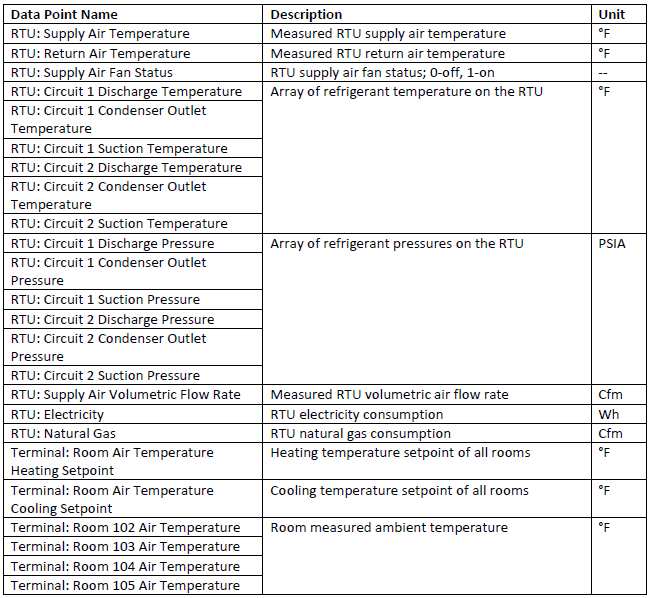
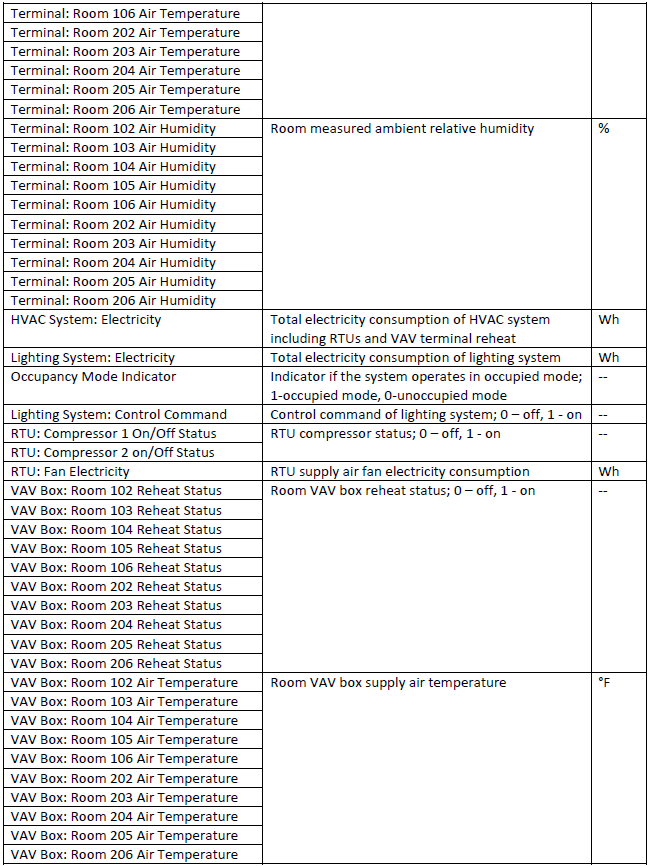
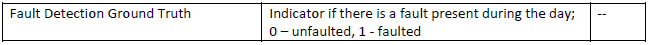

The dataset's faults were intentionally introduced through controlled experiments. Each individual fault was introduced into the unit at midnight and persisted for the whole of a day.

The imposed faults are as follows:

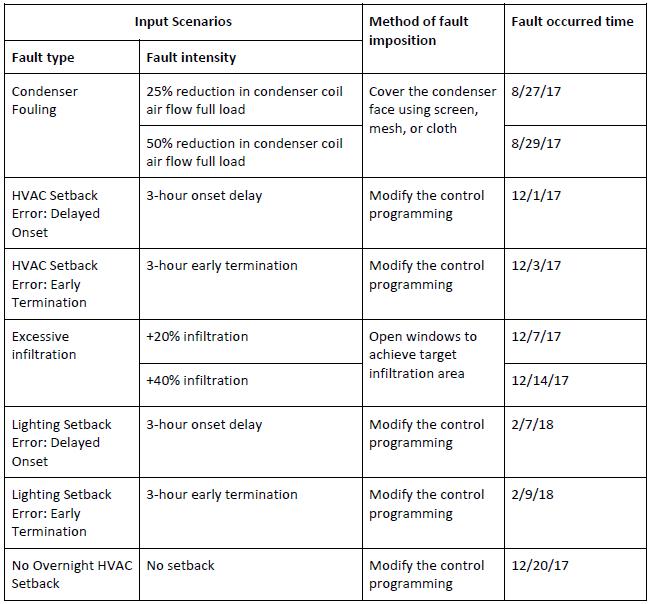
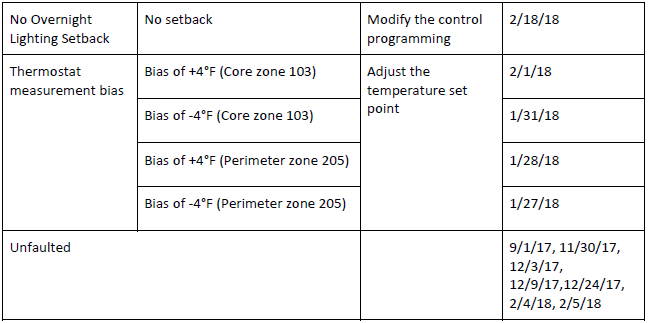

Given the substantial diversity in fault types within this dataset, it's anticipated that different fault detections will have distinct inputs. As a result, feature selection and engineering will be conducted separately for each type of fault.

Detailed information regarding this categorization will be expounded upon in the relevant chapters addressing these specific topics.

Some of the faults refers to similar underlying mechanisms, deviations from intended schedules, but in different systems. These faults will be categorized into two types: faults in HVAC equipment and faults in lighting operation schedules. 

# Import of the relevant libraries and notebook preparation

In [50]:
import sys
import os
import seaborn as sns
import numpy as np

In [2]:
src_path = os.path.join(os.getcwd(), "..", "src")
sys.path.append(src_path)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
import warnings
import datetime as dt
import re
from helper_functions import convert_date, train_evaluate_classification_models, train_evaluate_regression_models

In [4]:
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [5]:
# List of classifiacation algorithms for further use.
classifiers = [['KNeighborsClassifier', KNeighborsClassifier()],
              ['MLPClassifier',MLPClassifier()],
              ['AdaBoostClassifier',AdaBoostClassifier()],
              ['GradientBoostingClassifier',GradientBoostingClassifier()],
              ['CatBoostClassifier', CatBoostClassifier()],
              ['XGBClassifier', XGBClassifier()],
              ['BaggingClassifier', BaggingClassifier()],
              ['RandomForestClassifier', RandomForestClassifier()],
              ['DecisionTreeClassifier', DecisionTreeClassifier()],
              ['LogisticRegression', LogisticRegression()]]

In [6]:
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [7]:
from imblearn.under_sampling import RandomUnderSampler

In [8]:
regressors = [['KNeighborsRegressor', KNeighborsRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()],
              ['CatBoostRegressor', CatBoostRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['BaggingRegressor', BaggingRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['DecisionTreeRegressor', DecisionTreeRegressor()],
              ['LinearRegression', LinearRegression()]]

In [9]:
warnings.filterwarnings("ignore")

In [10]:
csv_file_path = os.path.join("..", "data", "RTU.csv")

In [11]:
data = pd.read_csv(csv_file_path)

# Initial data cleaning and exploration

In [12]:
data.head()

Timestamp  RTU: Supply Air Temperature  RTU: Return Air Temperature  \
0  8/27/2017 0:00                          NaN                          NaN   
1  8/27/2017 0:01                          NaN                          NaN   
2  8/27/2017 0:02                          NaN                          NaN   
3  8/27/2017 0:03                          NaN                          NaN   
4  8/27/2017 0:04                          NaN                          NaN   

   RTU: Supply Air Fan Status  RTU: Circuit 1 Discharge Temperature  \
0                           0                                   NaN   
1                           0                                   NaN   
2                           0                                   NaN   
3                           0                                   NaN   
4                           0                                   NaN   

   RTU: Circuit 1 Condenser Outlet Temperature  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   RTU: Circuit 1 Suction Temperature  RTU: Circuit 2 Discharge Temperature  \
0                                 NaN                                   NaN   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

   RTU: Circuit 2 Condenser Outlet Temperature  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   RTU: Circuit 2 Suction Temperature  ...  VAV Box: Room 103 Air Temperature  \
0                                 NaN  ...                                NaN   
1                                 NaN  ...                                NaN   
2                                 NaN  ...                                NaN   
3                                 NaN  ...                                NaN   
4                                 NaN  ...                                NaN   

   VAV Box: Room 104 Air Temperature  VAV Box: Room 105 Air Temperature  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   VAV Box: Room 106 Air Temperature  VAV Box: Room 202 Air Temperature  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   VAV Box: Room 203 Air Temperature  VAV Box: Room 204 Air Temperature  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   VAV Box: Room 205 Air Temperature  VAV Box: Room 206 Air Temperature  \
0                                NaN                                NaN   
1                                NaN   

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 69 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Timestamp                                        30240 non-null  object 
 1   RTU: Supply Air Temperature                      20156 non-null  float64
 2   RTU: Return Air Temperature                      20156 non-null  float64
 3   RTU: Supply Air Fan Status                       30240 non-null  int64  
 4   RTU: Circuit 1 Discharge Temperature             15028 non-null  float64
 5   RTU: Circuit 1 Condenser Outlet Temperature      15028 non-null  float64
 6   RTU: Circuit 1 Suction Temperature               15028 non-null  float64
 7   RTU: Circuit 2 Discharge Temperature             15028 non-null  float64
 8   RTU: Circuit 2 Condenser Outlet Temperature      15028 non-null  float64
 9   RTU: Circuit 2 Suction Tempe

The timestamp column is currently an object datatype. To ensure consistency and proper handling of temporal data, this column will be transformed into the DateTime data type.

It's observed that several columns contain a significant number of null values. This occurrence can be becuse of sensors being deactivated when certain equipment is not operational. Considering the dataset contains a wide array of faults, each requiring distinct subsets of data, null values will be addressed during the process of preparing features specific to each fault. This approach ensures that data gaps are managed appropriately based on the needs of individual fault detection scenarios.

In [14]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [15]:
# Creating list of dates when faults occured accordin to the description.
condenser_fouling = [convert_date('8/27/17'), 
                     convert_date('8/29/17')]
excessive_infiltration = [convert_date('12/7/17'), 
                          convert_date('12/14/17')]
excessive_infiltration_1 = [convert_date('12/7/17')]
excessive_infiltration_2 = [convert_date('12/14/17')]
HVAC_scheadule_fault = [convert_date('12/1/17'),
                        convert_date('12/3/17'),
                        convert_date('12/20/17')]
lighting_scheadule_fault = [convert_date('2/7/18'),
                            convert_date('2/9/18'),
                            convert_date('2/18/18')]
measurement_bias_zone_103 = [convert_date('2/1/18'), 
                             convert_date('1/31/18')]
measurement_bias_zone_205 = [convert_date('1/28/18'), 
                             convert_date('1/27/18')]

In [16]:
# Creating and filling faults column with values according to the dates given earlier.
data['condenser_fouling'] = 0
data['excessive_infiltration'] = 0
data['excessive_infiltration_1'] = 0
data['excessive_infiltration_2'] = 0
data['HVAC_scheadule_fault'] = 0
data['lighting_scheadule_fault'] = 0
data['measurement_bias_zone_103'] = 0
data['measurement_bias_zone_205'] = 0
for date in condenser_fouling:
    data.loc[data['Timestamp'].dt.date == date.date(), 'condenser_fouling'] = 1
for date in excessive_infiltration:
    data.loc[data['Timestamp'].dt.date == date.date(), 'excessive_infiltration'] = 1
for date in excessive_infiltration_1:
    data.loc[data['Timestamp'].dt.date == date.date(), 'excessive_infiltration_1'] = 1
for date in excessive_infiltration_2:
    data.loc[data['Timestamp'].dt.date == date.date(), 'excessive_infiltration_2'] = 1
for date in HVAC_scheadule_fault:
    data.loc[data['Timestamp'].dt.date == date.date(), 'HVAC_scheadule_fault'] = 1
for date in lighting_scheadule_fault:
    data.loc[data['Timestamp'].dt.date == date.date(), 'lighting_scheadule_fault'] = 1
for date in measurement_bias_zone_103:
    data.loc[data['Timestamp'].dt.date == date.date(), 'measurement_bias_zone_103'] = 1
for date in measurement_bias_zone_205:
    data.loc[data['Timestamp'].dt.date == date.date(), 'measurement_bias_zone_205'] = 1

For models connected to the scheadul faults, time value data will be an input. To deliver model this information, relevant columns will be generated. These columns will have data related to the month, day, day of the week, hour, and minute.

In [17]:
data['hour'] = data['Timestamp'].dt.hour
data['minute'] = data['Timestamp'].dt.minute
data['day'] = data['Timestamp'].dt.day
data['month'] = data['Timestamp'].dt.month

# Condenser fouling

## Data exploration and feature engineering

The subsequent phase requires the selection of columns that could potentially correlate with the behavior of condenser fouling. For this specific fault type, we will focus on retaining columns that are not directly associated with the conditions within the office area like temperature area. This approach ensures that the features chosen for analysis are relevant to the specific fault being, enhancing the model's ability to identify patterns and anomalies related to it.

In [18]:
data_cond = data[['RTU: Supply Air Temperature',
       'RTU: Return Air Temperature', 'RTU: Supply Air Fan Status',
       'RTU: Circuit 1 Discharge Temperature',
       'RTU: Circuit 1 Condenser Outlet Temperature',
       'RTU: Circuit 1 Suction Temperature',
       'RTU: Circuit 2 Discharge Temperature',
       'RTU: Circuit 2 Condenser Outlet Temperature',
       'RTU: Circuit 2 Suction Temperature',
       'RTU: Circuit 1 Discharge Pressure',
       'RTU: Circuit 1 Condenser Outlet Pressure',
       'RTU: Circuit 1 Suction Pressure', 'RTU: Circuit 2 Discharge Pressure',
       'RTU: Circuit 2 Condenser Outlet Pressure',
       'RTU: Circuit 2 Suction Pressure',
       'RTU: Supply Air Volumetric Flow Rate', 'RTU: Electricity',
       'Occupancy Mode Indicator','HVAC System: Electricity','RTU: Compressor 1 On/Off Status',
       'RTU: Compressor 2 On/Off Status', 'RTU: Fan Electricity ','condenser_fouling']]

In [19]:
# Preparing temperature and pressure datasets for Boxplot visualisation
temp_col = [col for col in data_cond.columns if "Temp" in col]
pressure_col = [col for col in data_cond.columns if "Pressure" in col]
temp_data = data_cond[temp_col].melt(var_name='Temperature column', value_name='Temperature in Fahrenheit')
pressure_data = data_cond[pressure_col].melt(var_name='Pressure column', value_name='Pressure in Pascals')

[Text(0, 0, 'RTU: Supply Air Temperature'),
 Text(1, 0, 'RTU: Return Air Temperature'),
 Text(2, 0, 'RTU: Circuit 1 Discharge Temperature'),
 Text(3, 0, 'RTU: Circuit 1 Condenser Outlet Temperature'),
 Text(4, 0, 'RTU: Circuit 1 Suction Temperature'),
 Text(5, 0, 'RTU: Circuit 2 Discharge Temperature'),
 Text(6, 0, 'RTU: Circuit 2 Condenser Outlet Temperature'),
 Text(7, 0, 'RTU: Circuit 2 Suction Temperature')]

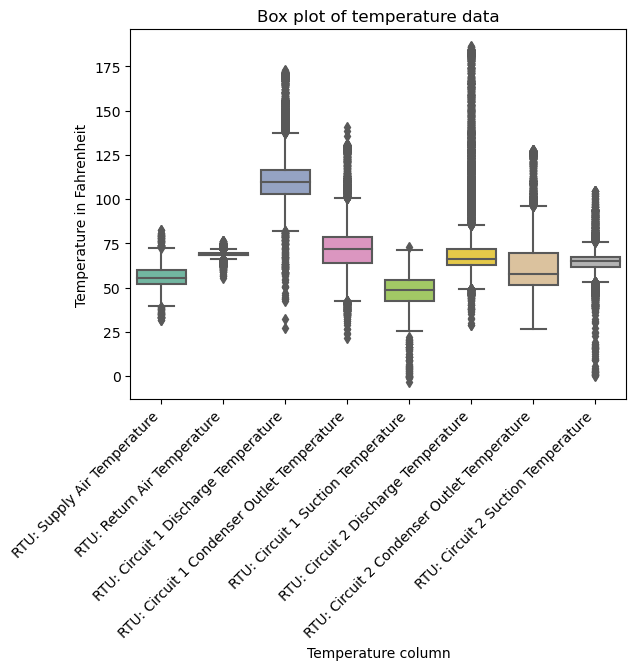

In [20]:
ax = sns.boxplot(x='Temperature column', y='Temperature in Fahrenheit', data=temp_data, palette="Set2")
plt.title("Box plot of temperature data")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In the data above, we see that most temperatures are correctly within small data ranges. However, there is a large amount of outlier data. This may be caused by events such as starting or turning off the device, or simply by a failure. However, the differences between the operating parameters of circuit 1 and 2 are puzzling. If these differences are not based on intentional design differences, it should be checked whether the operating algorithm of each of these circuits is correct.

[Text(0, 0, 'RTU: Circuit 1 Discharge Pressure'),
 Text(1, 0, 'RTU: Circuit 1 Condenser Outlet Pressure'),
 Text(2, 0, 'RTU: Circuit 1 Suction Pressure'),
 Text(3, 0, 'RTU: Circuit 2 Discharge Pressure'),
 Text(4, 0, 'RTU: Circuit 2 Condenser Outlet Pressure'),
 Text(5, 0, 'RTU: Circuit 2 Suction Pressure')]

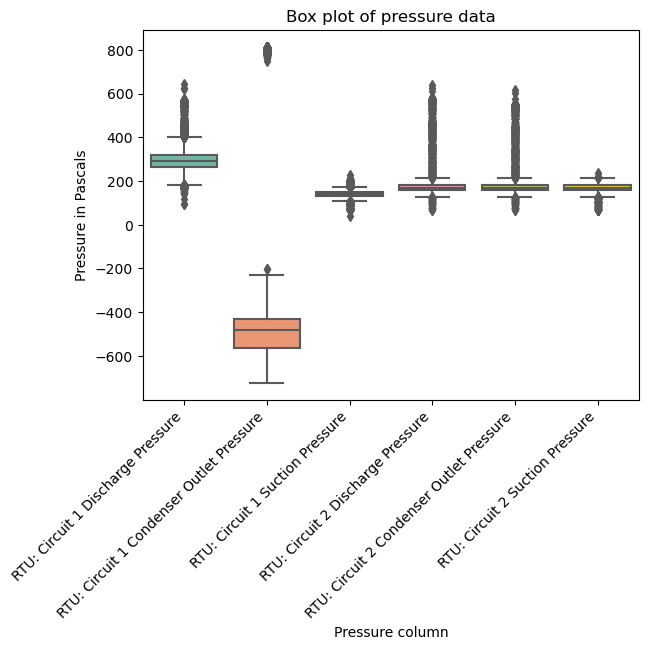

In [21]:
ax = sns.boxplot(x='Pressure column', y='Pressure in Pascals', data=pressure_data, palette="Set2")
plt.title("Box plot of pressure data")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Most of the obove data seems correct besides "RTU: Circuit 1 Condenser Outlet Pressure", which contains radically different values, including negative values. This probably means that this column is bad and should be removed.

In [22]:
data_cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   RTU: Supply Air Temperature                  20156 non-null  float64
 1   RTU: Return Air Temperature                  20156 non-null  float64
 2   RTU: Supply Air Fan Status                   30240 non-null  int64  
 3   RTU: Circuit 1 Discharge Temperature         15028 non-null  float64
 4   RTU: Circuit 1 Condenser Outlet Temperature  15028 non-null  float64
 5   RTU: Circuit 1 Suction Temperature           15028 non-null  float64
 6   RTU: Circuit 2 Discharge Temperature         15028 non-null  float64
 7   RTU: Circuit 2 Condenser Outlet Temperature  15028 non-null  float64
 8   RTU: Circuit 2 Suction Temperature           15028 non-null  float64
 9   RTU: Circuit 1 Discharge Pressure            15028 non-null  float64
 10

Numerous columns within the dataset contain missing values, but "RTU: Circuit 1 Condenser Outlet Pressure" stands out with a higher count of null values, which confirms the idea that the values in this column are incorrect, so it will be removed.

In [23]:
data_cond.drop('RTU: Circuit 1 Condenser Outlet Pressure', axis=1, inplace=True)

In [24]:
data_cond.dropna(inplace=True)

<AxesSubplot:>

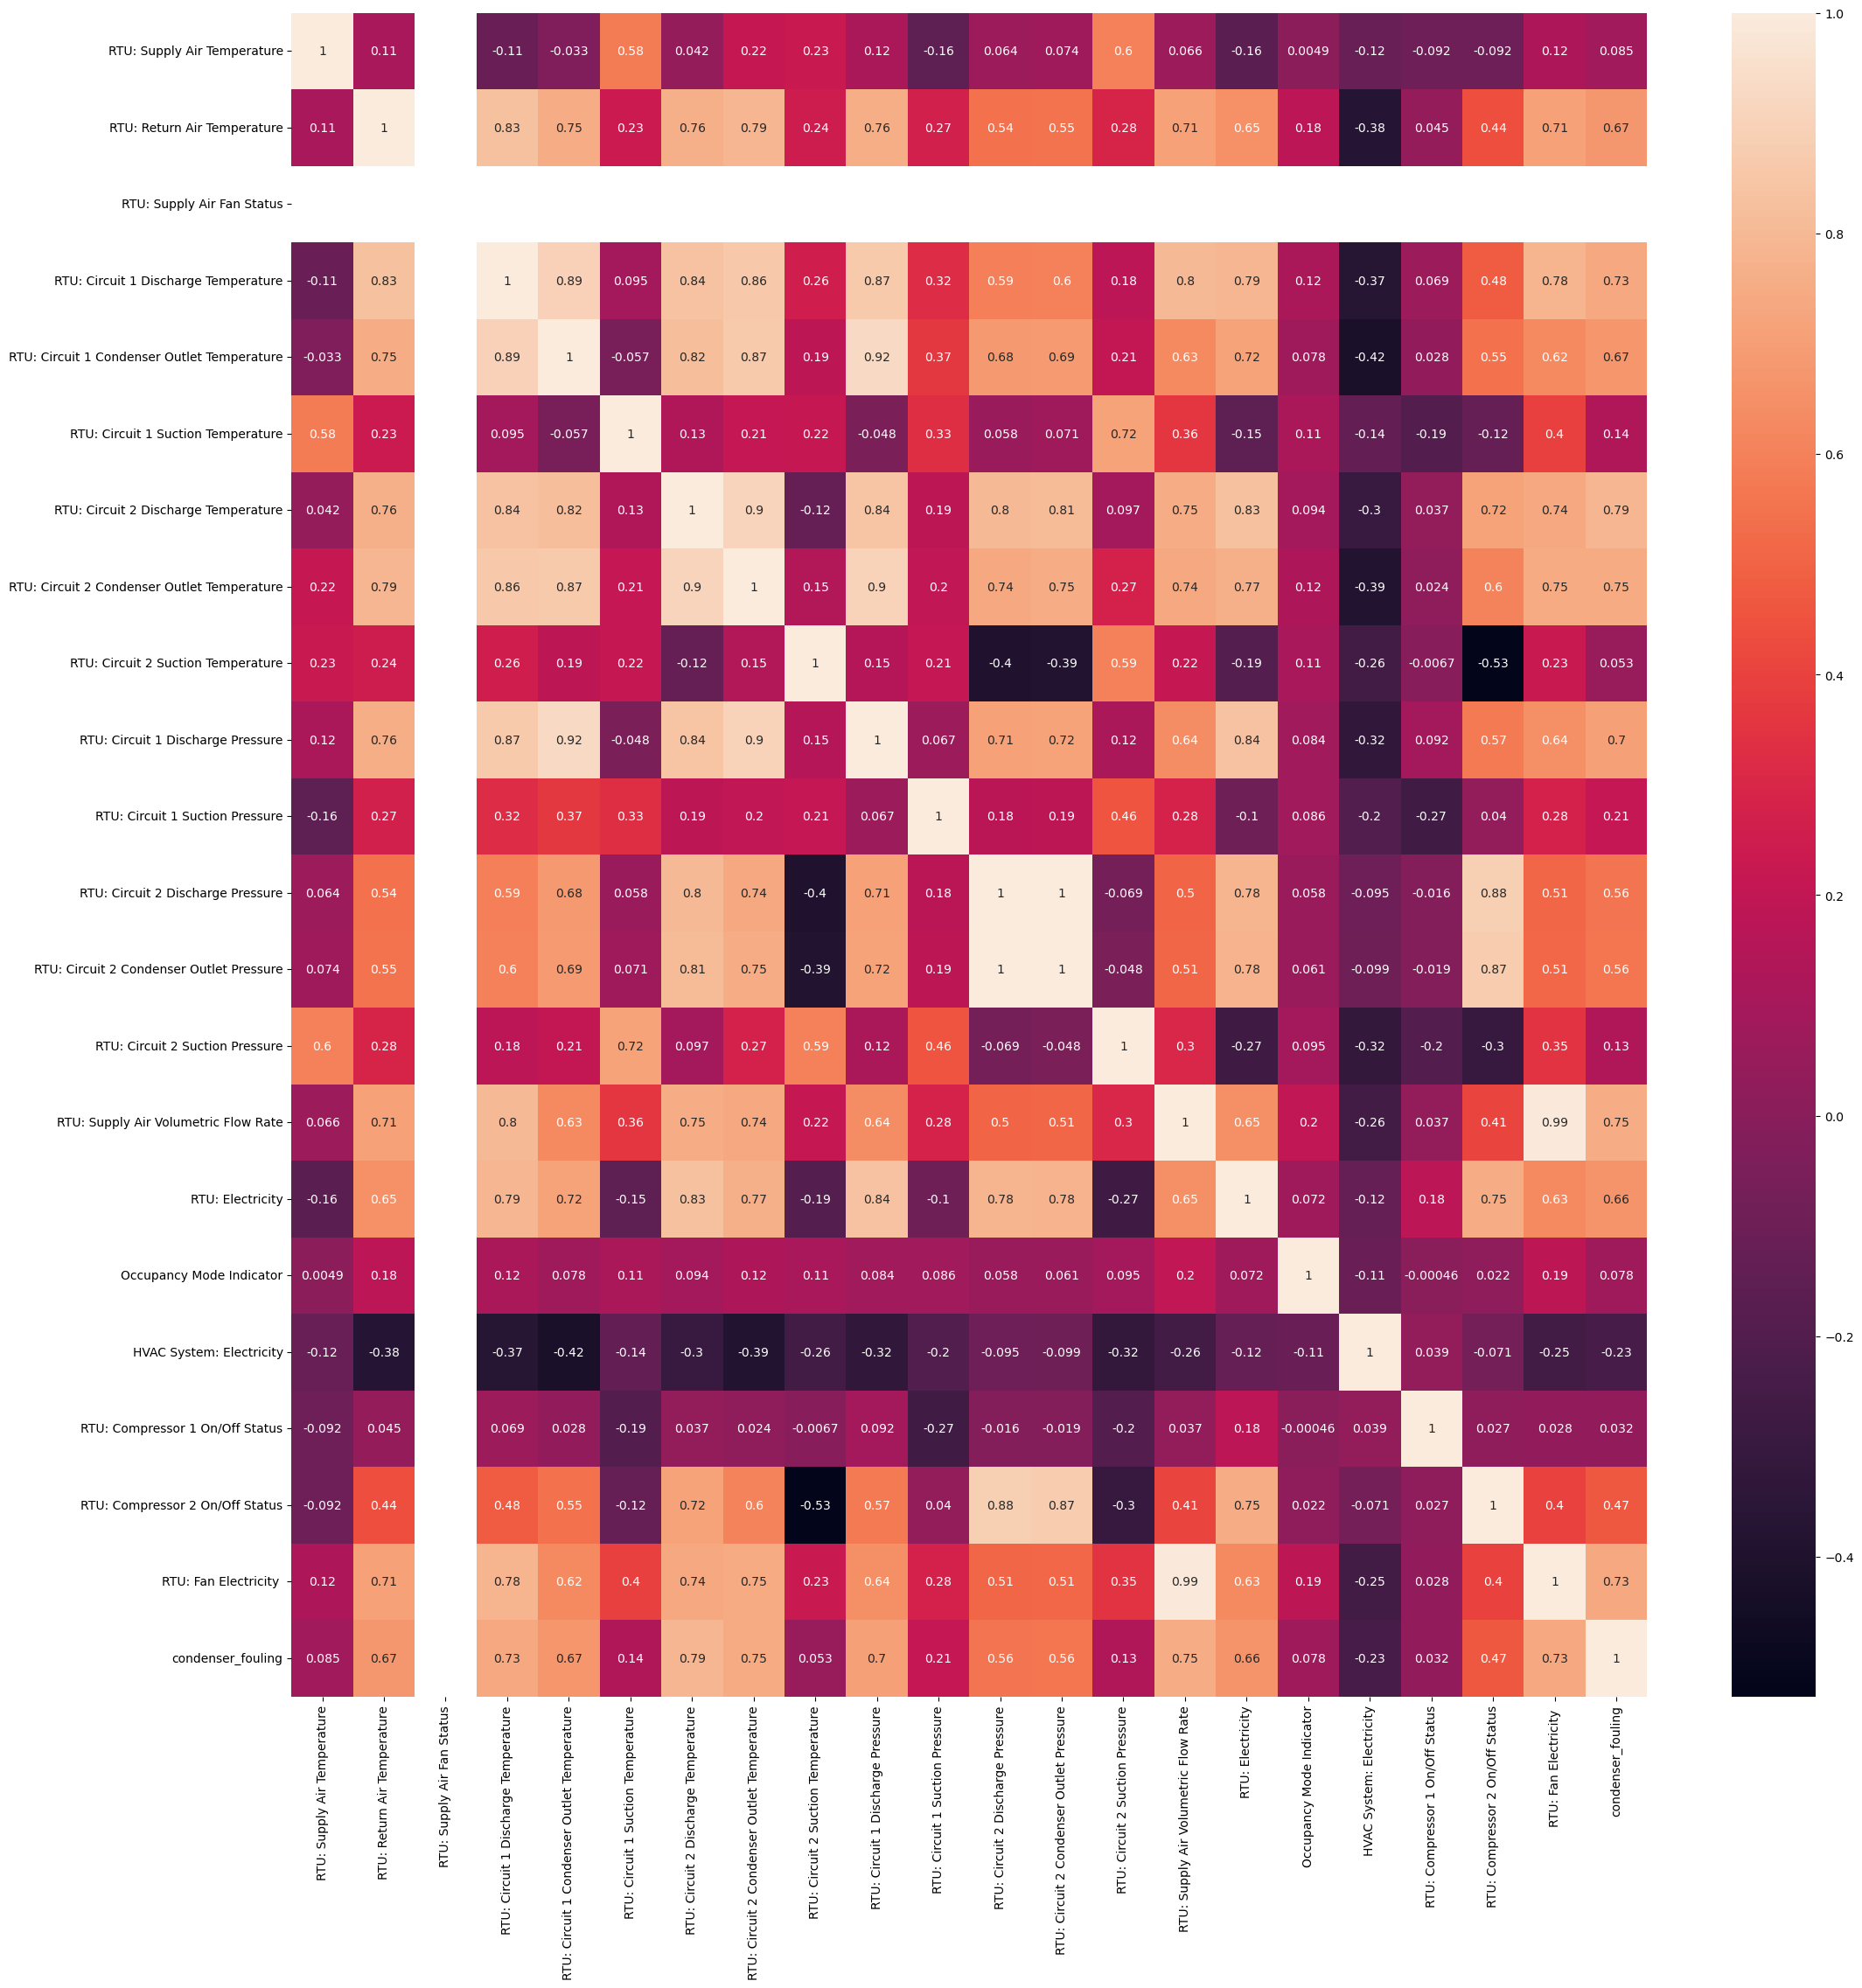

In [25]:
plt.figure(figsize=(25,25))
sns.heatmap(data_cond.corr(), annot=True)

The "RTU: Supply Air Fan Status" column lacks significant correlations with other variables, likely attributed to the removal of rows corresponding to non-operational units. As a result, this column will be eliminated from the dataset.

The data set contains a lot of columns, and many of them are highly correlated with each other, which means that they could be reduced in size by Principal Component Analysis.

In the next steps two kind of models will be prepared: with or without reducing dimensionality in that way. That will allow to see if this step is necessary.

In [26]:
data_cond.drop('RTU: Supply Air Fan Status', axis=1, inplace=True)

## Feature and target data preparation Principal Component Analysis

In [27]:
X_cond = data_cond.drop('condenser_fouling', axis=1)
y_cond = data_cond['condenser_fouling']

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cond)

In [53]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 3.00639145, -4.21861209,  1.4575739 , ...,  0.06919636,
         0.46147937,  0.03631119],
       [ 4.10939504, -3.81651585, -0.17709742, ...,  0.00792372,
         0.36627467, -0.0060936 ],
       [ 4.74296608, -3.41303416, -1.06135639, ..., -0.05868124,
         0.33002919, -0.00959445],
       ...,
       [-0.0628504 ,  0.0559645 , -1.18651894, ..., -0.07969308,
        -0.06364418,  0.00597896],
       [-0.07077272,  0.0949434 , -1.22764697, ..., -0.08796881,
        -0.07302751,  0.0064214 ],
       [-0.01818453, -0.99549139, -0.46110877, ...,  0.05168167,
        -0.05890124,  0.00543869]])

Text(0, 0.5, 'cumulative explained variance')

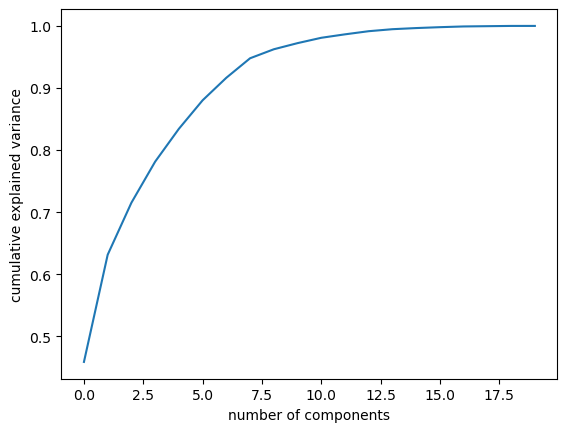

In [54]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'explained variance')

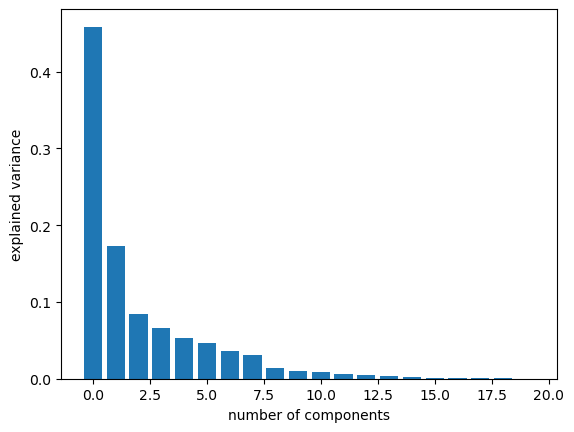

In [55]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')

The results above show that 7 components are enough to explain almost 95% of the total variability. Therefore, this number of parameters will be used to create models.

In [56]:
pca = PCA(n_components=7)
X_scaled = pca.fit_transform(X_scaled)

The result of pca is 10 uncorrelated variables, which means that the algorithm worked correctly and the data set is ready for model training.

In [57]:
X_train_cond_1, X_test_cond_1, y_train_cond_1, y_test_cond_1 = train_test_split(X_scaled, y_cond, test_size=0.1, shuffle=True, random_state=42)
X_train_cond_2, X_test_cond_2, y_train_cond_2, y_test_cond_2 = train_test_split(X_cond, y_cond, test_size=0.1, shuffle=True, random_state=42)

## Classification model training

In [58]:
models_cond_1, Acc_cond_1 = train_evaluate_classification_models(X_train_cond_1, X_test_cond_1, y_train_cond_1, y_test_cond_1, classifiers)
models_cond_2, Acc_cond_2 = train_evaluate_classification_models(X_train_cond_2, X_test_cond_2, y_train_cond_2, y_test_cond_2, classifiers)

Learning rate set to 0.031286
0:	learn: 0.6151291	total: 16.8ms	remaining: 16.8s
1:	learn: 0.5341654	total: 62.2ms	remaining: 31s
2:	learn: 0.4672249	total: 84.4ms	remaining: 28s
3:	learn: 0.4152133	total: 152ms	remaining: 37.8s
4:	learn: 0.3700996	total: 193ms	remaining: 38.3s
5:	learn: 0.3324651	total: 255ms	remaining: 42.2s
6:	learn: 0.2996940	total: 272ms	remaining: 38.6s
7:	learn: 0.2638697	total: 318ms	remaining: 39.4s
8:	learn: 0.2391143	total: 336ms	remaining: 37s
9:	learn: 0.2141020	total: 392ms	remaining: 38.8s
10:	learn: 0.1949806	total: 415ms	remaining: 37.3s
11:	learn: 0.1786161	total: 442ms	remaining: 36.4s
12:	learn: 0.1648856	total: 460ms	remaining: 34.9s
13:	learn: 0.1475347	total: 502ms	remaining: 35.4s
14:	learn: 0.1383704	total: 542ms	remaining: 35.6s
15:	learn: 0.1245144	total: 617ms	remaining: 37.9s
16:	learn: 0.1128419	total: 637ms	remaining: 36.8s
17:	learn: 0.1067686	total: 680ms	remaining: 37.1s
18:	learn: 0.1000050	total: 710ms	remaining: 36.6s
19:	learn: 0.0

161:	learn: 0.0193113	total: 8.82s	remaining: 45.6s
162:	learn: 0.0191852	total: 8.89s	remaining: 45.7s
163:	learn: 0.0190849	total: 8.91s	remaining: 45.4s
164:	learn: 0.0190578	total: 8.97s	remaining: 45.4s
165:	learn: 0.0190141	total: 8.99s	remaining: 45.2s
166:	learn: 0.0189377	total: 9.03s	remaining: 45s
167:	learn: 0.0188896	total: 9.04s	remaining: 44.8s
168:	learn: 0.0188251	total: 9.08s	remaining: 44.7s
169:	learn: 0.0187177	total: 9.16s	remaining: 44.7s
170:	learn: 0.0186512	total: 9.23s	remaining: 44.8s
171:	learn: 0.0186270	total: 9.34s	remaining: 45s
172:	learn: 0.0184500	total: 9.42s	remaining: 45s
173:	learn: 0.0183452	total: 9.5s	remaining: 45.1s
174:	learn: 0.0182831	total: 9.67s	remaining: 45.6s
175:	learn: 0.0182061	total: 9.69s	remaining: 45.3s
176:	learn: 0.0181118	total: 9.77s	remaining: 45.4s
177:	learn: 0.0180354	total: 9.79s	remaining: 45.2s
178:	learn: 0.0179581	total: 9.87s	remaining: 45.3s
179:	learn: 0.0178636	total: 9.96s	remaining: 45.4s
180:	learn: 0.01779

320:	learn: 0.0106939	total: 17.9s	remaining: 37.9s
321:	learn: 0.0106827	total: 17.9s	remaining: 37.8s
322:	learn: 0.0106425	total: 18s	remaining: 37.7s
323:	learn: 0.0106041	total: 18s	remaining: 37.6s
324:	learn: 0.0105603	total: 18.1s	remaining: 37.5s
325:	learn: 0.0105099	total: 18.1s	remaining: 37.4s
326:	learn: 0.0104595	total: 18.2s	remaining: 37.4s
327:	learn: 0.0104290	total: 18.2s	remaining: 37.2s
328:	learn: 0.0103967	total: 18.2s	remaining: 37.1s
329:	learn: 0.0103659	total: 18.3s	remaining: 37.1s
330:	learn: 0.0103216	total: 18.3s	remaining: 37s
331:	learn: 0.0103050	total: 18.3s	remaining: 36.9s
332:	learn: 0.0102625	total: 18.4s	remaining: 36.8s
333:	learn: 0.0102210	total: 18.5s	remaining: 36.9s
334:	learn: 0.0101803	total: 18.5s	remaining: 36.7s
335:	learn: 0.0101508	total: 18.6s	remaining: 36.7s
336:	learn: 0.0101072	total: 18.6s	remaining: 36.6s
337:	learn: 0.0100804	total: 18.7s	remaining: 36.6s
338:	learn: 0.0100689	total: 18.7s	remaining: 36.4s
339:	learn: 0.0100

483:	learn: 0.0069495	total: 26.6s	remaining: 28.4s
484:	learn: 0.0069320	total: 26.6s	remaining: 28.3s
485:	learn: 0.0069064	total: 26.7s	remaining: 28.2s
486:	learn: 0.0068789	total: 26.7s	remaining: 28.2s
487:	learn: 0.0068563	total: 26.8s	remaining: 28.1s
488:	learn: 0.0068533	total: 26.8s	remaining: 28.1s
489:	learn: 0.0068372	total: 27s	remaining: 28.1s
490:	learn: 0.0068344	total: 27s	remaining: 28s
491:	learn: 0.0068286	total: 27s	remaining: 27.9s
492:	learn: 0.0068014	total: 27.1s	remaining: 27.8s
493:	learn: 0.0067958	total: 27.1s	remaining: 27.8s
494:	learn: 0.0067793	total: 27.1s	remaining: 27.7s
495:	learn: 0.0067535	total: 27.2s	remaining: 27.6s
496:	learn: 0.0067481	total: 27.2s	remaining: 27.5s
497:	learn: 0.0067325	total: 27.3s	remaining: 27.5s
498:	learn: 0.0067247	total: 27.3s	remaining: 27.4s
499:	learn: 0.0067174	total: 27.3s	remaining: 27.3s
500:	learn: 0.0067159	total: 27.3s	remaining: 27.2s
501:	learn: 0.0067082	total: 27.4s	remaining: 27.2s
502:	learn: 0.006678

642:	learn: 0.0048918	total: 34.2s	remaining: 19s
643:	learn: 0.0048864	total: 34.3s	remaining: 18.9s
644:	learn: 0.0048797	total: 34.3s	remaining: 18.9s
645:	learn: 0.0048723	total: 34.4s	remaining: 18.8s
646:	learn: 0.0048609	total: 34.4s	remaining: 18.8s
647:	learn: 0.0048501	total: 34.5s	remaining: 18.7s
648:	learn: 0.0048383	total: 34.6s	remaining: 18.7s
649:	learn: 0.0048307	total: 34.6s	remaining: 18.6s
650:	learn: 0.0048256	total: 34.6s	remaining: 18.6s
651:	learn: 0.0048218	total: 34.7s	remaining: 18.5s
652:	learn: 0.0048060	total: 34.7s	remaining: 18.5s
653:	learn: 0.0047902	total: 34.8s	remaining: 18.4s
654:	learn: 0.0047868	total: 34.8s	remaining: 18.3s
655:	learn: 0.0047706	total: 34.9s	remaining: 18.3s
656:	learn: 0.0047604	total: 34.9s	remaining: 18.2s
657:	learn: 0.0047536	total: 35s	remaining: 18.2s
658:	learn: 0.0047382	total: 35.1s	remaining: 18.2s
659:	learn: 0.0047336	total: 35.1s	remaining: 18.1s
660:	learn: 0.0047194	total: 35.2s	remaining: 18.1s
661:	learn: 0.00

802:	learn: 0.0036607	total: 41.7s	remaining: 10.2s
803:	learn: 0.0036593	total: 41.7s	remaining: 10.2s
804:	learn: 0.0036489	total: 41.8s	remaining: 10.1s
805:	learn: 0.0036387	total: 41.8s	remaining: 10.1s
806:	learn: 0.0036262	total: 41.9s	remaining: 10s
807:	learn: 0.0036174	total: 41.9s	remaining: 9.96s
808:	learn: 0.0036129	total: 42s	remaining: 9.91s
809:	learn: 0.0036048	total: 42s	remaining: 9.86s
810:	learn: 0.0036022	total: 42.1s	remaining: 9.81s
811:	learn: 0.0036009	total: 42.1s	remaining: 9.75s
812:	learn: 0.0035884	total: 42.2s	remaining: 9.7s
813:	learn: 0.0035806	total: 42.2s	remaining: 9.64s
814:	learn: 0.0035732	total: 42.2s	remaining: 9.59s
815:	learn: 0.0035700	total: 42.3s	remaining: 9.53s
816:	learn: 0.0035631	total: 42.3s	remaining: 9.47s
817:	learn: 0.0035507	total: 42.3s	remaining: 9.41s
818:	learn: 0.0035417	total: 42.4s	remaining: 9.36s
819:	learn: 0.0035400	total: 42.4s	remaining: 9.3s
820:	learn: 0.0035384	total: 42.4s	remaining: 9.25s
821:	learn: 0.003536

964:	learn: 0.0030761	total: 46.7s	remaining: 1.69s
965:	learn: 0.0030761	total: 46.8s	remaining: 1.65s
966:	learn: 0.0030761	total: 46.8s	remaining: 1.6s
967:	learn: 0.0030761	total: 46.8s	remaining: 1.55s
968:	learn: 0.0030761	total: 46.9s	remaining: 1.5s
969:	learn: 0.0030761	total: 46.9s	remaining: 1.45s
970:	learn: 0.0030761	total: 46.9s	remaining: 1.4s
971:	learn: 0.0030761	total: 47s	remaining: 1.35s
972:	learn: 0.0030761	total: 47s	remaining: 1.3s
973:	learn: 0.0030761	total: 47s	remaining: 1.25s
974:	learn: 0.0030761	total: 47s	remaining: 1.21s
975:	learn: 0.0030761	total: 47.1s	remaining: 1.16s
976:	learn: 0.0030761	total: 47.1s	remaining: 1.11s
977:	learn: 0.0030761	total: 47.1s	remaining: 1.06s
978:	learn: 0.0030716	total: 47.2s	remaining: 1.01s
979:	learn: 0.0030716	total: 47.2s	remaining: 963ms
980:	learn: 0.0030716	total: 47.2s	remaining: 914ms
981:	learn: 0.0030716	total: 47.2s	remaining: 866ms
982:	learn: 0.0030716	total: 47.3s	remaining: 818ms
983:	learn: 0.0030716	to

126:	learn: 0.0033980	total: 8.14s	remaining: 55.9s
127:	learn: 0.0033577	total: 8.2s	remaining: 55.9s
128:	learn: 0.0032748	total: 8.3s	remaining: 56s
129:	learn: 0.0031952	total: 8.4s	remaining: 56.2s
130:	learn: 0.0031880	total: 8.47s	remaining: 56.2s
131:	learn: 0.0031832	total: 8.62s	remaining: 56.7s
132:	learn: 0.0031785	total: 8.63s	remaining: 56.3s
133:	learn: 0.0031332	total: 8.7s	remaining: 56.2s
134:	learn: 0.0030919	total: 8.78s	remaining: 56.2s
135:	learn: 0.0030578	total: 8.84s	remaining: 56.1s
136:	learn: 0.0030350	total: 8.88s	remaining: 55.9s
137:	learn: 0.0029817	total: 8.94s	remaining: 55.8s
138:	learn: 0.0029296	total: 8.99s	remaining: 55.7s
139:	learn: 0.0029235	total: 9.06s	remaining: 55.6s
140:	learn: 0.0029191	total: 9.1s	remaining: 55.4s
141:	learn: 0.0028912	total: 9.16s	remaining: 55.4s
142:	learn: 0.0028142	total: 9.21s	remaining: 55.2s
143:	learn: 0.0027781	total: 9.27s	remaining: 55.1s
144:	learn: 0.0027549	total: 9.32s	remaining: 55s
145:	learn: 0.0027481

286:	learn: 0.0009351	total: 17.4s	remaining: 43.3s
287:	learn: 0.0009279	total: 17.5s	remaining: 43.3s
288:	learn: 0.0009213	total: 17.6s	remaining: 43.2s
289:	learn: 0.0009157	total: 17.6s	remaining: 43.2s
290:	learn: 0.0009126	total: 17.7s	remaining: 43.1s
291:	learn: 0.0009109	total: 17.8s	remaining: 43.2s
292:	learn: 0.0009036	total: 17.9s	remaining: 43.2s
293:	learn: 0.0009036	total: 18s	remaining: 43.1s
294:	learn: 0.0008984	total: 18.1s	remaining: 43.3s
295:	learn: 0.0008964	total: 18.1s	remaining: 43.1s
296:	learn: 0.0008886	total: 18.2s	remaining: 43.1s
297:	learn: 0.0008782	total: 18.3s	remaining: 43s
298:	learn: 0.0008703	total: 18.3s	remaining: 43s
299:	learn: 0.0008700	total: 18.4s	remaining: 43s
300:	learn: 0.0008652	total: 18.5s	remaining: 43s
301:	learn: 0.0008625	total: 18.6s	remaining: 43s
302:	learn: 0.0008603	total: 18.7s	remaining: 43s
303:	learn: 0.0008599	total: 18.7s	remaining: 42.9s
304:	learn: 0.0008599	total: 18.8s	remaining: 42.9s
305:	learn: 0.0008595	tota

448:	learn: 0.0005357	total: 28.7s	remaining: 35.2s
449:	learn: 0.0005357	total: 28.9s	remaining: 35.3s
450:	learn: 0.0005357	total: 29s	remaining: 35.2s
451:	learn: 0.0005357	total: 29s	remaining: 35.2s
452:	learn: 0.0005357	total: 29.1s	remaining: 35.1s
453:	learn: 0.0005357	total: 29.2s	remaining: 35.1s
454:	learn: 0.0005357	total: 29.3s	remaining: 35.1s
455:	learn: 0.0005357	total: 29.4s	remaining: 35.1s
456:	learn: 0.0005346	total: 29.5s	remaining: 35.1s
457:	learn: 0.0005317	total: 29.5s	remaining: 34.9s
458:	learn: 0.0005317	total: 29.6s	remaining: 34.9s
459:	learn: 0.0005275	total: 29.7s	remaining: 34.9s
460:	learn: 0.0005275	total: 29.8s	remaining: 34.8s
461:	learn: 0.0005256	total: 29.8s	remaining: 34.7s
462:	learn: 0.0005224	total: 29.9s	remaining: 34.6s
463:	learn: 0.0005224	total: 29.9s	remaining: 34.5s
464:	learn: 0.0005224	total: 30s	remaining: 34.6s
465:	learn: 0.0005224	total: 30.2s	remaining: 34.6s
466:	learn: 0.0005222	total: 30.3s	remaining: 34.6s
467:	learn: 0.0005

607:	learn: 0.0004632	total: 39.2s	remaining: 25.3s
608:	learn: 0.0004632	total: 39.3s	remaining: 25.2s
609:	learn: 0.0004632	total: 39.3s	remaining: 25.1s
610:	learn: 0.0004632	total: 39.3s	remaining: 25.1s
611:	learn: 0.0004632	total: 39.4s	remaining: 25s
612:	learn: 0.0004632	total: 39.5s	remaining: 24.9s
613:	learn: 0.0004632	total: 39.5s	remaining: 24.9s
614:	learn: 0.0004632	total: 39.6s	remaining: 24.8s
615:	learn: 0.0004632	total: 39.6s	remaining: 24.7s
616:	learn: 0.0004632	total: 39.7s	remaining: 24.6s
617:	learn: 0.0004632	total: 39.7s	remaining: 24.6s
618:	learn: 0.0004632	total: 39.8s	remaining: 24.5s
619:	learn: 0.0004632	total: 39.8s	remaining: 24.4s
620:	learn: 0.0004632	total: 39.9s	remaining: 24.3s
621:	learn: 0.0004632	total: 40s	remaining: 24.3s
622:	learn: 0.0004631	total: 40s	remaining: 24.2s
623:	learn: 0.0004630	total: 40.1s	remaining: 24.2s
624:	learn: 0.0004630	total: 40.2s	remaining: 24.1s
625:	learn: 0.0004630	total: 40.2s	remaining: 24s
626:	learn: 0.000463

768:	learn: 0.0004524	total: 49.5s	remaining: 14.9s
769:	learn: 0.0004524	total: 49.5s	remaining: 14.8s
770:	learn: 0.0004524	total: 49.7s	remaining: 14.8s
771:	learn: 0.0004524	total: 49.8s	remaining: 14.7s
772:	learn: 0.0004524	total: 49.9s	remaining: 14.6s
773:	learn: 0.0004524	total: 50s	remaining: 14.6s
774:	learn: 0.0004524	total: 50s	remaining: 14.5s
775:	learn: 0.0004524	total: 50.1s	remaining: 14.5s
776:	learn: 0.0004524	total: 50.2s	remaining: 14.4s
777:	learn: 0.0004524	total: 50.2s	remaining: 14.3s
778:	learn: 0.0004524	total: 50.4s	remaining: 14.3s
779:	learn: 0.0004524	total: 50.4s	remaining: 14.2s
780:	learn: 0.0004524	total: 50.5s	remaining: 14.2s
781:	learn: 0.0004524	total: 50.5s	remaining: 14.1s
782:	learn: 0.0004524	total: 50.6s	remaining: 14s
783:	learn: 0.0004524	total: 50.7s	remaining: 14s
784:	learn: 0.0004524	total: 50.8s	remaining: 13.9s
785:	learn: 0.0004524	total: 50.9s	remaining: 13.9s
786:	learn: 0.0004524	total: 51s	remaining: 13.8s
787:	learn: 0.0004524	

927:	learn: 0.0004524	total: 1m	remaining: 4.66s
928:	learn: 0.0004524	total: 1m	remaining: 4.6s
929:	learn: 0.0004524	total: 1m	remaining: 4.53s
930:	learn: 0.0004524	total: 1m	remaining: 4.47s
931:	learn: 0.0004524	total: 1m	remaining: 4.41s
932:	learn: 0.0004524	total: 1m	remaining: 4.34s
933:	learn: 0.0004524	total: 1m	remaining: 4.28s
934:	learn: 0.0004524	total: 1m	remaining: 4.21s
935:	learn: 0.0004524	total: 1m	remaining: 4.15s
936:	learn: 0.0004524	total: 1m	remaining: 4.08s
937:	learn: 0.0004524	total: 1m	remaining: 4.02s
938:	learn: 0.0004524	total: 1m	remaining: 3.95s
939:	learn: 0.0004524	total: 1m	remaining: 3.89s
940:	learn: 0.0004524	total: 1m	remaining: 3.82s
941:	learn: 0.0004524	total: 1m	remaining: 3.75s
942:	learn: 0.0004524	total: 1m 1s	remaining: 3.69s
943:	learn: 0.0004524	total: 1m 1s	remaining: 3.62s
944:	learn: 0.0004524	total: 1m 1s	remaining: 3.56s
945:	learn: 0.0004524	total: 1m 1s	remaining: 3.49s
946:	learn: 0.0004524	total: 1m 1s	remaining: 3.43s
947:	l

## Models evaluation

In [59]:
print(Acc_cond_1)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.994141       0.989993         0.988334   
1               MLPClassifier        0.992435       0.987992         0.979328   
2          AdaBoostClassifier        0.987317       0.981988         0.953817   
3  GradientBoostingClassifier        0.993622       0.983989         0.984496   
4          CatBoostClassifier        1.000000       0.993329         1.000000   
5               XGBClassifier        1.000000       0.991995         1.000000   
6           BaggingClassifier        0.999481       0.989326         1.000000   
7      RandomForestClassifier        1.000000       0.991328         1.000000   
8      DecisionTreeClassifier        1.000000       0.991328         1.000000   
9          LogisticRegression        0.974561       0.974650         0.909690   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.969880      0.961538     0.941

In [60]:
print(Acc_cond_2)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.998813       1.000000         1.000000   
1               MLPClassifier        0.976563       0.975317         0.931973   
2          AdaBoostClassifier        1.000000       1.000000         1.000000   
3  GradientBoostingClassifier        1.000000       0.999333         1.000000   
4          CatBoostClassifier        1.000000       1.000000         1.000000   
5               XGBClassifier        1.000000       1.000000         1.000000   
6           BaggingClassifier        0.999926       0.997332         1.000000   
7      RandomForestClassifier        1.000000       0.999333         1.000000   
8      DecisionTreeClassifier        1.000000       0.995330         1.000000   
9          LogisticRegression        0.979901       0.976651         0.914304   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        1.000000      0.989912     1.000

Results above shows that reducing dimensionality in that case reduced performance of the models. Although the number of parameters without reducing dimensionality seems hogh, taking them all into account seems necessary due to the exepional performance of the trained models.

The exceptional evaluation parameters underscore the validity of the assumptions and data employed for training in addressing this task. The favorable outcomes support the utilization of the majority of the models that were employed, indicating their efficacy in fault prediction.

## Conclusions

In this case, the task was relatively simple, and included basic data preprocessing, identifying suitable input data and integrating them into the relevant predictive models. Evidently, the relationships between the model inputs and outputs were self-evident, so there were the need for supplementary model adjustments or data rebalancing. This outcome further underscores the efficacy of machine learning tools for such tasks.

This is another proof of the effectiveness of machine learning tools for this type of task. However, it's important to underscore that the attainment of such results hinges on the availability of high-quality data. Consequently, it becomes imperative to execute appropriate experiments or collection procedures to ensure the integrity and reliability of the input data, a prerequisite for the successful application of machine learning methods.

# Excessive infiltration

The faults recorded within this dataset were deliberately induced by opening windows in rooms. While this specific detail might not have been explicitly outlined in the dataset's description, it is reasonable to assume that the windows in all rooms were uniformly opened to the same degree simultaneously.

## Data exploration and feature engineering

In contrast to the previous fault type, the approach for this case involves using all columns containing data from office spaces for training the model. Consequently, none of the columns describing the operation of the RTU will be included in this model. The lgoic behind this is that infiltration is something that happen on an office space and doesn't influence anything on RTU sensor level.

In [34]:
room_columns = [col for col in data.columns if "Room" in col]

In [35]:
data_ei = data[room_columns]

In [36]:
data_ei['excessive_infiltration'] = data['excessive_infiltration']

In [37]:
data_ei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Terminal: Room 102 Air Humidity                  30240 non-null  float64
 1   Terminal: Room 103 Air Humidity                  30240 non-null  float64
 2   Terminal: Room 104 Air Humidity                  30240 non-null  float64
 3   Terminal: Room 105 Air Humidity                  30240 non-null  float64
 4   Terminal: Room 106 Air Humidity                  30240 non-null  float64
 5   Terminal: Room 202 Air Humidity                  30240 non-null  float64
 6   Terminal: Room 203 Air Humidity                  30240 non-null  float64
 7   Terminal: Room 204 Air Humidity                  30240 non-null  float64
 8   Terminal: Room 205 Air Humidity                  30240 non-null  float64
 9   Terminal: Room 206 Air Humid

In [38]:
data[data['VAV Box: Room 205 Air Temperature'].isnull()]

Timestamp  RTU: Supply Air Temperature  \
0     2017-08-27 00:00:00                          NaN   
1     2017-08-27 00:01:00                          NaN   
2     2017-08-27 00:02:00                          NaN   
3     2017-08-27 00:03:00                          NaN   
4     2017-08-27 00:04:00                          NaN   
...                   ...                          ...   
30235 2018-02-18 23:55:00                          NaN   
30236 2018-02-18 23:56:00                          NaN   
30237 2018-02-18 23:57:00                          NaN   
30238 2018-02-18 23:58:00                          NaN   
30239 2018-02-18 23:59:00                          NaN   

       RTU: Return Air Temperature  RTU: Supply Air Fan Status  \
0                              NaN                           0   
1                              NaN                           0   
2                              NaN                           0   
3                              NaN                           0   
4                              NaN                           0   
...                            ...                         ...   
30235                          NaN                           0   
30236                          NaN                           0   
30237                          NaN                           0   
30238                          NaN                           0   
30239                          NaN                           0   

       RTU: Circuit 1 Discharge Temperature  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
30235                                   NaN   
30236                                   NaN   
30237                                   NaN   
30238                                   NaN   
30239                                   NaN   

       RTU: Circuit 1 Condenser Outlet Temperature  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
30235                                          NaN   
30236                                          NaN   
30237                                          NaN   
30238                                          NaN   
30239                                          NaN   

       RTU: Circuit 1 Suction Temperature  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   
30235                                 NaN   
30236                                 NaN   
30237                                 NaN   
30238                                 NaN   
30239                                 NaN   

       RTU: Circuit 2 Discharge Temperature  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
30235                                   NaN   
30236                                   NaN   
30237                                   NaN   
30238                                   NaN   
30239                                   NaN   

       RTU: Circuit 2 Condenser Outlet Temperature  \
0                                              NaN   
1                                              NaN   
2                                           

Approximately one-third of the data for VAV Box Room Air Temperature readings is absent, and interestingly, these instances of missing data are synchronized with times when the RTU is inactive. In the forthcoming phase, two distinct types of models will be trained: one without rows containing null values and another without columns featuring null values.

Furthermore, excessive infiltration also coincides with periods when the RTU is not in operation. This insight implies that detecting this particular fault type during nighttime hours could prove beneficial in accurately identifying instances of excessive infiltration, aligning with the RTU's inactive periods.

In [39]:
data_ei_1 = data_ei.copy()

In [40]:
not_vav_col = [col for col in data_ei.columns if "VAV" not in col]

In [41]:
data_ei.dropna(inplace=True)

In [42]:
data_ei_1 = data_ei_1[not_vav_col]

<AxesSubplot:>

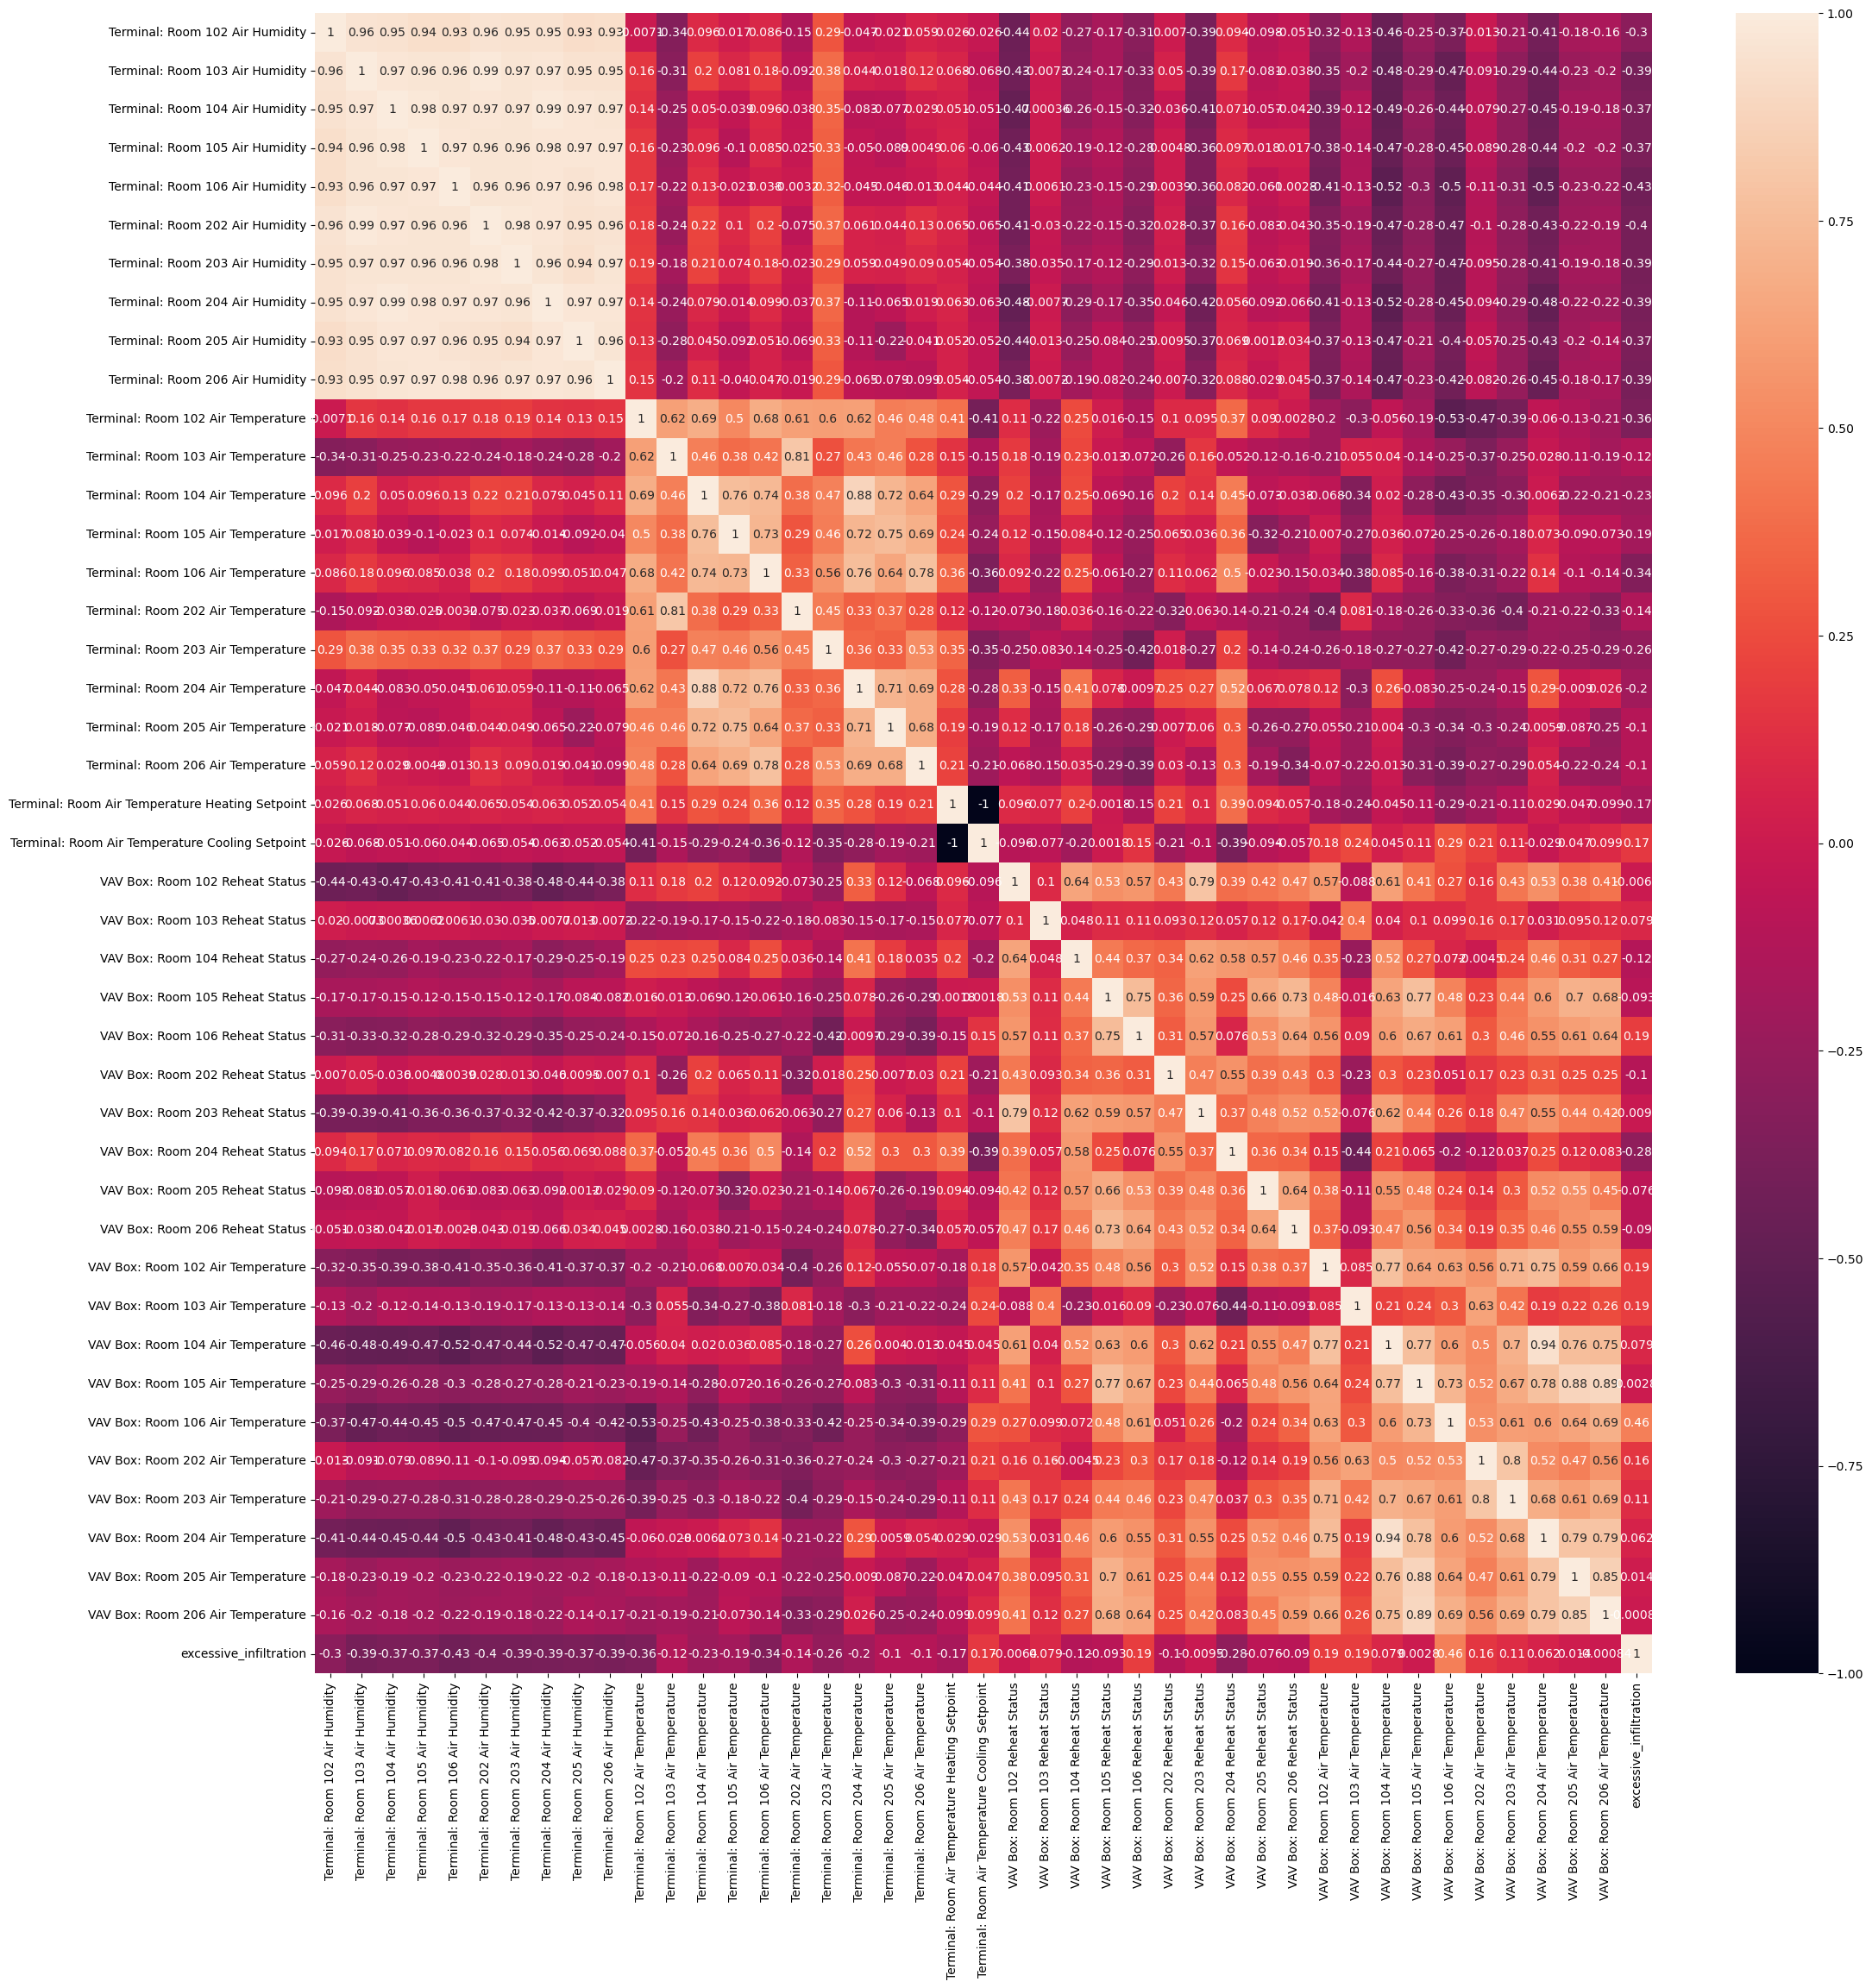

In [43]:
plt.figure(figsize=(25,25))
sns.heatmap(data_ei.corr(), annot=True)

<AxesSubplot:>

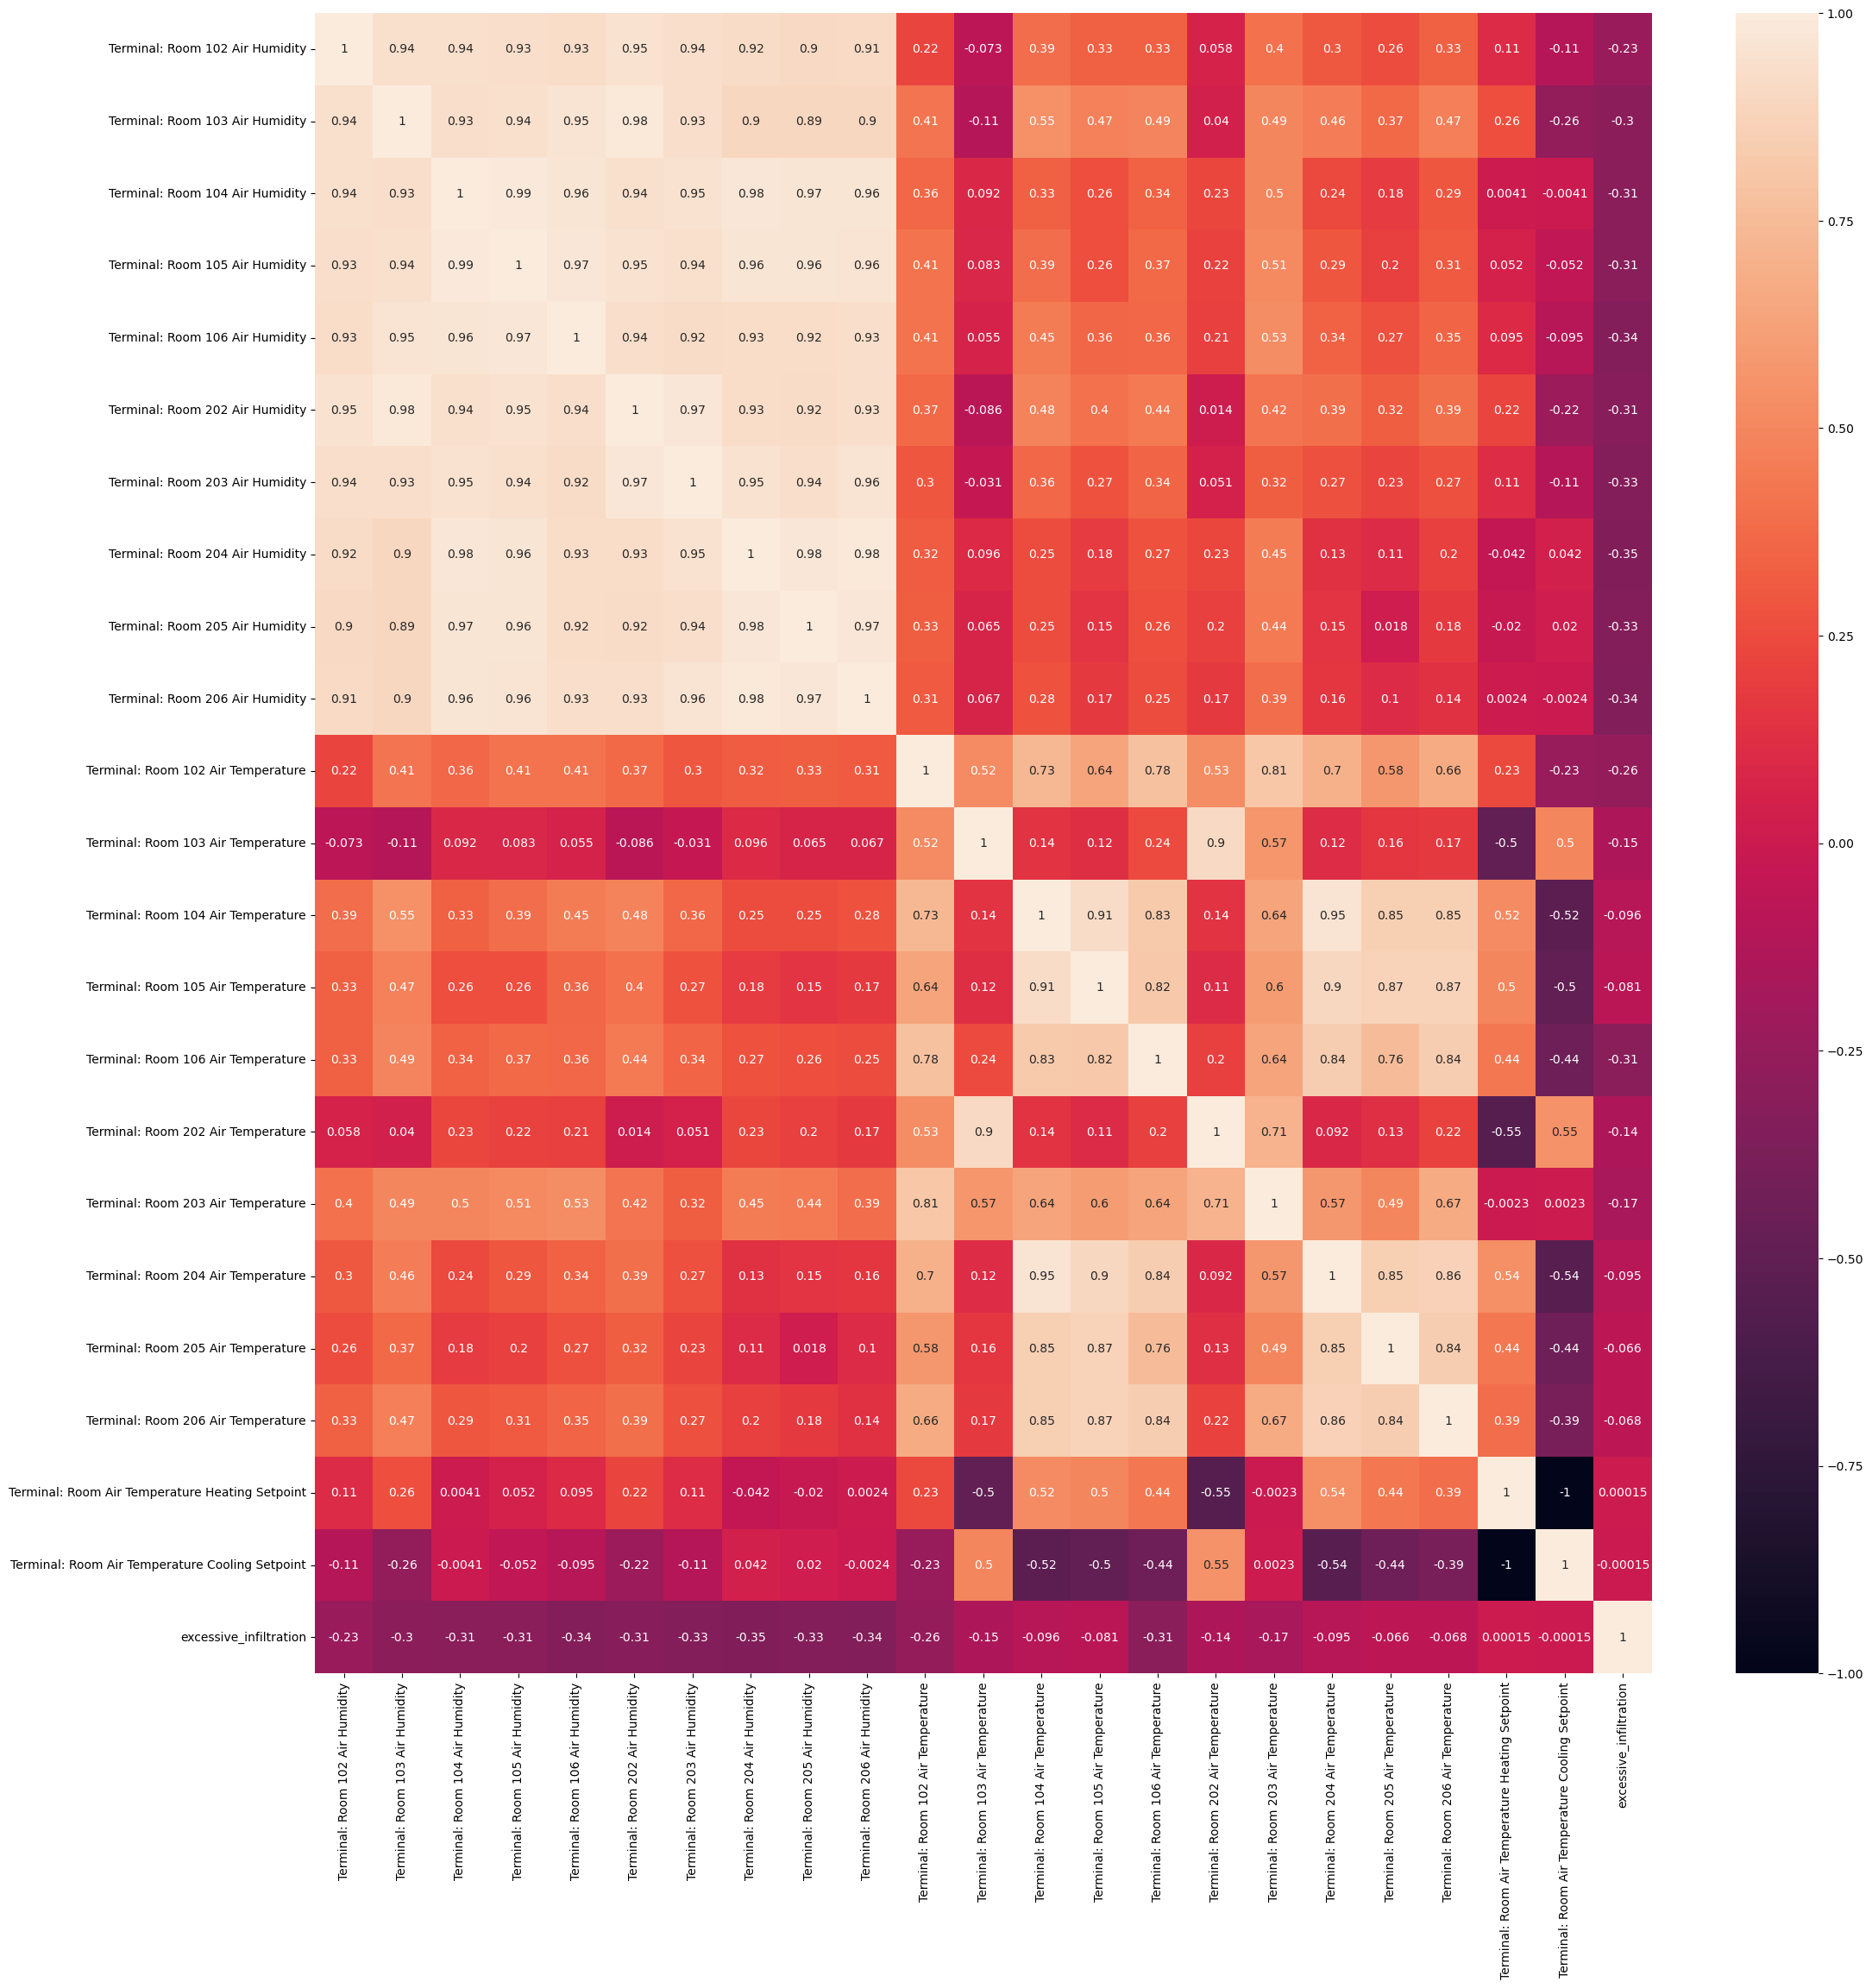

In [44]:
plt.figure(figsize=(25,25))
sns.heatmap(data_ei_1.corr(), annot=True)

## Feature and target data preparation

In [45]:
X_ei = data_ei.drop('excessive_infiltration', axis=1)
y_ei = data_ei['excessive_infiltration']
X_ei_1 = data_ei_1.drop('excessive_infiltration', axis=1)
y_ei_1 = data_ei_1['excessive_infiltration']

In [46]:
X_train_ei, X_test_ei, y_train_ei, y_test_ei = train_test_split(X_ei, y_ei, test_size=0.1, shuffle=True)
X_train_ei_1, X_test_ei_1, y_train_ei_1, y_test_ei_1 = train_test_split(X_ei_1, y_ei_1, test_size=0.1, shuffle=True)

## Classification models training

In [47]:
models_ei, Acc_ei = train_evaluate_classification_models(X_train_ei, X_test_ei, y_train_ei, y_test_ei, classifiers)

Learning rate set to 0.035512
0:	learn: 0.6217426	total: 29.6ms	remaining: 29.6s
1:	learn: 0.5669472	total: 56.9ms	remaining: 28.4s
2:	learn: 0.5182834	total: 103ms	remaining: 34.1s
3:	learn: 0.4654488	total: 135ms	remaining: 33.6s
4:	learn: 0.4066011	total: 165ms	remaining: 32.9s
5:	learn: 0.3750687	total: 191ms	remaining: 31.6s
6:	learn: 0.3508024	total: 234ms	remaining: 33.2s
7:	learn: 0.3313766	total: 265ms	remaining: 32.9s
8:	learn: 0.3133192	total: 291ms	remaining: 32s
9:	learn: 0.2957968	total: 317ms	remaining: 31.4s
10:	learn: 0.2811512	total: 338ms	remaining: 30.4s
11:	learn: 0.2659401	total: 358ms	remaining: 29.5s
12:	learn: 0.2517325	total: 377ms	remaining: 28.6s
13:	learn: 0.2390150	total: 397ms	remaining: 27.9s
14:	learn: 0.2285559	total: 418ms	remaining: 27.4s
15:	learn: 0.2109526	total: 438ms	remaining: 27s
16:	learn: 0.2012347	total: 461ms	remaining: 26.7s
17:	learn: 0.1947364	total: 481ms	remaining: 26.3s
18:	learn: 0.1804840	total: 500ms	remaining: 25.8s
19:	learn: 0.

165:	learn: 0.0083023	total: 4.47s	remaining: 22.5s
166:	learn: 0.0082112	total: 4.51s	remaining: 22.5s
167:	learn: 0.0080628	total: 4.54s	remaining: 22.5s
168:	learn: 0.0079938	total: 4.56s	remaining: 22.4s
169:	learn: 0.0079051	total: 4.57s	remaining: 22.3s
170:	learn: 0.0078232	total: 4.59s	remaining: 22.3s
171:	learn: 0.0077392	total: 4.61s	remaining: 22.2s
172:	learn: 0.0076031	total: 4.63s	remaining: 22.1s
173:	learn: 0.0075435	total: 4.64s	remaining: 22s
174:	learn: 0.0074757	total: 4.66s	remaining: 22s
175:	learn: 0.0073596	total: 4.68s	remaining: 21.9s
176:	learn: 0.0072844	total: 4.7s	remaining: 21.9s
177:	learn: 0.0072383	total: 4.72s	remaining: 21.8s
178:	learn: 0.0071406	total: 4.75s	remaining: 21.8s
179:	learn: 0.0070621	total: 4.77s	remaining: 21.7s
180:	learn: 0.0069687	total: 4.79s	remaining: 21.7s
181:	learn: 0.0068831	total: 4.82s	remaining: 21.7s
182:	learn: 0.0068430	total: 4.85s	remaining: 21.6s
183:	learn: 0.0067617	total: 4.87s	remaining: 21.6s
184:	learn: 0.006

324:	learn: 0.0019280	total: 7.97s	remaining: 16.6s
325:	learn: 0.0019162	total: 8s	remaining: 16.5s
326:	learn: 0.0019019	total: 8.02s	remaining: 16.5s
327:	learn: 0.0018832	total: 8.04s	remaining: 16.5s
328:	learn: 0.0018780	total: 8.06s	remaining: 16.4s
329:	learn: 0.0018672	total: 8.08s	remaining: 16.4s
330:	learn: 0.0018497	total: 8.1s	remaining: 16.4s
331:	learn: 0.0018333	total: 8.11s	remaining: 16.3s
332:	learn: 0.0018209	total: 8.13s	remaining: 16.3s
333:	learn: 0.0018082	total: 8.15s	remaining: 16.3s
334:	learn: 0.0017996	total: 8.17s	remaining: 16.2s
335:	learn: 0.0017927	total: 8.19s	remaining: 16.2s
336:	learn: 0.0017887	total: 8.21s	remaining: 16.1s
337:	learn: 0.0017831	total: 8.23s	remaining: 16.1s
338:	learn: 0.0017786	total: 8.25s	remaining: 16.1s
339:	learn: 0.0017697	total: 8.27s	remaining: 16s
340:	learn: 0.0017543	total: 8.29s	remaining: 16s
341:	learn: 0.0017355	total: 8.31s	remaining: 16s
342:	learn: 0.0017260	total: 8.32s	remaining: 15.9s
343:	learn: 0.0017149	

486:	learn: 0.0008554	total: 11.2s	remaining: 11.8s
487:	learn: 0.0008543	total: 11.3s	remaining: 11.8s
488:	learn: 0.0008498	total: 11.3s	remaining: 11.8s
489:	learn: 0.0008482	total: 11.3s	remaining: 11.8s
490:	learn: 0.0008469	total: 11.3s	remaining: 11.7s
491:	learn: 0.0008432	total: 11.3s	remaining: 11.7s
492:	learn: 0.0008403	total: 11.3s	remaining: 11.7s
493:	learn: 0.0008379	total: 11.4s	remaining: 11.6s
494:	learn: 0.0008360	total: 11.4s	remaining: 11.6s
495:	learn: 0.0008338	total: 11.4s	remaining: 11.6s
496:	learn: 0.0008283	total: 11.4s	remaining: 11.6s
497:	learn: 0.0008218	total: 11.4s	remaining: 11.5s
498:	learn: 0.0008192	total: 11.5s	remaining: 11.5s
499:	learn: 0.0008147	total: 11.5s	remaining: 11.5s
500:	learn: 0.0008095	total: 11.5s	remaining: 11.5s
501:	learn: 0.0008045	total: 11.5s	remaining: 11.4s
502:	learn: 0.0007998	total: 11.5s	remaining: 11.4s
503:	learn: 0.0007998	total: 11.6s	remaining: 11.4s
504:	learn: 0.0007983	total: 11.6s	remaining: 11.4s
505:	learn: 

650:	learn: 0.0007611	total: 14.3s	remaining: 7.65s
651:	learn: 0.0007611	total: 14.3s	remaining: 7.65s
652:	learn: 0.0007611	total: 14.4s	remaining: 7.63s
653:	learn: 0.0007611	total: 14.4s	remaining: 7.61s
654:	learn: 0.0007611	total: 14.4s	remaining: 7.59s
655:	learn: 0.0007611	total: 14.4s	remaining: 7.57s
656:	learn: 0.0007611	total: 14.5s	remaining: 7.55s
657:	learn: 0.0007611	total: 14.5s	remaining: 7.53s
658:	learn: 0.0007611	total: 14.5s	remaining: 7.5s
659:	learn: 0.0007611	total: 14.5s	remaining: 7.48s
660:	learn: 0.0007611	total: 14.5s	remaining: 7.46s
661:	learn: 0.0007611	total: 14.6s	remaining: 7.44s
662:	learn: 0.0007611	total: 14.6s	remaining: 7.42s
663:	learn: 0.0007611	total: 14.6s	remaining: 7.39s
664:	learn: 0.0007611	total: 14.6s	remaining: 7.37s
665:	learn: 0.0007611	total: 14.7s	remaining: 7.35s
666:	learn: 0.0007611	total: 14.7s	remaining: 7.33s
667:	learn: 0.0007611	total: 14.7s	remaining: 7.31s
668:	learn: 0.0007611	total: 14.7s	remaining: 7.29s
669:	learn: 0

813:	learn: 0.0007611	total: 17.8s	remaining: 4.06s
814:	learn: 0.0007611	total: 17.8s	remaining: 4.04s
815:	learn: 0.0007611	total: 17.8s	remaining: 4.02s
816:	learn: 0.0007611	total: 17.8s	remaining: 3.99s
817:	learn: 0.0007611	total: 17.8s	remaining: 3.97s
818:	learn: 0.0007611	total: 17.9s	remaining: 3.95s
819:	learn: 0.0007611	total: 17.9s	remaining: 3.92s
820:	learn: 0.0007611	total: 17.9s	remaining: 3.9s
821:	learn: 0.0007611	total: 17.9s	remaining: 3.88s
822:	learn: 0.0007611	total: 17.9s	remaining: 3.86s
823:	learn: 0.0007611	total: 18s	remaining: 3.83s
824:	learn: 0.0007611	total: 18s	remaining: 3.81s
825:	learn: 0.0007611	total: 18s	remaining: 3.79s
826:	learn: 0.0007611	total: 18s	remaining: 3.77s
827:	learn: 0.0007611	total: 18s	remaining: 3.74s
828:	learn: 0.0007611	total: 18s	remaining: 3.72s
829:	learn: 0.0007611	total: 18.1s	remaining: 3.7s
830:	learn: 0.0007611	total: 18.1s	remaining: 3.67s
831:	learn: 0.0007611	total: 18.1s	remaining: 3.65s
832:	learn: 0.0007611	tota

979:	learn: 0.0007611	total: 20.8s	remaining: 424ms
980:	learn: 0.0007611	total: 20.8s	remaining: 403ms
981:	learn: 0.0007611	total: 20.8s	remaining: 382ms
982:	learn: 0.0007611	total: 20.8s	remaining: 360ms
983:	learn: 0.0007611	total: 20.8s	remaining: 339ms
984:	learn: 0.0007611	total: 20.9s	remaining: 318ms
985:	learn: 0.0007611	total: 20.9s	remaining: 297ms
986:	learn: 0.0007611	total: 20.9s	remaining: 275ms
987:	learn: 0.0007611	total: 20.9s	remaining: 254ms
988:	learn: 0.0007611	total: 20.9s	remaining: 233ms
989:	learn: 0.0007611	total: 21s	remaining: 212ms
990:	learn: 0.0007611	total: 21s	remaining: 190ms
991:	learn: 0.0007611	total: 21s	remaining: 169ms
992:	learn: 0.0007611	total: 21s	remaining: 148ms
993:	learn: 0.0007611	total: 21s	remaining: 127ms
994:	learn: 0.0007611	total: 21.1s	remaining: 106ms
995:	learn: 0.0007611	total: 21.1s	remaining: 84.6ms
996:	learn: 0.0007611	total: 21.1s	remaining: 63.5ms
997:	learn: 0.0007611	total: 21.1s	remaining: 42.3ms
998:	learn: 0.00076

In [48]:
models_ei_1, Acc_ei_1 = train_evaluate_classification_models(X_train_ei_1, X_test_ei_1, y_train_ei_1, y_test_ei_1, classifiers)

Learning rate set to 0.042228
0:	learn: 0.5825211	total: 25.3ms	remaining: 25.3s
1:	learn: 0.5099259	total: 47ms	remaining: 23.4s
2:	learn: 0.4655974	total: 70.3ms	remaining: 23.4s
3:	learn: 0.4283232	total: 92.1ms	remaining: 22.9s
4:	learn: 0.3739784	total: 114ms	remaining: 22.7s
5:	learn: 0.3423066	total: 144ms	remaining: 23.8s
6:	learn: 0.3131554	total: 177ms	remaining: 25.2s
7:	learn: 0.2953524	total: 210ms	remaining: 26.1s
8:	learn: 0.2745270	total: 255ms	remaining: 28s
9:	learn: 0.2464331	total: 279ms	remaining: 27.7s
10:	learn: 0.2337956	total: 301ms	remaining: 27.1s
11:	learn: 0.2177526	total: 325ms	remaining: 26.7s
12:	learn: 0.2067960	total: 348ms	remaining: 26.4s
13:	learn: 0.1870738	total: 371ms	remaining: 26.1s
14:	learn: 0.1796128	total: 392ms	remaining: 25.8s
15:	learn: 0.1650172	total: 424ms	remaining: 26.1s
16:	learn: 0.1545235	total: 468ms	remaining: 27.1s
17:	learn: 0.1477060	total: 519ms	remaining: 28.3s
18:	learn: 0.1423418	total: 557ms	remaining: 28.8s
19:	learn: 

161:	learn: 0.0086927	total: 4.72s	remaining: 24.4s
162:	learn: 0.0085859	total: 4.75s	remaining: 24.4s
163:	learn: 0.0084910	total: 4.77s	remaining: 24.3s
164:	learn: 0.0083922	total: 4.79s	remaining: 24.2s
165:	learn: 0.0082959	total: 4.83s	remaining: 24.3s
166:	learn: 0.0082190	total: 4.86s	remaining: 24.2s
167:	learn: 0.0081074	total: 4.88s	remaining: 24.2s
168:	learn: 0.0080376	total: 4.9s	remaining: 24.1s
169:	learn: 0.0079610	total: 4.93s	remaining: 24.1s
170:	learn: 0.0079046	total: 4.95s	remaining: 24s
171:	learn: 0.0078663	total: 4.97s	remaining: 24s
172:	learn: 0.0078225	total: 5s	remaining: 23.9s
173:	learn: 0.0076600	total: 5.02s	remaining: 23.8s
174:	learn: 0.0075788	total: 5.05s	remaining: 23.8s
175:	learn: 0.0075314	total: 5.07s	remaining: 23.7s
176:	learn: 0.0074524	total: 5.11s	remaining: 23.8s
177:	learn: 0.0073499	total: 5.15s	remaining: 23.8s
178:	learn: 0.0072555	total: 5.17s	remaining: 23.7s
179:	learn: 0.0071433	total: 5.2s	remaining: 23.7s
180:	learn: 0.0070748

325:	learn: 0.0021708	total: 9.38s	remaining: 19.4s
326:	learn: 0.0021659	total: 9.4s	remaining: 19.4s
327:	learn: 0.0021532	total: 9.43s	remaining: 19.3s
328:	learn: 0.0021449	total: 9.46s	remaining: 19.3s
329:	learn: 0.0021397	total: 9.48s	remaining: 19.2s
330:	learn: 0.0021087	total: 9.51s	remaining: 19.2s
331:	learn: 0.0020972	total: 9.54s	remaining: 19.2s
332:	learn: 0.0020880	total: 9.56s	remaining: 19.1s
333:	learn: 0.0020715	total: 9.59s	remaining: 19.1s
334:	learn: 0.0020656	total: 9.61s	remaining: 19.1s
335:	learn: 0.0020492	total: 9.65s	remaining: 19.1s
336:	learn: 0.0020371	total: 9.68s	remaining: 19s
337:	learn: 0.0020326	total: 9.7s	remaining: 19s
338:	learn: 0.0020262	total: 9.73s	remaining: 19s
339:	learn: 0.0020139	total: 9.77s	remaining: 19s
340:	learn: 0.0020039	total: 9.79s	remaining: 18.9s
341:	learn: 0.0019928	total: 9.83s	remaining: 18.9s
342:	learn: 0.0019886	total: 9.85s	remaining: 18.9s
343:	learn: 0.0019785	total: 9.88s	remaining: 18.8s
344:	learn: 0.0019745	

487:	learn: 0.0010014	total: 14.4s	remaining: 15.1s
488:	learn: 0.0009991	total: 14.4s	remaining: 15.1s
489:	learn: 0.0009962	total: 14.4s	remaining: 15s
490:	learn: 0.0009922	total: 14.5s	remaining: 15s
491:	learn: 0.0009856	total: 14.5s	remaining: 15s
492:	learn: 0.0009821	total: 14.5s	remaining: 14.9s
493:	learn: 0.0009768	total: 14.6s	remaining: 14.9s
494:	learn: 0.0009650	total: 14.6s	remaining: 14.9s
495:	learn: 0.0009615	total: 14.6s	remaining: 14.9s
496:	learn: 0.0009615	total: 14.7s	remaining: 14.9s
497:	learn: 0.0009600	total: 14.7s	remaining: 14.8s
498:	learn: 0.0009482	total: 14.7s	remaining: 14.8s
499:	learn: 0.0009454	total: 14.8s	remaining: 14.8s
500:	learn: 0.0009439	total: 14.8s	remaining: 14.7s
501:	learn: 0.0009425	total: 14.9s	remaining: 14.7s
502:	learn: 0.0009420	total: 14.9s	remaining: 14.7s
503:	learn: 0.0009405	total: 14.9s	remaining: 14.7s
504:	learn: 0.0009352	total: 15s	remaining: 14.7s
505:	learn: 0.0009304	total: 15s	remaining: 14.7s
506:	learn: 0.0009289	

647:	learn: 0.0008020	total: 18.8s	remaining: 10.2s
648:	learn: 0.0008020	total: 18.8s	remaining: 10.2s
649:	learn: 0.0008020	total: 18.9s	remaining: 10.2s
650:	learn: 0.0008010	total: 18.9s	remaining: 10.1s
651:	learn: 0.0007988	total: 19s	remaining: 10.1s
652:	learn: 0.0007970	total: 19s	remaining: 10.1s
653:	learn: 0.0007970	total: 19s	remaining: 10.1s
654:	learn: 0.0007953	total: 19.1s	remaining: 10.1s
655:	learn: 0.0007953	total: 19.1s	remaining: 10s
656:	learn: 0.0007904	total: 19.2s	remaining: 10s
657:	learn: 0.0007883	total: 19.2s	remaining: 9.97s
658:	learn: 0.0007864	total: 19.2s	remaining: 9.94s
659:	learn: 0.0007806	total: 19.2s	remaining: 9.91s
660:	learn: 0.0007753	total: 19.3s	remaining: 9.89s
661:	learn: 0.0007733	total: 19.3s	remaining: 9.86s
662:	learn: 0.0007726	total: 19.3s	remaining: 9.83s
663:	learn: 0.0007689	total: 19.4s	remaining: 9.8s
664:	learn: 0.0007644	total: 19.4s	remaining: 9.77s
665:	learn: 0.0007602	total: 19.4s	remaining: 9.74s
666:	learn: 0.0007602	t

811:	learn: 0.0007220	total: 23.3s	remaining: 5.38s
812:	learn: 0.0007220	total: 23.3s	remaining: 5.35s
813:	learn: 0.0007220	total: 23.3s	remaining: 5.32s
814:	learn: 0.0007220	total: 23.3s	remaining: 5.29s
815:	learn: 0.0007220	total: 23.3s	remaining: 5.26s
816:	learn: 0.0007220	total: 23.4s	remaining: 5.23s
817:	learn: 0.0007220	total: 23.4s	remaining: 5.2s
818:	learn: 0.0007220	total: 23.4s	remaining: 5.17s
819:	learn: 0.0007220	total: 23.4s	remaining: 5.15s
820:	learn: 0.0007220	total: 23.5s	remaining: 5.12s
821:	learn: 0.0007220	total: 23.5s	remaining: 5.09s
822:	learn: 0.0007220	total: 23.5s	remaining: 5.06s
823:	learn: 0.0007220	total: 23.6s	remaining: 5.03s
824:	learn: 0.0007220	total: 23.6s	remaining: 5.01s
825:	learn: 0.0007220	total: 23.6s	remaining: 4.98s
826:	learn: 0.0007220	total: 23.8s	remaining: 4.97s
827:	learn: 0.0007220	total: 23.8s	remaining: 4.95s
828:	learn: 0.0007220	total: 23.8s	remaining: 4.92s
829:	learn: 0.0007220	total: 23.9s	remaining: 4.89s
830:	learn: 0

974:	learn: 0.0007214	total: 27.7s	remaining: 711ms
975:	learn: 0.0007214	total: 27.7s	remaining: 682ms
976:	learn: 0.0007214	total: 27.8s	remaining: 654ms
977:	learn: 0.0007214	total: 27.8s	remaining: 625ms
978:	learn: 0.0007214	total: 27.8s	remaining: 597ms
979:	learn: 0.0007214	total: 27.8s	remaining: 568ms
980:	learn: 0.0007214	total: 27.9s	remaining: 539ms
981:	learn: 0.0007214	total: 27.9s	remaining: 511ms
982:	learn: 0.0007214	total: 27.9s	remaining: 482ms
983:	learn: 0.0007214	total: 27.9s	remaining: 454ms
984:	learn: 0.0007214	total: 27.9s	remaining: 426ms
985:	learn: 0.0007214	total: 28s	remaining: 397ms
986:	learn: 0.0007214	total: 28s	remaining: 369ms
987:	learn: 0.0007214	total: 28s	remaining: 340ms
988:	learn: 0.0007214	total: 28s	remaining: 312ms
989:	learn: 0.0007214	total: 28.1s	remaining: 283ms
990:	learn: 0.0007214	total: 28.1s	remaining: 255ms
991:	learn: 0.0007214	total: 28.1s	remaining: 227ms
992:	learn: 0.0007214	total: 28.1s	remaining: 198ms
993:	learn: 0.000721

## Models evaluation

In [49]:
print(Acc_ei)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.999835       1.000000         1.000000   
1               MLPClassifier        0.994267       0.991071         0.999466   
2          AdaBoostClassifier        0.995314       0.991567         0.980662   
3  GradientBoostingClassifier        0.998677       0.999504         0.999488   
4          CatBoostClassifier        1.000000       1.000000         1.000000   
5               XGBClassifier        1.000000       1.000000         1.000000   
6           BaggingClassifier        0.999669       0.997520         1.000000   
7      RandomForestClassifier        1.000000       0.999504         1.000000   
8      DecisionTreeClassifier        1.000000       0.994048         1.000000   
9          LogisticRegression        0.984950       0.979167         0.946457   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        1.000000      0.998480     1.000

In [50]:
print(Acc_ei_1)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.999963       1.000000         0.999612   
1               MLPClassifier        0.985119       0.982143         0.902520   
2          AdaBoostClassifier        0.989491       0.990741         0.972371   
3  GradientBoostingClassifier        0.997759       0.997024         0.999603   
4          CatBoostClassifier        1.000000       0.999669         1.000000   
5               XGBClassifier        1.000000       0.999339         1.000000   
6           BaggingClassifier        0.999890       0.998347         1.000000   
7      RandomForestClassifier        1.000000       0.999339         1.000000   
8      DecisionTreeClassifier        1.000000       0.995370         1.000000   
9          LogisticRegression        0.988022       0.988426         0.962598   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        1.000000      1.000000     1.000

<BarContainer object of 22 artists>

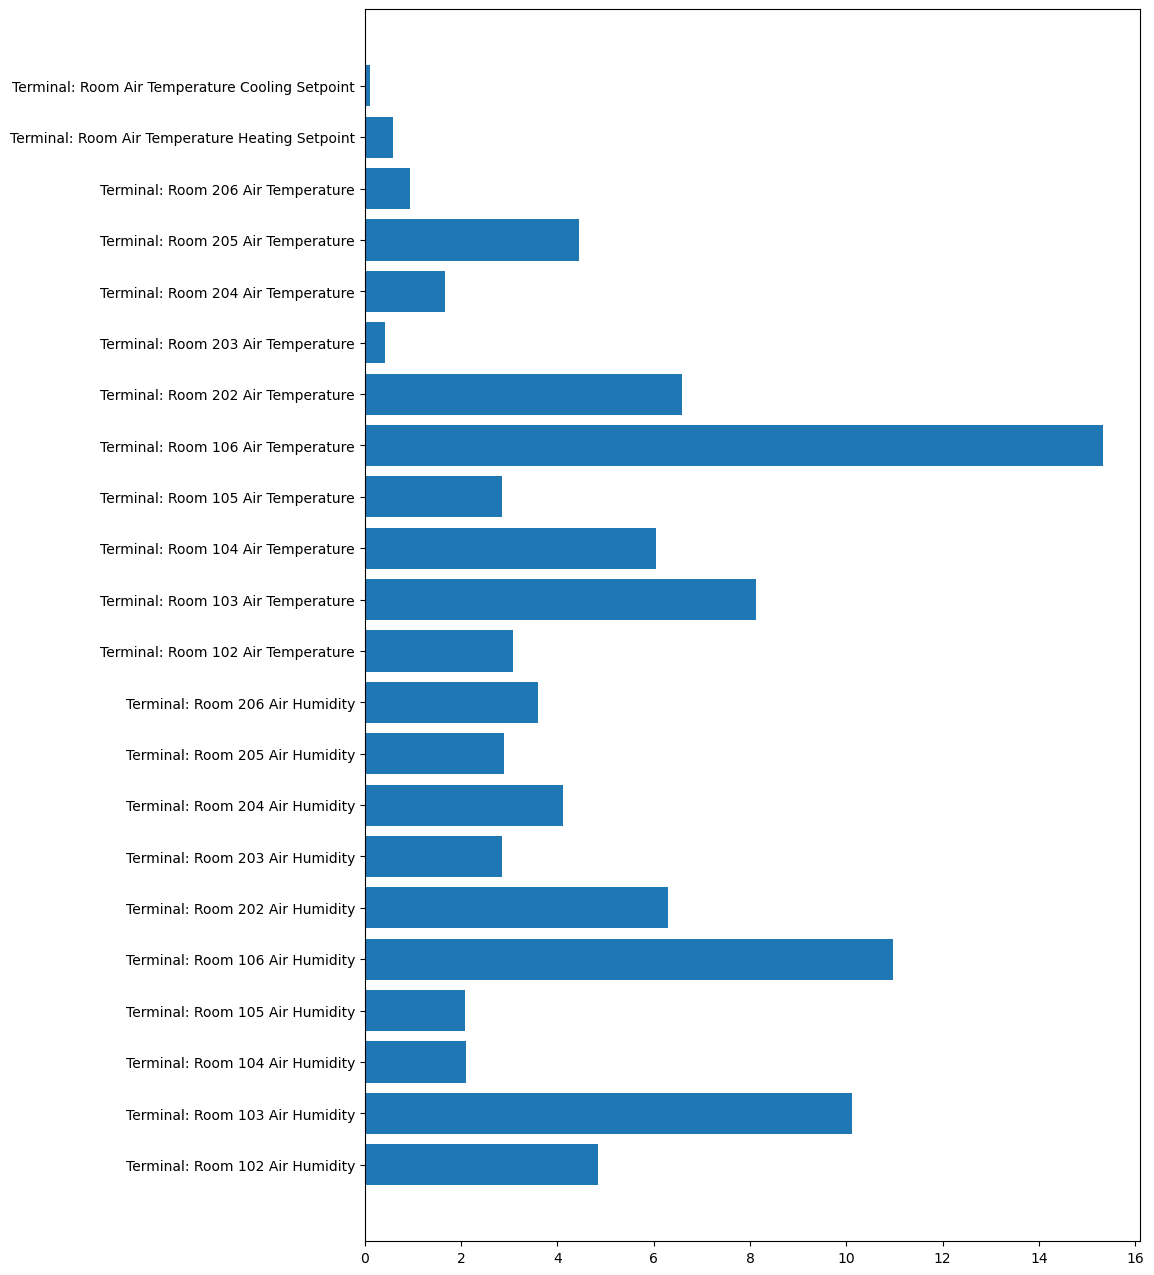

In [51]:
plt.figure(figsize=(10,16))
plt.barh(X_ei_1.columns, models_ei_1[4].get_feature_importance())

Both types of models demonstrated exceptional performance, showcasing they could be effective in this particular fault detection. Intriguingly, the deletion of columns containing VAV data had no discernible impact on the models' performance.

However, upon closer examination of the feature importance values, significant disparities emerge between features. Notably, these differences are difficult to logically explain, such why Room 106 is much more important than Room 105.

Two potential explanations arise:

    Room Characteristics: The shape, size, and spatial arrangement of individual rooms could influence how conditions within them respond to infiltration. This hypothesis suggests that the differences in feature importance are grounded in the unique attributes of each room.

    Weather Conditions: Specific weather conditions experienced during the tests could have influenced the weighting of features in the model, accounting for the discrepancies.

Should the first possibility hold true, the model's predictive capacity aligns with the actual dynamics of the building. However, it's worth considering that the building's architecture is relatively straightforward, with regularly spaced windows, somewhat challenging the notion of room-specific variations in infiltration response.

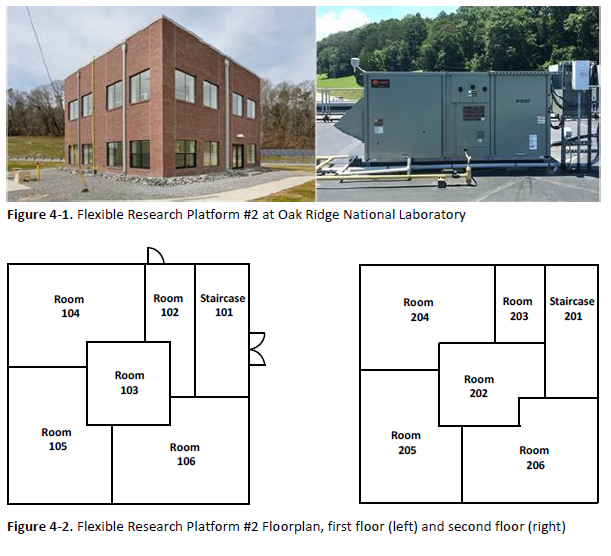

If possibility 2 holds true, it raises questions about the model's generalization beyond the specific weather conditions encountered during its training. Despite the exceptional model evaluation metrics, the potential of overfitting arises—indicating that the model might have become tailored to the precise weather patterns during the training period. Consequently, its effectiveness in detecting such faults under dissimilar atmospheric conditions could be compromised.

Given that the fault simulation occurred over two days separated by a week, variations in weather conditions between these days might have influenced the model's performance. To ascertain the validity of hypothesis 2, a methodical approach could involve training a model without data from one of these days and then attempting to predict the outcomes of that omitted day. This experiment could offer insights into whether the model's success hinges on specific weather patterns.

## Additional Model check - models trained witht only one faulted day

### Data preparation for test model training

In [52]:
data_ei_2 = data_ei_1.copy()
data_ei_2['excessive_infiltration_1'] = data['excessive_infiltration_1']

In [53]:
# Selecting data without one day with fault.
data_ei_2 = data_ei_2[data_ei_2['excessive_infiltration_1']==0]

In [54]:
X_ei_2 = data_ei_2[X_ei_1.columns]
y_ei_2 = data_ei_2['excessive_infiltration']

In [55]:
X_train_ei_2, X_test_ei_2, y_train_ei_2, y_test_ei_2 = train_test_split(X_ei_2, y_ei_2, test_size=0.1, shuffle=True)

### Test model training

In [56]:
classifier = [['CatBoostClassifier', CatBoostClassifier()]]

In [57]:
models_ei_2, acc_ei_2 = train_evaluate_classification_models(X_train_ei_2, X_test_ei_2, y_train_ei_2, y_test_ei_2, classifier)

Learning rate set to 0.041358
0:	learn: 0.5806370	total: 41.1ms	remaining: 41.1s
1:	learn: 0.4885220	total: 85ms	remaining: 42.4s
2:	learn: 0.3889714	total: 122ms	remaining: 40.4s
3:	learn: 0.3132817	total: 163ms	remaining: 40.5s
4:	learn: 0.2670562	total: 210ms	remaining: 41.8s
5:	learn: 0.2356524	total: 268ms	remaining: 44.4s
6:	learn: 0.1925694	total: 306ms	remaining: 43.4s
7:	learn: 0.1651797	total: 344ms	remaining: 42.7s
8:	learn: 0.1448260	total: 386ms	remaining: 42.5s
9:	learn: 0.1284064	total: 428ms	remaining: 42.4s
10:	learn: 0.1167737	total: 463ms	remaining: 41.7s
11:	learn: 0.1018526	total: 502ms	remaining: 41.3s
12:	learn: 0.0895934	total: 551ms	remaining: 41.8s
13:	learn: 0.0808965	total: 592ms	remaining: 41.7s
14:	learn: 0.0708614	total: 631ms	remaining: 41.4s
15:	learn: 0.0622574	total: 674ms	remaining: 41.4s
16:	learn: 0.0561901	total: 698ms	remaining: 40.4s
17:	learn: 0.0515278	total: 722ms	remaining: 39.4s
18:	learn: 0.0481611	total: 748ms	remaining: 38.6s
19:	learn: 

162:	learn: 0.0011826	total: 5.53s	remaining: 28.4s
163:	learn: 0.0011668	total: 5.56s	remaining: 28.3s
164:	learn: 0.0011567	total: 5.58s	remaining: 28.3s
165:	learn: 0.0011364	total: 5.61s	remaining: 28.2s
166:	learn: 0.0011199	total: 5.63s	remaining: 28.1s
167:	learn: 0.0011017	total: 5.66s	remaining: 28s
168:	learn: 0.0010936	total: 5.68s	remaining: 27.9s
169:	learn: 0.0010753	total: 5.7s	remaining: 27.8s
170:	learn: 0.0010656	total: 5.74s	remaining: 27.8s
171:	learn: 0.0010550	total: 5.76s	remaining: 27.7s
172:	learn: 0.0010318	total: 5.79s	remaining: 27.7s
173:	learn: 0.0010209	total: 5.82s	remaining: 27.6s
174:	learn: 0.0010075	total: 5.87s	remaining: 27.6s
175:	learn: 0.0009909	total: 5.91s	remaining: 27.7s
176:	learn: 0.0009806	total: 5.93s	remaining: 27.6s
177:	learn: 0.0009685	total: 5.98s	remaining: 27.6s
178:	learn: 0.0009586	total: 6s	remaining: 27.5s
179:	learn: 0.0009547	total: 6.03s	remaining: 27.5s
180:	learn: 0.0009489	total: 6.05s	remaining: 27.4s
181:	learn: 0.0009

325:	learn: 0.0002980	total: 9.97s	remaining: 20.6s
326:	learn: 0.0002962	total: 9.99s	remaining: 20.6s
327:	learn: 0.0002939	total: 10s	remaining: 20.6s
328:	learn: 0.0002919	total: 10.1s	remaining: 20.5s
329:	learn: 0.0002892	total: 10.1s	remaining: 20.5s
330:	learn: 0.0002876	total: 10.1s	remaining: 20.4s
331:	learn: 0.0002862	total: 10.1s	remaining: 20.4s
332:	learn: 0.0002844	total: 10.2s	remaining: 20.4s
333:	learn: 0.0002824	total: 10.2s	remaining: 20.4s
334:	learn: 0.0002805	total: 10.2s	remaining: 20.3s
335:	learn: 0.0002784	total: 10.3s	remaining: 20.3s
336:	learn: 0.0002767	total: 10.3s	remaining: 20.2s
337:	learn: 0.0002758	total: 10.3s	remaining: 20.2s
338:	learn: 0.0002742	total: 10.3s	remaining: 20.2s
339:	learn: 0.0002724	total: 10.4s	remaining: 20.1s
340:	learn: 0.0002697	total: 10.4s	remaining: 20.1s
341:	learn: 0.0002680	total: 10.4s	remaining: 20s
342:	learn: 0.0002664	total: 10.4s	remaining: 20s
343:	learn: 0.0002649	total: 10.5s	remaining: 20s
344:	learn: 0.000263

486:	learn: 0.0002132	total: 13.9s	remaining: 14.6s
487:	learn: 0.0002132	total: 13.9s	remaining: 14.6s
488:	learn: 0.0002132	total: 14s	remaining: 14.6s
489:	learn: 0.0002132	total: 14s	remaining: 14.5s
490:	learn: 0.0002132	total: 14s	remaining: 14.5s
491:	learn: 0.0002132	total: 14s	remaining: 14.5s
492:	learn: 0.0002132	total: 14s	remaining: 14.4s
493:	learn: 0.0002132	total: 14.1s	remaining: 14.4s
494:	learn: 0.0002132	total: 14.1s	remaining: 14.4s
495:	learn: 0.0002132	total: 14.1s	remaining: 14.3s
496:	learn: 0.0002132	total: 14.1s	remaining: 14.3s
497:	learn: 0.0002132	total: 14.1s	remaining: 14.3s
498:	learn: 0.0002132	total: 14.2s	remaining: 14.2s
499:	learn: 0.0002132	total: 14.2s	remaining: 14.2s
500:	learn: 0.0002132	total: 14.2s	remaining: 14.2s
501:	learn: 0.0002132	total: 14.2s	remaining: 14.1s
502:	learn: 0.0002132	total: 14.3s	remaining: 14.1s
503:	learn: 0.0002132	total: 14.3s	remaining: 14s
504:	learn: 0.0002132	total: 14.3s	remaining: 14s
505:	learn: 0.0002132	tota

646:	learn: 0.0002132	total: 17.4s	remaining: 9.49s
647:	learn: 0.0002132	total: 17.4s	remaining: 9.46s
648:	learn: 0.0002132	total: 17.4s	remaining: 9.43s
649:	learn: 0.0002132	total: 17.5s	remaining: 9.4s
650:	learn: 0.0002132	total: 17.5s	remaining: 9.37s
651:	learn: 0.0002132	total: 17.5s	remaining: 9.33s
652:	learn: 0.0002132	total: 17.5s	remaining: 9.3s
653:	learn: 0.0002132	total: 17.5s	remaining: 9.27s
654:	learn: 0.0002132	total: 17.5s	remaining: 9.24s
655:	learn: 0.0002132	total: 17.6s	remaining: 9.21s
656:	learn: 0.0002132	total: 17.6s	remaining: 9.19s
657:	learn: 0.0002132	total: 17.6s	remaining: 9.16s
658:	learn: 0.0002132	total: 17.7s	remaining: 9.14s
659:	learn: 0.0002132	total: 17.7s	remaining: 9.11s
660:	learn: 0.0002132	total: 17.7s	remaining: 9.08s
661:	learn: 0.0002132	total: 17.7s	remaining: 9.05s
662:	learn: 0.0002132	total: 17.7s	remaining: 9.02s
663:	learn: 0.0002132	total: 17.8s	remaining: 8.98s
664:	learn: 0.0002132	total: 17.8s	remaining: 8.95s
665:	learn: 0.

806:	learn: 0.0002132	total: 20.7s	remaining: 4.96s
807:	learn: 0.0002132	total: 20.7s	remaining: 4.93s
808:	learn: 0.0002132	total: 20.8s	remaining: 4.9s
809:	learn: 0.0002132	total: 20.8s	remaining: 4.88s
810:	learn: 0.0002132	total: 20.8s	remaining: 4.85s
811:	learn: 0.0002132	total: 20.9s	remaining: 4.83s
812:	learn: 0.0002132	total: 20.9s	remaining: 4.81s
813:	learn: 0.0002132	total: 20.9s	remaining: 4.79s
814:	learn: 0.0002132	total: 21s	remaining: 4.76s
815:	learn: 0.0002132	total: 21s	remaining: 4.73s
816:	learn: 0.0002132	total: 21s	remaining: 4.7s
817:	learn: 0.0002132	total: 21s	remaining: 4.68s
818:	learn: 0.0002132	total: 21s	remaining: 4.65s
819:	learn: 0.0002132	total: 21.1s	remaining: 4.62s
820:	learn: 0.0002132	total: 21.1s	remaining: 4.6s
821:	learn: 0.0002132	total: 21.1s	remaining: 4.57s
822:	learn: 0.0002132	total: 21.1s	remaining: 4.54s
823:	learn: 0.0002132	total: 21.1s	remaining: 4.51s
824:	learn: 0.0002132	total: 21.2s	remaining: 4.49s
825:	learn: 0.0002132	tot

971:	learn: 0.0002132	total: 24.2s	remaining: 697ms
972:	learn: 0.0002132	total: 24.2s	remaining: 672ms
973:	learn: 0.0002132	total: 24.2s	remaining: 647ms
974:	learn: 0.0002132	total: 24.3s	remaining: 622ms
975:	learn: 0.0002132	total: 24.3s	remaining: 597ms
976:	learn: 0.0002132	total: 24.3s	remaining: 572ms
977:	learn: 0.0002132	total: 24.3s	remaining: 547ms
978:	learn: 0.0002132	total: 24.3s	remaining: 522ms
979:	learn: 0.0002132	total: 24.4s	remaining: 497ms
980:	learn: 0.0002132	total: 24.4s	remaining: 472ms
981:	learn: 0.0002132	total: 24.4s	remaining: 447ms
982:	learn: 0.0002132	total: 24.4s	remaining: 423ms
983:	learn: 0.0002132	total: 24.4s	remaining: 398ms
984:	learn: 0.0002132	total: 24.5s	remaining: 373ms
985:	learn: 0.0002132	total: 24.5s	remaining: 348ms
986:	learn: 0.0002132	total: 24.5s	remaining: 323ms
987:	learn: 0.0002132	total: 24.5s	remaining: 298ms
988:	learn: 0.0002132	total: 24.5s	remaining: 273ms
989:	learn: 0.0002132	total: 24.6s	remaining: 248ms
990:	learn: 

### Test model evaluation

In [58]:
print(acc_ei_2)

                model  train_accuracy  test_accuracy  train_precision  \
0  CatBoostClassifier             1.0       0.999653              1.0   

   test_precision  train_recall  test_recall  train_f1  test_f1  
0             1.0           1.0     0.993103       1.0  0.99654  


Model statistics seems still really good. Now the data from the previously deleted day will be tested.

In [59]:
test_data = data_ei_1.copy()
test_data['excessive_infiltration_1'] = data['excessive_infiltration_1']

In [60]:
# Selecting previously deleted data.
test_data = test_data[test_data['excessive_infiltration_1']==1]

In [61]:
test_data = test_data[X_ei_1.columns]

In [62]:
prediction = models_ei_2[0].predict(test_data)

In [63]:
prediction.mean()

0.0

The absence of fault detection during that specific day indeed supports the hypothesis that the model's performance was tied to the specific weather conditions encountered during its training. This outcome underscores the need for a model that can adapt effectively to a range of weather conditions, highlighting the necessity for more diverse data or alternative model-building strategies.

In the forthcoming steps, an exploration of different approaches will be undertaken. Specifically, the intention is to construct a model by treating all rooms as a single entity, thereby potentially mitigating the influence of room-specific variations and enhancing the model's adaptability to varying weather conditions.

## Excesive infiltration - 2nd approach

Each room, while having subtle differences in area, window and door placement, shares identical air conditioning and ventilation systems, as well as sensor placements. This similarity implies that akin dependencies will likely emerge during infiltration faults across all rooms. Thus, adopting an approach that treats all distinct rooms as a singular entity appears reasonable. This strategy aims to derive a more generalized model that transcends specific room attributes and environmental conditions, such as wind direction, fostering adaptability across various spaces.

With this approach, the CatBoostClassifier will exclusively be employed, given its exemplary performance in preceding models.

### Feature engineering

In the upcoming phases, the dataset will undergo a transformation that involves stacking data from all rooms sequentially. By adopting this approach, we simulate a scenario where data is only available from a single room, accompanied by varying external conditions. Notably, data such as Heating and Cooling Setpoint will be replicated in every iteration to ensure uniformity.

Once again, two distinct types of models will be constructed using this approach. One model will incorporate VAV data, while the other will exclude it.

In [64]:
data_ei.columns

Index(['Terminal: Room 102 Air Humidity', 'Terminal: Room 103 Air Humidity',
       'Terminal: Room 104 Air Humidity', 'Terminal: Room 105 Air Humidity',
       'Terminal: Room 106 Air Humidity', 'Terminal: Room 202 Air Humidity',
       'Terminal: Room 203 Air Humidity', 'Terminal: Room 204 Air Humidity',
       'Terminal: Room 205 Air Humidity', 'Terminal: Room 206 Air Humidity',
       'Terminal: Room 102 Air Temperature',
       'Terminal: Room 103 Air Temperature',
       'Terminal: Room 104 Air Temperature',
       'Terminal: Room 105 Air Temperature',
       'Terminal: Room 106 Air Temperature',
       'Terminal: Room 202 Air Temperature',
       'Terminal: Room 203 Air Temperature',
       'Terminal: Room 204 Air Temperature',
       'Terminal: Room 205 Air Temperature',
       'Terminal: Room 206 Air Temperature',
       'Terminal: Room Air Temperature Heating Setpoint',
       'Terminal: Room Air Temperature Cooling Setpoint',
       'VAV Box: Room 102 Reheat Status', 'VAV Bo

In the new Dataset there will be following columns: 'Terminal: Room Air Humidity','Terminal: Room Air Temperature', 'Terminal: Room Air Temperature Heating Setpoint','Terminal: Room Air Temperature Cooling Setpoint', 'VAV Box: Room Reheat Status', 'VAV Box: Room Air Temperature','excessive_infiltration'.

In [65]:
# Dataset with vav data
data_ei_vav = pd.DataFrame(index=None, columns=['Terminal: Room Air Humidity','Terminal: Room Air Temperature',
                                              'Terminal: Room Air Temperature Heating Setpoint','Terminal: Room Air Temperature Cooling Setpoint',
                                              'VAV Box: Room Reheat Status', 'VAV Box: Room Air Temperature','excessive_infiltration'])

In [66]:
# Dataset without vav data
data_ei_not_vav = pd.DataFrame(index=None, columns=['Terminal: Room Air Humidity','Terminal: Room Air Temperature',
                                              'Terminal: Room Air Temperature Heating Setpoint','Terminal: Room Air Temperature Cooling Setpoint','excessive_infiltration'])

In [67]:
col_terminal_air_humidity = [col for col in X_ei.columns if "Air Humidity" in col]

In [68]:
col_terminal_air_temperature = [col for col in X_ei.columns if "Terminal" in col and "Air Temperature" in col and "Setpoint" not in col]

In [69]:
col_vav_air_temperature = [col for col in X_ei.columns if "VAV" in col and "Air Temperature" in col]

In [70]:
col_vav_reheat = [col for col in X_ei.columns if "Reheat" in col]

In [71]:
# Stacking data from all rooms - data with VAV information.
data_ei_vav['Terminal: Room Air Humidity'] = pd.melt(data_ei, value_vars=col_terminal_air_humidity).value
data_ei_vav['Terminal: Room Air Temperature'] = pd.melt(data_ei, value_vars=col_terminal_air_temperature).value
data_ei_vav['VAV Box: Room Reheat Status'] = pd.melt(data_ei, value_vars=col_vav_reheat).value
data_ei_vav['VAV Box: Room Air Temperature'] = pd.melt(data_ei, value_vars=col_vav_air_temperature).value
data_ei_vav['Terminal: Room Air Temperature Heating Setpoint'] = data_ei['Terminal: Room Air Temperature Heating Setpoint'].repeat(len(col_terminal_air_humidity)).reset_index(drop=True)
data_ei_vav['Terminal: Room Air Temperature Cooling Setpoint'] = data_ei['Terminal: Room Air Temperature Cooling Setpoint'].repeat(len(col_terminal_air_humidity)).reset_index(drop=True)
data_ei_vav['excessive_infiltration'] = data_ei['excessive_infiltration'].repeat(len(col_terminal_air_humidity)).reset_index(drop=True)

In [72]:
# Stacking data from all rooms - data without VAV information.
data_ei_not_vav['Terminal: Room Air Humidity'] = pd.melt(data_ei_1, value_vars=col_terminal_air_humidity).value
data_ei_not_vav['Terminal: Room Air Temperature'] = pd.melt(data_ei_1, value_vars=col_terminal_air_temperature).value
data_ei_not_vav['Terminal: Room Air Temperature Heating Setpoint'] = data_ei_1['Terminal: Room Air Temperature Heating Setpoint'].repeat(len(col_terminal_air_humidity)).reset_index(drop=True)
data_ei_not_vav['Terminal: Room Air Temperature Cooling Setpoint'] = data_ei_1['Terminal: Room Air Temperature Cooling Setpoint'].repeat(len(col_terminal_air_humidity)).reset_index(drop=True)
data_ei_not_vav['excessive_infiltration'] = data_ei_1['excessive_infiltration'].repeat(len(col_terminal_air_humidity)).reset_index(drop=True)

In [73]:
data_ei_vav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201560 entries, 0 to 201559
Data columns (total 7 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Terminal: Room Air Humidity                      201560 non-null  float64
 1   Terminal: Room Air Temperature                   201560 non-null  float64
 2   Terminal: Room Air Temperature Heating Setpoint  201560 non-null  float64
 3   Terminal: Room Air Temperature Cooling Setpoint  201560 non-null  float64
 4   VAV Box: Room Reheat Status                      201560 non-null  int64  
 5   VAV Box: Room Air Temperature                    201560 non-null  float64
 6   excessive_infiltration                           201560 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 10.8 MB


In [74]:
data_ei_not_vav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302400 entries, 0 to 302399
Data columns (total 5 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Terminal: Room Air Humidity                      302400 non-null  float64
 1   Terminal: Room Air Temperature                   302400 non-null  float64
 2   Terminal: Room Air Temperature Heating Setpoint  302400 non-null  float64
 3   Terminal: Room Air Temperature Cooling Setpoint  302400 non-null  float64
 4   excessive_infiltration                           302400 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 11.5 MB


Datasets doesn't contain null values, have proper datatypes so they are ready for model building.

### Feature and target data preparation

In [75]:
X_ei_vav = data_ei_vav.drop('excessive_infiltration', axis=1)
X_ei_not_vav = data_ei_not_vav.drop('excessive_infiltration', axis=1)

In [76]:
y_ei_vav = data_ei_vav['excessive_infiltration']
y_ei_not_vav = data_ei_not_vav['excessive_infiltration']

In [77]:
X_train_ei_vav, X_test_ei_vav, y_train_ei_vav, y_test_ei_vav = train_test_split(X_ei_vav, y_ei_vav, test_size=0.1, shuffle=True)
X_train_ei_not_vav, X_test_ei_not_vav, y_train_ei_not_vav, y_test_ei_not_vav = train_test_split(X_ei_not_vav, y_ei_not_vav, test_size=0.1, shuffle=True)

### Model training

In [78]:
models_ei_vav, acc_ei_vav = train_evaluate_classification_models(X_train_ei_vav, X_test_ei_vav, y_train_ei_vav, y_test_ei_vav, classifier)
models_ei_not_vav, acc_ei_not_vav = train_evaluate_classification_models(X_train_ei_not_vav, X_test_ei_not_vav, y_train_ei_not_vav, y_test_ei_not_vav, classifier)

Learning rate set to 0.094924
0:	learn: 0.6036254	total: 105ms	remaining: 1m 44s
1:	learn: 0.5398543	total: 179ms	remaining: 1m 29s
2:	learn: 0.4858635	total: 271ms	remaining: 1m 29s
3:	learn: 0.4441483	total: 411ms	remaining: 1m 42s
4:	learn: 0.4135400	total: 498ms	remaining: 1m 39s
5:	learn: 0.3871116	total: 590ms	remaining: 1m 37s
6:	learn: 0.3704131	total: 656ms	remaining: 1m 33s
7:	learn: 0.3542598	total: 754ms	remaining: 1m 33s
8:	learn: 0.3415901	total: 846ms	remaining: 1m 33s
9:	learn: 0.3323613	total: 944ms	remaining: 1m 33s
10:	learn: 0.3231396	total: 1.06s	remaining: 1m 35s
11:	learn: 0.3157281	total: 1.16s	remaining: 1m 35s
12:	learn: 0.3102614	total: 1.23s	remaining: 1m 33s
13:	learn: 0.3056546	total: 1.3s	remaining: 1m 31s
14:	learn: 0.3019935	total: 1.39s	remaining: 1m 31s
15:	learn: 0.2972983	total: 1.47s	remaining: 1m 30s
16:	learn: 0.2947757	total: 1.53s	remaining: 1m 28s
17:	learn: 0.2926936	total: 1.58s	remaining: 1m 26s
18:	learn: 0.2901398	total: 1.63s	remaining: 

162:	learn: 0.2438816	total: 11s	remaining: 56.5s
163:	learn: 0.2437210	total: 11.1s	remaining: 56.4s
164:	learn: 0.2436245	total: 11.1s	remaining: 56.3s
165:	learn: 0.2434057	total: 11.2s	remaining: 56.2s
166:	learn: 0.2431973	total: 11.3s	remaining: 56.1s
167:	learn: 0.2430899	total: 11.3s	remaining: 56s
168:	learn: 0.2429300	total: 11.4s	remaining: 55.9s
169:	learn: 0.2428052	total: 11.4s	remaining: 55.9s
170:	learn: 0.2427405	total: 11.5s	remaining: 55.8s
171:	learn: 0.2426915	total: 11.6s	remaining: 55.6s
172:	learn: 0.2425773	total: 11.6s	remaining: 55.5s
173:	learn: 0.2424650	total: 11.7s	remaining: 55.4s
174:	learn: 0.2423359	total: 11.8s	remaining: 55.4s
175:	learn: 0.2421949	total: 11.8s	remaining: 55.3s
176:	learn: 0.2420313	total: 11.9s	remaining: 55.2s
177:	learn: 0.2418440	total: 11.9s	remaining: 55.1s
178:	learn: 0.2417415	total: 12s	remaining: 55s
179:	learn: 0.2416598	total: 12s	remaining: 54.9s
180:	learn: 0.2415343	total: 12.1s	remaining: 54.8s
181:	learn: 0.2413927	

321:	learn: 0.2302317	total: 21.2s	remaining: 44.6s
322:	learn: 0.2301765	total: 21.2s	remaining: 44.5s
323:	learn: 0.2301424	total: 21.3s	remaining: 44.5s
324:	learn: 0.2300754	total: 21.4s	remaining: 44.4s
325:	learn: 0.2300173	total: 21.5s	remaining: 44.4s
326:	learn: 0.2299623	total: 21.6s	remaining: 44.4s
327:	learn: 0.2299106	total: 21.6s	remaining: 44.3s
328:	learn: 0.2298672	total: 21.7s	remaining: 44.3s
329:	learn: 0.2297977	total: 21.8s	remaining: 44.2s
330:	learn: 0.2297717	total: 21.9s	remaining: 44.2s
331:	learn: 0.2297024	total: 21.9s	remaining: 44.1s
332:	learn: 0.2296385	total: 22s	remaining: 44s
333:	learn: 0.2296051	total: 22s	remaining: 43.9s
334:	learn: 0.2295570	total: 22.1s	remaining: 43.9s
335:	learn: 0.2295340	total: 22.2s	remaining: 43.8s
336:	learn: 0.2294628	total: 22.2s	remaining: 43.8s
337:	learn: 0.2293746	total: 22.3s	remaining: 43.7s
338:	learn: 0.2293293	total: 22.4s	remaining: 43.7s
339:	learn: 0.2292467	total: 22.5s	remaining: 43.6s
340:	learn: 0.2291

481:	learn: 0.2221665	total: 32.4s	remaining: 34.9s
482:	learn: 0.2221261	total: 32.5s	remaining: 34.8s
483:	learn: 0.2220976	total: 32.6s	remaining: 34.7s
484:	learn: 0.2220719	total: 32.6s	remaining: 34.6s
485:	learn: 0.2220208	total: 32.7s	remaining: 34.6s
486:	learn: 0.2219889	total: 32.7s	remaining: 34.5s
487:	learn: 0.2219206	total: 32.8s	remaining: 34.4s
488:	learn: 0.2218778	total: 32.9s	remaining: 34.4s
489:	learn: 0.2218220	total: 32.9s	remaining: 34.3s
490:	learn: 0.2217893	total: 33s	remaining: 34.2s
491:	learn: 0.2217739	total: 33.1s	remaining: 34.2s
492:	learn: 0.2217087	total: 33.2s	remaining: 34.1s
493:	learn: 0.2216824	total: 33.2s	remaining: 34s
494:	learn: 0.2216365	total: 33.3s	remaining: 34s
495:	learn: 0.2215483	total: 33.3s	remaining: 33.9s
496:	learn: 0.2215219	total: 33.4s	remaining: 33.8s
497:	learn: 0.2214882	total: 33.5s	remaining: 33.7s
498:	learn: 0.2214205	total: 33.5s	remaining: 33.7s
499:	learn: 0.2213844	total: 33.6s	remaining: 33.6s
500:	learn: 0.2213

643:	learn: 0.2158486	total: 43.8s	remaining: 24.2s
644:	learn: 0.2157856	total: 43.9s	remaining: 24.2s
645:	learn: 0.2157681	total: 44s	remaining: 24.1s
646:	learn: 0.2156981	total: 44s	remaining: 24s
647:	learn: 0.2156816	total: 44.1s	remaining: 24s
648:	learn: 0.2156480	total: 44.2s	remaining: 23.9s
649:	learn: 0.2156211	total: 44.2s	remaining: 23.8s
650:	learn: 0.2155972	total: 44.3s	remaining: 23.7s
651:	learn: 0.2155537	total: 44.3s	remaining: 23.7s
652:	learn: 0.2155225	total: 44.4s	remaining: 23.6s
653:	learn: 0.2155070	total: 44.5s	remaining: 23.5s
654:	learn: 0.2154846	total: 44.6s	remaining: 23.5s
655:	learn: 0.2154503	total: 44.6s	remaining: 23.4s
656:	learn: 0.2154272	total: 44.7s	remaining: 23.3s
657:	learn: 0.2153793	total: 44.7s	remaining: 23.3s
658:	learn: 0.2153491	total: 44.8s	remaining: 23.2s
659:	learn: 0.2153073	total: 44.9s	remaining: 23.1s
660:	learn: 0.2152540	total: 45s	remaining: 23.1s
661:	learn: 0.2152019	total: 45s	remaining: 23s
662:	learn: 0.2151798	tota

803:	learn: 0.2109537	total: 54.9s	remaining: 13.4s
804:	learn: 0.2109224	total: 54.9s	remaining: 13.3s
805:	learn: 0.2109036	total: 55s	remaining: 13.2s
806:	learn: 0.2108808	total: 55.1s	remaining: 13.2s
807:	learn: 0.2108601	total: 55.1s	remaining: 13.1s
808:	learn: 0.2108382	total: 55.2s	remaining: 13s
809:	learn: 0.2108074	total: 55.3s	remaining: 13s
810:	learn: 0.2107892	total: 55.4s	remaining: 12.9s
811:	learn: 0.2107481	total: 55.4s	remaining: 12.8s
812:	learn: 0.2107223	total: 55.5s	remaining: 12.8s
813:	learn: 0.2106963	total: 55.6s	remaining: 12.7s
814:	learn: 0.2106807	total: 55.7s	remaining: 12.6s
815:	learn: 0.2106542	total: 55.7s	remaining: 12.6s
816:	learn: 0.2106404	total: 55.8s	remaining: 12.5s
817:	learn: 0.2106174	total: 55.8s	remaining: 12.4s
818:	learn: 0.2106018	total: 55.9s	remaining: 12.4s
819:	learn: 0.2105598	total: 56s	remaining: 12.3s
820:	learn: 0.2105185	total: 56s	remaining: 12.2s
821:	learn: 0.2105046	total: 56.1s	remaining: 12.1s
822:	learn: 0.2104838	

964:	learn: 0.2071690	total: 1m 5s	remaining: 2.37s
965:	learn: 0.2071533	total: 1m 5s	remaining: 2.3s
966:	learn: 0.2071113	total: 1m 5s	remaining: 2.23s
967:	learn: 0.2070855	total: 1m 5s	remaining: 2.17s
968:	learn: 0.2070499	total: 1m 5s	remaining: 2.1s
969:	learn: 0.2070403	total: 1m 5s	remaining: 2.03s
970:	learn: 0.2069893	total: 1m 5s	remaining: 1.96s
971:	learn: 0.2069422	total: 1m 5s	remaining: 1.89s
972:	learn: 0.2069234	total: 1m 5s	remaining: 1.83s
973:	learn: 0.2068784	total: 1m 5s	remaining: 1.76s
974:	learn: 0.2068510	total: 1m 5s	remaining: 1.69s
975:	learn: 0.2068170	total: 1m 5s	remaining: 1.62s
976:	learn: 0.2067892	total: 1m 6s	remaining: 1.55s
977:	learn: 0.2067692	total: 1m 6s	remaining: 1.49s
978:	learn: 0.2067347	total: 1m 6s	remaining: 1.42s
979:	learn: 0.2067110	total: 1m 6s	remaining: 1.35s
980:	learn: 0.2066979	total: 1m 6s	remaining: 1.28s
981:	learn: 0.2066788	total: 1m 6s	remaining: 1.22s
982:	learn: 0.2066594	total: 1m 6s	remaining: 1.15s
983:	learn: 0.

122:	learn: 0.2484376	total: 11.3s	remaining: 1m 20s
123:	learn: 0.2483689	total: 11.4s	remaining: 1m 20s
124:	learn: 0.2482480	total: 11.4s	remaining: 1m 20s
125:	learn: 0.2481999	total: 11.5s	remaining: 1m 20s
126:	learn: 0.2480818	total: 11.6s	remaining: 1m 19s
127:	learn: 0.2479662	total: 11.7s	remaining: 1m 19s
128:	learn: 0.2477850	total: 11.8s	remaining: 1m 19s
129:	learn: 0.2476950	total: 11.9s	remaining: 1m 19s
130:	learn: 0.2476192	total: 12s	remaining: 1m 19s
131:	learn: 0.2474558	total: 12.1s	remaining: 1m 19s
132:	learn: 0.2473753	total: 12.2s	remaining: 1m 19s
133:	learn: 0.2473096	total: 12.3s	remaining: 1m 19s
134:	learn: 0.2472402	total: 12.4s	remaining: 1m 19s
135:	learn: 0.2471767	total: 12.5s	remaining: 1m 19s
136:	learn: 0.2470553	total: 12.5s	remaining: 1m 18s
137:	learn: 0.2469944	total: 12.6s	remaining: 1m 18s
138:	learn: 0.2469323	total: 12.7s	remaining: 1m 18s
139:	learn: 0.2468712	total: 12.8s	remaining: 1m 18s
140:	learn: 0.2467824	total: 12.9s	remaining: 1m

281:	learn: 0.2382432	total: 25.1s	remaining: 1m 3s
282:	learn: 0.2381830	total: 25.1s	remaining: 1m 3s
283:	learn: 0.2381275	total: 25.2s	remaining: 1m 3s
284:	learn: 0.2380834	total: 25.3s	remaining: 1m 3s
285:	learn: 0.2380413	total: 25.4s	remaining: 1m 3s
286:	learn: 0.2379950	total: 25.4s	remaining: 1m 3s
287:	learn: 0.2379338	total: 25.5s	remaining: 1m 3s
288:	learn: 0.2378995	total: 25.6s	remaining: 1m 2s
289:	learn: 0.2378781	total: 25.6s	remaining: 1m 2s
290:	learn: 0.2378163	total: 25.7s	remaining: 1m 2s
291:	learn: 0.2377874	total: 25.8s	remaining: 1m 2s
292:	learn: 0.2377639	total: 25.9s	remaining: 1m 2s
293:	learn: 0.2377291	total: 26s	remaining: 1m 2s
294:	learn: 0.2376720	total: 26.1s	remaining: 1m 2s
295:	learn: 0.2376166	total: 26.1s	remaining: 1m 2s
296:	learn: 0.2375968	total: 26.2s	remaining: 1m 2s
297:	learn: 0.2375374	total: 26.3s	remaining: 1m 1s
298:	learn: 0.2374710	total: 26.4s	remaining: 1m 1s
299:	learn: 0.2374256	total: 26.5s	remaining: 1m 1s
300:	learn: 0.

443:	learn: 0.2324843	total: 38.6s	remaining: 48.4s
444:	learn: 0.2324640	total: 38.7s	remaining: 48.3s
445:	learn: 0.2324544	total: 38.8s	remaining: 48.2s
446:	learn: 0.2324430	total: 38.9s	remaining: 48.1s
447:	learn: 0.2324079	total: 39s	remaining: 48s
448:	learn: 0.2323934	total: 39s	remaining: 47.9s
449:	learn: 0.2323614	total: 39.1s	remaining: 47.8s
450:	learn: 0.2323466	total: 39.2s	remaining: 47.7s
451:	learn: 0.2323348	total: 39.2s	remaining: 47.6s
452:	learn: 0.2323268	total: 39.3s	remaining: 47.5s
453:	learn: 0.2323145	total: 39.4s	remaining: 47.4s
454:	learn: 0.2322801	total: 39.5s	remaining: 47.3s
455:	learn: 0.2322345	total: 39.5s	remaining: 47.2s
456:	learn: 0.2322123	total: 39.6s	remaining: 47.1s
457:	learn: 0.2321948	total: 39.7s	remaining: 47s
458:	learn: 0.2321578	total: 39.8s	remaining: 46.9s
459:	learn: 0.2320981	total: 39.9s	remaining: 46.8s
460:	learn: 0.2320727	total: 39.9s	remaining: 46.7s
461:	learn: 0.2320300	total: 40s	remaining: 46.6s
462:	learn: 0.2320061	

603:	learn: 0.2286960	total: 52s	remaining: 34.1s
604:	learn: 0.2286778	total: 52.1s	remaining: 34s
605:	learn: 0.2286581	total: 52.2s	remaining: 33.9s
606:	learn: 0.2286425	total: 52.3s	remaining: 33.8s
607:	learn: 0.2286153	total: 52.4s	remaining: 33.8s
608:	learn: 0.2286040	total: 52.5s	remaining: 33.7s
609:	learn: 0.2285678	total: 52.5s	remaining: 33.6s
610:	learn: 0.2285454	total: 52.6s	remaining: 33.5s
611:	learn: 0.2285340	total: 52.7s	remaining: 33.4s
612:	learn: 0.2285203	total: 52.8s	remaining: 33.3s
613:	learn: 0.2285026	total: 52.9s	remaining: 33.2s
614:	learn: 0.2284942	total: 53s	remaining: 33.1s
615:	learn: 0.2284778	total: 53s	remaining: 33.1s
616:	learn: 0.2284660	total: 53.1s	remaining: 33s
617:	learn: 0.2284541	total: 53.2s	remaining: 32.9s
618:	learn: 0.2284332	total: 53.3s	remaining: 32.8s
619:	learn: 0.2284099	total: 53.4s	remaining: 32.7s
620:	learn: 0.2283959	total: 53.4s	remaining: 32.6s
621:	learn: 0.2283734	total: 53.5s	remaining: 32.5s
622:	learn: 0.2283546	

765:	learn: 0.2254249	total: 1m 9s	remaining: 21.2s
766:	learn: 0.2254106	total: 1m 9s	remaining: 21.1s
767:	learn: 0.2253602	total: 1m 9s	remaining: 21.1s
768:	learn: 0.2253360	total: 1m 9s	remaining: 21s
769:	learn: 0.2253156	total: 1m 9s	remaining: 20.9s
770:	learn: 0.2253070	total: 1m 9s	remaining: 20.8s
771:	learn: 0.2252926	total: 1m 10s	remaining: 20.7s
772:	learn: 0.2252454	total: 1m 10s	remaining: 20.6s
773:	learn: 0.2252206	total: 1m 10s	remaining: 20.5s
774:	learn: 0.2252091	total: 1m 10s	remaining: 20.4s
775:	learn: 0.2252009	total: 1m 10s	remaining: 20.3s
776:	learn: 0.2251890	total: 1m 10s	remaining: 20.2s
777:	learn: 0.2251845	total: 1m 10s	remaining: 20.1s
778:	learn: 0.2251679	total: 1m 10s	remaining: 20.1s
779:	learn: 0.2251535	total: 1m 10s	remaining: 20s
780:	learn: 0.2251328	total: 1m 10s	remaining: 19.9s
781:	learn: 0.2251201	total: 1m 10s	remaining: 19.8s
782:	learn: 0.2251067	total: 1m 11s	remaining: 19.7s
783:	learn: 0.2250999	total: 1m 11s	remaining: 19.6s
784

922:	learn: 0.2229822	total: 1m 24s	remaining: 7.05s
923:	learn: 0.2229775	total: 1m 24s	remaining: 6.95s
924:	learn: 0.2229731	total: 1m 24s	remaining: 6.86s
925:	learn: 0.2229569	total: 1m 24s	remaining: 6.77s
926:	learn: 0.2229460	total: 1m 24s	remaining: 6.68s
927:	learn: 0.2229381	total: 1m 24s	remaining: 6.59s
928:	learn: 0.2229208	total: 1m 24s	remaining: 6.49s
929:	learn: 0.2229061	total: 1m 25s	remaining: 6.4s
930:	learn: 0.2228869	total: 1m 25s	remaining: 6.31s
931:	learn: 0.2228732	total: 1m 25s	remaining: 6.22s
932:	learn: 0.2228636	total: 1m 25s	remaining: 6.13s
933:	learn: 0.2228596	total: 1m 25s	remaining: 6.04s
934:	learn: 0.2228242	total: 1m 25s	remaining: 5.95s
935:	learn: 0.2228142	total: 1m 25s	remaining: 5.85s
936:	learn: 0.2228073	total: 1m 25s	remaining: 5.76s
937:	learn: 0.2227984	total: 1m 25s	remaining: 5.67s
938:	learn: 0.2227857	total: 1m 25s	remaining: 5.58s
939:	learn: 0.2227692	total: 1m 25s	remaining: 5.49s
940:	learn: 0.2227590	total: 1m 26s	remaining: 

### Model evaluation

In [79]:
print(acc_ei_vav)

                model  train_accuracy  test_accuracy  train_precision  \
0  CatBoostClassifier        0.918679       0.918486         0.844982   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.799756      0.313427     0.306935  0.457248  0.443617  


In [80]:
print(acc_ei_not_vav)

                model  train_accuracy  test_accuracy  train_precision  \
0  CatBoostClassifier        0.916777       0.914352          0.81355   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.759036      0.162748     0.152542  0.271236  0.254032  


This iteration yielded notably inferior model performance compared to previous attempts, suggesting that creating a generalized model for all rooms might not be as straightforward as anticipated. Additionally, the models excluding VAV data demonstrated notably poorer results, implying that this data have some important insights.

In the upcoming phases, the feasibility of enhancing model performance will be explored through measures such as dataset balancing or applying class weights. These adjustments aim to address the suboptimal outcomes observed in the current models and potentially lead to improved results.

### Balancing dataset

Given the substantial size of the dataset, a viable strategy could involve attempting undersampling as a means to balance the dataset. This approach seeks to address any class imbalances and ensure that each class of data is represented more equitably, potentially leading to enhanced model performance.

In [81]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ei_vav, y_train_ei_vav)

In [82]:
models_ei_under, acc_ei_under = train_evaluate_classification_models(X_train_under, X_test_ei_vav, y_train_under, y_test_ei_vav, classifier)

Learning rate set to 0.04959
0:	learn: 0.6804218	total: 36.5ms	remaining: 36.4s
1:	learn: 0.6687984	total: 74.1ms	remaining: 37s
2:	learn: 0.6590836	total: 102ms	remaining: 33.9s
3:	learn: 0.6500387	total: 130ms	remaining: 32.4s
4:	learn: 0.6413339	total: 167ms	remaining: 33.2s
5:	learn: 0.6351135	total: 208ms	remaining: 34.4s
6:	learn: 0.6279156	total: 238ms	remaining: 33.8s
7:	learn: 0.6225670	total: 268ms	remaining: 33.3s
8:	learn: 0.6173863	total: 296ms	remaining: 32.6s
9:	learn: 0.6123450	total: 328ms	remaining: 32.5s
10:	learn: 0.6080864	total: 358ms	remaining: 32.2s
11:	learn: 0.6039823	total: 384ms	remaining: 31.6s
12:	learn: 0.5995628	total: 427ms	remaining: 32.4s
13:	learn: 0.5962130	total: 454ms	remaining: 32s
14:	learn: 0.5927374	total: 486ms	remaining: 31.9s
15:	learn: 0.5893583	total: 513ms	remaining: 31.5s
16:	learn: 0.5864433	total: 541ms	remaining: 31.3s
17:	learn: 0.5839977	total: 568ms	remaining: 31s
18:	learn: 0.5814502	total: 599ms	remaining: 30.9s
19:	learn: 0.579

163:	learn: 0.4835248	total: 4.42s	remaining: 22.5s
164:	learn: 0.4831347	total: 4.45s	remaining: 22.5s
165:	learn: 0.4828914	total: 4.47s	remaining: 22.4s
166:	learn: 0.4826726	total: 4.49s	remaining: 22.4s
167:	learn: 0.4824704	total: 4.51s	remaining: 22.3s
168:	learn: 0.4822567	total: 4.53s	remaining: 22.3s
169:	learn: 0.4819535	total: 4.55s	remaining: 22.2s
170:	learn: 0.4817790	total: 4.57s	remaining: 22.2s
171:	learn: 0.4815974	total: 4.59s	remaining: 22.1s
172:	learn: 0.4812947	total: 4.61s	remaining: 22.1s
173:	learn: 0.4809863	total: 4.64s	remaining: 22s
174:	learn: 0.4806365	total: 4.66s	remaining: 22s
175:	learn: 0.4804363	total: 4.68s	remaining: 21.9s
176:	learn: 0.4802801	total: 4.7s	remaining: 21.9s
177:	learn: 0.4798927	total: 4.73s	remaining: 21.9s
178:	learn: 0.4796793	total: 4.76s	remaining: 21.8s
179:	learn: 0.4793740	total: 4.78s	remaining: 21.8s
180:	learn: 0.4790060	total: 4.81s	remaining: 21.8s
181:	learn: 0.4787022	total: 4.83s	remaining: 21.7s
182:	learn: 0.478

325:	learn: 0.4512148	total: 8.53s	remaining: 17.6s
326:	learn: 0.4509755	total: 8.55s	remaining: 17.6s
327:	learn: 0.4508065	total: 8.58s	remaining: 17.6s
328:	learn: 0.4506570	total: 8.6s	remaining: 17.5s
329:	learn: 0.4505100	total: 8.62s	remaining: 17.5s
330:	learn: 0.4504264	total: 8.65s	remaining: 17.5s
331:	learn: 0.4502984	total: 8.67s	remaining: 17.4s
332:	learn: 0.4501690	total: 8.7s	remaining: 17.4s
333:	learn: 0.4500647	total: 8.72s	remaining: 17.4s
334:	learn: 0.4499612	total: 8.75s	remaining: 17.4s
335:	learn: 0.4498407	total: 8.77s	remaining: 17.3s
336:	learn: 0.4497051	total: 8.79s	remaining: 17.3s
337:	learn: 0.4495593	total: 8.82s	remaining: 17.3s
338:	learn: 0.4494175	total: 8.84s	remaining: 17.2s
339:	learn: 0.4492944	total: 8.87s	remaining: 17.2s
340:	learn: 0.4492029	total: 8.89s	remaining: 17.2s
341:	learn: 0.4489868	total: 8.91s	remaining: 17.1s
342:	learn: 0.4488623	total: 8.94s	remaining: 17.1s
343:	learn: 0.4486078	total: 8.97s	remaining: 17.1s
344:	learn: 0.

492:	learn: 0.4310288	total: 12.7s	remaining: 13s
493:	learn: 0.4309316	total: 12.7s	remaining: 13s
494:	learn: 0.4308622	total: 12.7s	remaining: 13s
495:	learn: 0.4307673	total: 12.8s	remaining: 13s
496:	learn: 0.4306556	total: 12.8s	remaining: 12.9s
497:	learn: 0.4305765	total: 12.8s	remaining: 12.9s
498:	learn: 0.4304592	total: 12.8s	remaining: 12.9s
499:	learn: 0.4304030	total: 12.8s	remaining: 12.8s
500:	learn: 0.4303421	total: 12.9s	remaining: 12.8s
501:	learn: 0.4302767	total: 12.9s	remaining: 12.8s
502:	learn: 0.4301978	total: 12.9s	remaining: 12.8s
503:	learn: 0.4301462	total: 12.9s	remaining: 12.7s
504:	learn: 0.4300261	total: 12.9s	remaining: 12.7s
505:	learn: 0.4299236	total: 13s	remaining: 12.7s
506:	learn: 0.4297961	total: 13s	remaining: 12.6s
507:	learn: 0.4297050	total: 13s	remaining: 12.6s
508:	learn: 0.4296190	total: 13s	remaining: 12.6s
509:	learn: 0.4294501	total: 13.1s	remaining: 12.5s
510:	learn: 0.4293613	total: 13.1s	remaining: 12.5s
511:	learn: 0.4292639	total:

655:	learn: 0.4164933	total: 17.1s	remaining: 8.98s
656:	learn: 0.4163953	total: 17.2s	remaining: 8.96s
657:	learn: 0.4163403	total: 17.2s	remaining: 8.93s
658:	learn: 0.4161884	total: 17.2s	remaining: 8.91s
659:	learn: 0.4161449	total: 17.2s	remaining: 8.88s
660:	learn: 0.4160936	total: 17.3s	remaining: 8.86s
661:	learn: 0.4159467	total: 17.3s	remaining: 8.83s
662:	learn: 0.4158835	total: 17.3s	remaining: 8.81s
663:	learn: 0.4158448	total: 17.4s	remaining: 8.78s
664:	learn: 0.4157623	total: 17.4s	remaining: 8.76s
665:	learn: 0.4156699	total: 17.4s	remaining: 8.74s
666:	learn: 0.4156020	total: 17.4s	remaining: 8.71s
667:	learn: 0.4155608	total: 17.5s	remaining: 8.69s
668:	learn: 0.4154889	total: 17.5s	remaining: 8.66s
669:	learn: 0.4153851	total: 17.5s	remaining: 8.64s
670:	learn: 0.4153397	total: 17.6s	remaining: 8.61s
671:	learn: 0.4152699	total: 17.6s	remaining: 8.59s
672:	learn: 0.4152191	total: 17.6s	remaining: 8.56s
673:	learn: 0.4151410	total: 17.6s	remaining: 8.53s
674:	learn: 

818:	learn: 0.4051600	total: 20.6s	remaining: 4.56s
819:	learn: 0.4051007	total: 20.6s	remaining: 4.53s
820:	learn: 0.4050556	total: 20.7s	remaining: 4.51s
821:	learn: 0.4049765	total: 20.7s	remaining: 4.48s
822:	learn: 0.4049282	total: 20.7s	remaining: 4.45s
823:	learn: 0.4048839	total: 20.7s	remaining: 4.43s
824:	learn: 0.4048350	total: 20.7s	remaining: 4.4s
825:	learn: 0.4047677	total: 20.8s	remaining: 4.37s
826:	learn: 0.4046774	total: 20.8s	remaining: 4.35s
827:	learn: 0.4046114	total: 20.8s	remaining: 4.32s
828:	learn: 0.4045467	total: 20.8s	remaining: 4.29s
829:	learn: 0.4045055	total: 20.8s	remaining: 4.27s
830:	learn: 0.4044720	total: 20.9s	remaining: 4.24s
831:	learn: 0.4044143	total: 20.9s	remaining: 4.21s
832:	learn: 0.4043277	total: 20.9s	remaining: 4.19s
833:	learn: 0.4042758	total: 20.9s	remaining: 4.16s
834:	learn: 0.4042206	total: 20.9s	remaining: 4.13s
835:	learn: 0.4041798	total: 20.9s	remaining: 4.11s
836:	learn: 0.4041202	total: 21s	remaining: 4.08s
837:	learn: 0.4

981:	learn: 0.3960868	total: 24.4s	remaining: 448ms
982:	learn: 0.3960146	total: 24.5s	remaining: 423ms
983:	learn: 0.3959403	total: 24.5s	remaining: 398ms
984:	learn: 0.3958886	total: 24.5s	remaining: 373ms
985:	learn: 0.3958583	total: 24.5s	remaining: 348ms
986:	learn: 0.3958067	total: 24.5s	remaining: 323ms
987:	learn: 0.3957593	total: 24.6s	remaining: 298ms
988:	learn: 0.3956116	total: 24.6s	remaining: 273ms
989:	learn: 0.3955691	total: 24.6s	remaining: 248ms
990:	learn: 0.3955315	total: 24.6s	remaining: 223ms
991:	learn: 0.3954807	total: 24.6s	remaining: 199ms
992:	learn: 0.3953662	total: 24.6s	remaining: 174ms
993:	learn: 0.3953060	total: 24.7s	remaining: 149ms
994:	learn: 0.3952686	total: 24.7s	remaining: 124ms
995:	learn: 0.3952064	total: 24.7s	remaining: 99.2ms
996:	learn: 0.3951357	total: 24.7s	remaining: 74.4ms
997:	learn: 0.3950980	total: 24.7s	remaining: 49.6ms
998:	learn: 0.3950599	total: 24.8s	remaining: 24.8ms
999:	learn: 0.3950103	total: 24.8s	remaining: 0us


In [83]:
print(acc_ei_under)

                model  train_accuracy  test_accuracy  train_precision  \
0  CatBoostClassifier         0.82296       0.770689         0.802485   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.295529      0.856804     0.842549  0.828755  0.437576  


The model exhibited improved recall following the application of undersampling, albeit at the expense of precision. While this trade-off can be beneficial in certain scenarios, it's imperative to consider the utility of the model in the context of the specific task. Unfortunately, this enhancement did not translate into an overall performance improvement compared to previous iterations. Moreover, the discrepancy between the model's performance on the test and training data suggests that the model might be overfitted.

### Class weights

In [84]:
balanced_classifier = [['CatBoostClassifier', CatBoostClassifier(auto_class_weights="Balanced")]]

In [85]:
models_ei_balanced, acc_ei_balanced = train_evaluate_classification_models(X_train_ei_vav, X_test_ei_vav, y_train_ei_vav, y_test_ei_vav, balanced_classifier)

Learning rate set to 0.094924
0:	learn: 0.6703348	total: 74.8ms	remaining: 1m 14s
1:	learn: 0.6506866	total: 132ms	remaining: 1m 5s
2:	learn: 0.6369329	total: 187ms	remaining: 1m 2s
3:	learn: 0.6246695	total: 239ms	remaining: 59.4s
4:	learn: 0.6136072	total: 286ms	remaining: 57s
5:	learn: 0.6055355	total: 333ms	remaining: 55.2s
6:	learn: 0.5989572	total: 381ms	remaining: 54.1s
7:	learn: 0.5921855	total: 434ms	remaining: 53.9s
8:	learn: 0.5866044	total: 492ms	remaining: 54.1s
9:	learn: 0.5818576	total: 573ms	remaining: 56.8s
10:	learn: 0.5774851	total: 642ms	remaining: 57.7s
11:	learn: 0.5721095	total: 710ms	remaining: 58.4s
12:	learn: 0.5675290	total: 781ms	remaining: 59.3s
13:	learn: 0.5646453	total: 829ms	remaining: 58.4s
14:	learn: 0.5614146	total: 887ms	remaining: 58.2s
15:	learn: 0.5580010	total: 949ms	remaining: 58.4s
16:	learn: 0.5556219	total: 996ms	remaining: 57.6s
17:	learn: 0.5529594	total: 1.04s	remaining: 56.8s
18:	learn: 0.5506642	total: 1.09s	remaining: 56.1s
19:	learn: 

162:	learn: 0.4585732	total: 9.74s	remaining: 50s
163:	learn: 0.4583931	total: 9.83s	remaining: 50.1s
164:	learn: 0.4581852	total: 9.89s	remaining: 50.1s
165:	learn: 0.4576904	total: 9.96s	remaining: 50s
166:	learn: 0.4574376	total: 10s	remaining: 50s
167:	learn: 0.4572737	total: 10.1s	remaining: 49.9s
168:	learn: 0.4569967	total: 10.1s	remaining: 49.8s
169:	learn: 0.4567294	total: 10.2s	remaining: 49.7s
170:	learn: 0.4565425	total: 10.3s	remaining: 49.7s
171:	learn: 0.4562127	total: 10.3s	remaining: 49.7s
172:	learn: 0.4560343	total: 10.4s	remaining: 49.6s
173:	learn: 0.4557656	total: 10.4s	remaining: 49.5s
174:	learn: 0.4554129	total: 10.5s	remaining: 49.5s
175:	learn: 0.4551103	total: 10.6s	remaining: 49.4s
176:	learn: 0.4548604	total: 10.6s	remaining: 49.4s
177:	learn: 0.4546881	total: 10.7s	remaining: 49.4s
178:	learn: 0.4542107	total: 10.8s	remaining: 49.6s
179:	learn: 0.4539245	total: 10.9s	remaining: 49.7s
180:	learn: 0.4536289	total: 11s	remaining: 49.7s
181:	learn: 0.4534625	

322:	learn: 0.4244716	total: 18.8s	remaining: 39.4s
323:	learn: 0.4243386	total: 18.8s	remaining: 39.3s
324:	learn: 0.4241716	total: 18.9s	remaining: 39.2s
325:	learn: 0.4240246	total: 18.9s	remaining: 39.2s
326:	learn: 0.4238600	total: 19s	remaining: 39.1s
327:	learn: 0.4237699	total: 19s	remaining: 39s
328:	learn: 0.4236737	total: 19.1s	remaining: 38.9s
329:	learn: 0.4235624	total: 19.1s	remaining: 38.9s
330:	learn: 0.4233951	total: 19.2s	remaining: 38.8s
331:	learn: 0.4232582	total: 19.2s	remaining: 38.7s
332:	learn: 0.4231252	total: 19.3s	remaining: 38.6s
333:	learn: 0.4230020	total: 19.3s	remaining: 38.6s
334:	learn: 0.4228973	total: 19.4s	remaining: 38.5s
335:	learn: 0.4226079	total: 19.4s	remaining: 38.4s
336:	learn: 0.4225090	total: 19.5s	remaining: 38.3s
337:	learn: 0.4223832	total: 19.5s	remaining: 38.3s
338:	learn: 0.4222225	total: 19.6s	remaining: 38.2s
339:	learn: 0.4221488	total: 19.6s	remaining: 38.1s
340:	learn: 0.4220119	total: 19.7s	remaining: 38.1s
341:	learn: 0.4219

485:	learn: 0.4047135	total: 27.1s	remaining: 28.7s
486:	learn: 0.4046318	total: 27.2s	remaining: 28.6s
487:	learn: 0.4045467	total: 27.2s	remaining: 28.5s
488:	learn: 0.4044860	total: 27.2s	remaining: 28.5s
489:	learn: 0.4043145	total: 27.3s	remaining: 28.4s
490:	learn: 0.4042115	total: 27.4s	remaining: 28.4s
491:	learn: 0.4041241	total: 27.4s	remaining: 28.3s
492:	learn: 0.4040119	total: 27.5s	remaining: 28.3s
493:	learn: 0.4039037	total: 27.5s	remaining: 28.2s
494:	learn: 0.4038167	total: 27.6s	remaining: 28.1s
495:	learn: 0.4037089	total: 27.6s	remaining: 28.1s
496:	learn: 0.4035796	total: 27.7s	remaining: 28s
497:	learn: 0.4034819	total: 27.8s	remaining: 28s
498:	learn: 0.4033423	total: 27.8s	remaining: 27.9s
499:	learn: 0.4032925	total: 27.9s	remaining: 27.9s
500:	learn: 0.4032127	total: 28s	remaining: 27.8s
501:	learn: 0.4030960	total: 28s	remaining: 27.8s
502:	learn: 0.4029518	total: 28.1s	remaining: 27.8s
503:	learn: 0.4028335	total: 28.2s	remaining: 27.7s
504:	learn: 0.402759

644:	learn: 0.3904633	total: 35.1s	remaining: 19.3s
645:	learn: 0.3903658	total: 35.2s	remaining: 19.3s
646:	learn: 0.3903030	total: 35.2s	remaining: 19.2s
647:	learn: 0.3901682	total: 35.3s	remaining: 19.2s
648:	learn: 0.3901209	total: 35.3s	remaining: 19.1s
649:	learn: 0.3900565	total: 35.4s	remaining: 19.1s
650:	learn: 0.3899760	total: 35.4s	remaining: 19s
651:	learn: 0.3898668	total: 35.5s	remaining: 19s
652:	learn: 0.3898319	total: 35.6s	remaining: 18.9s
653:	learn: 0.3897775	total: 35.7s	remaining: 18.9s
654:	learn: 0.3897042	total: 35.7s	remaining: 18.8s
655:	learn: 0.3896292	total: 35.8s	remaining: 18.8s
656:	learn: 0.3895805	total: 35.9s	remaining: 18.7s
657:	learn: 0.3895249	total: 35.9s	remaining: 18.7s
658:	learn: 0.3894644	total: 36s	remaining: 18.6s
659:	learn: 0.3893755	total: 36.1s	remaining: 18.6s
660:	learn: 0.3892741	total: 36.2s	remaining: 18.5s
661:	learn: 0.3892228	total: 36.2s	remaining: 18.5s
662:	learn: 0.3891468	total: 36.3s	remaining: 18.4s
663:	learn: 0.3890

805:	learn: 0.3790844	total: 42.2s	remaining: 10.2s
806:	learn: 0.3790255	total: 42.2s	remaining: 10.1s
807:	learn: 0.3789092	total: 42.3s	remaining: 10s
808:	learn: 0.3788413	total: 42.3s	remaining: 9.98s
809:	learn: 0.3787539	total: 42.3s	remaining: 9.93s
810:	learn: 0.3786955	total: 42.4s	remaining: 9.87s
811:	learn: 0.3786110	total: 42.4s	remaining: 9.82s
812:	learn: 0.3785730	total: 42.4s	remaining: 9.76s
813:	learn: 0.3785089	total: 42.5s	remaining: 9.71s
814:	learn: 0.3784327	total: 42.5s	remaining: 9.65s
815:	learn: 0.3783536	total: 42.6s	remaining: 9.6s
816:	learn: 0.3782740	total: 42.6s	remaining: 9.54s
817:	learn: 0.3782279	total: 42.6s	remaining: 9.49s
818:	learn: 0.3781759	total: 42.7s	remaining: 9.43s
819:	learn: 0.3781159	total: 42.7s	remaining: 9.38s
820:	learn: 0.3780683	total: 42.8s	remaining: 9.32s
821:	learn: 0.3780222	total: 42.8s	remaining: 9.27s
822:	learn: 0.3779429	total: 42.8s	remaining: 9.21s
823:	learn: 0.3778863	total: 42.9s	remaining: 9.16s
824:	learn: 0.3

965:	learn: 0.3694107	total: 48.8s	remaining: 1.72s
966:	learn: 0.3693607	total: 48.9s	remaining: 1.67s
967:	learn: 0.3693243	total: 48.9s	remaining: 1.62s
968:	learn: 0.3692857	total: 48.9s	remaining: 1.56s
969:	learn: 0.3692505	total: 49s	remaining: 1.51s
970:	learn: 0.3692100	total: 49s	remaining: 1.46s
971:	learn: 0.3691679	total: 49s	remaining: 1.41s
972:	learn: 0.3691066	total: 49.1s	remaining: 1.36s
973:	learn: 0.3690639	total: 49.1s	remaining: 1.31s
974:	learn: 0.3690289	total: 49.2s	remaining: 1.26s
975:	learn: 0.3689405	total: 49.2s	remaining: 1.21s
976:	learn: 0.3688663	total: 49.3s	remaining: 1.16s
977:	learn: 0.3688210	total: 49.3s	remaining: 1.11s
978:	learn: 0.3687555	total: 49.3s	remaining: 1.06s
979:	learn: 0.3687281	total: 49.4s	remaining: 1.01s
980:	learn: 0.3686868	total: 49.4s	remaining: 957ms
981:	learn: 0.3686115	total: 49.5s	remaining: 907ms
982:	learn: 0.3685805	total: 49.5s	remaining: 856ms
983:	learn: 0.3685097	total: 49.5s	remaining: 806ms
984:	learn: 0.3684

In [86]:
print(acc_ei_balanced)

                model  train_accuracy  test_accuracy  train_precision  \
0  CatBoostClassifier        0.799459       0.788897         0.339407   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.315725      0.882276     0.851453  0.490226  0.460641  


The lack of overall performance improvement even after applying balancing techniques strongly suggests that this approach might not be suitable. The disparities between the rooms appear to be substantial enough to preclude the effective treatment of all rooms as identical entities. 

## Excessive infiltration - final conclusions

While the initial model results appeared promising, a deeper investigation unveiled their limitations. It became evident that the models' effectiveness was constrained to specific weather conditions encountered during the testing days. To establish the model's robustness, it would be imperative to incorporate data from days with a wider spectrum of weather conditions.

In an attempt to circumvent this limitation, an alternative approach involving the aggregation of all rooms was undertaken to simulate diverse wind conditions. Unfortunately, this method yielded unsatisfactory results, revealing the intricate nature of the challenge at hand.

Considering the outcomes of both approaches, it becomes apparent that for the development of a robust and adaptable model, a more comprehensive dataset is required. Ideally, data spanning a range of weather conditions would be essential to create a model that can effectively tackle the task across varying atmospheric scenarios.

# HVAC scheadule fault

The faults, namely "HVAC Setback Error: Delayed Onset," "HVAC Setback Error: Early Termination," and "No Overnight HVAC Setback," share a common thread - deviations from the scheduled operation. Consequently, the best strategy would be formulating a unified model to detect when the AHU is working according to the schedule.

However, the dataset's labeling presents a challenge. The authors marked days when the issue occurred as if it persisted throughout the entire 24-hour period. In reality, the problem manifested only during periods when the AHU was either inactive when expected to be functional or vice versa. Notably, AHU operation is completly correct during hours when it should be operational. To address this, a model that predicts whether the RTU should be operational during a given timeframe will be constructed. The "RTU: Supply Air Fan Status" column will be utilized as the target for this predictive model.

To build the model, a dataset containing only unfaulted data will be used for training. Subsequently, predictions will be generated for the entire dataset to determine whether the fan should be operational during each time interval.

In evaluating this model, conventional evaluation metrics are unsuitable due to the challenge of accurately labeling the correct rows as faults. Instead, the focus will be on analyzing instances where the model's predictions and the actual fan status diverge. These discrepancies will be examined in relation to the fault description to assess the model's practicality in identifying deviations from the expected AHU operation.

## Feature and target data preparation

The dataset for constructing this model will contain information exclusively related to fan status and the corresponding hour and minute when no scheduling fault occurred.

In [87]:
data_sf = data[data['HVAC_scheadule_fault']==0][['RTU: Supply Air Fan Status','hour', 'minute']]

In [88]:
X_sf = data_sf[['hour', 'minute']]

In [89]:
y_sf = data_sf['RTU: Supply Air Fan Status']

In [90]:
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X_sf, y_sf, test_size=0.1, shuffle=True)

## Model training

In [91]:
models_sf, acc_sf = train_evaluate_classification_models(X_train_sf, X_test_sf, y_train_sf, y_test_sf, classifiers)

Learning rate set to 0.039538
0:	learn: 0.6103836	total: 7.46ms	remaining: 7.45s
1:	learn: 0.5266476	total: 14.8ms	remaining: 7.4s
2:	learn: 0.4601463	total: 23.1ms	remaining: 7.69s
3:	learn: 0.4083863	total: 28.6ms	remaining: 7.13s
4:	learn: 0.3579126	total: 35.8ms	remaining: 7.13s
5:	learn: 0.3179202	total: 43.2ms	remaining: 7.15s
6:	learn: 0.2859830	total: 50.3ms	remaining: 7.13s
7:	learn: 0.2621133	total: 56.4ms	remaining: 6.99s
8:	learn: 0.2368917	total: 63.6ms	remaining: 7.01s
9:	learn: 0.2175956	total: 70ms	remaining: 6.93s
10:	learn: 0.1993377	total: 78.7ms	remaining: 7.08s
11:	learn: 0.1846327	total: 86ms	remaining: 7.08s
12:	learn: 0.1709710	total: 94.4ms	remaining: 7.16s
13:	learn: 0.1605721	total: 103ms	remaining: 7.24s
14:	learn: 0.1509924	total: 110ms	remaining: 7.22s
15:	learn: 0.1433803	total: 118ms	remaining: 7.24s
16:	learn: 0.1369163	total: 125ms	remaining: 7.24s
17:	learn: 0.1313284	total: 133ms	remaining: 7.24s
18:	learn: 0.1261095	total: 140ms	remaining: 7.22s
19:

166:	learn: 0.0766491	total: 1.69s	remaining: 8.41s
167:	learn: 0.0766345	total: 1.69s	remaining: 8.39s
168:	learn: 0.0766179	total: 1.71s	remaining: 8.38s
169:	learn: 0.0766112	total: 1.71s	remaining: 8.37s
170:	learn: 0.0766063	total: 1.72s	remaining: 8.35s
171:	learn: 0.0766028	total: 1.73s	remaining: 8.32s
172:	learn: 0.0765936	total: 1.74s	remaining: 8.3s
173:	learn: 0.0765441	total: 1.74s	remaining: 8.28s
174:	learn: 0.0765316	total: 1.75s	remaining: 8.25s
175:	learn: 0.0765270	total: 1.76s	remaining: 8.23s
176:	learn: 0.0765093	total: 1.76s	remaining: 8.21s
177:	learn: 0.0765054	total: 1.77s	remaining: 8.18s
178:	learn: 0.0764763	total: 1.78s	remaining: 8.17s
179:	learn: 0.0764717	total: 1.79s	remaining: 8.14s
180:	learn: 0.0764648	total: 1.79s	remaining: 8.12s
181:	learn: 0.0764525	total: 1.8s	remaining: 8.1s
182:	learn: 0.0764435	total: 1.81s	remaining: 8.07s
183:	learn: 0.0764109	total: 1.82s	remaining: 8.06s
184:	learn: 0.0764015	total: 1.82s	remaining: 8.04s
185:	learn: 0.0

350:	learn: 0.0749739	total: 3.14s	remaining: 5.81s
351:	learn: 0.0749739	total: 3.15s	remaining: 5.79s
352:	learn: 0.0749738	total: 3.15s	remaining: 5.78s
353:	learn: 0.0749671	total: 3.16s	remaining: 5.77s
354:	learn: 0.0749671	total: 3.17s	remaining: 5.75s
355:	learn: 0.0749671	total: 3.17s	remaining: 5.74s
356:	learn: 0.0749670	total: 3.18s	remaining: 5.72s
357:	learn: 0.0749667	total: 3.19s	remaining: 5.71s
358:	learn: 0.0749667	total: 3.19s	remaining: 5.7s
359:	learn: 0.0749667	total: 3.2s	remaining: 5.68s
360:	learn: 0.0749667	total: 3.2s	remaining: 5.67s
361:	learn: 0.0749667	total: 3.21s	remaining: 5.65s
362:	learn: 0.0749667	total: 3.21s	remaining: 5.64s
363:	learn: 0.0749666	total: 3.22s	remaining: 5.62s
364:	learn: 0.0749666	total: 3.22s	remaining: 5.61s
365:	learn: 0.0749666	total: 3.23s	remaining: 5.59s
366:	learn: 0.0749665	total: 3.23s	remaining: 5.58s
367:	learn: 0.0749665	total: 3.24s	remaining: 5.57s
368:	learn: 0.0749662	total: 3.25s	remaining: 5.55s
369:	learn: 0.0

518:	learn: 0.0749647	total: 4.15s	remaining: 3.85s
519:	learn: 0.0749647	total: 4.16s	remaining: 3.84s
520:	learn: 0.0749647	total: 4.16s	remaining: 3.83s
521:	learn: 0.0749647	total: 4.17s	remaining: 3.82s
522:	learn: 0.0749647	total: 4.17s	remaining: 3.81s
523:	learn: 0.0749647	total: 4.18s	remaining: 3.8s
524:	learn: 0.0749647	total: 4.19s	remaining: 3.79s
525:	learn: 0.0749647	total: 4.19s	remaining: 3.78s
526:	learn: 0.0749647	total: 4.2s	remaining: 3.77s
527:	learn: 0.0749647	total: 4.2s	remaining: 3.76s
528:	learn: 0.0749647	total: 4.21s	remaining: 3.75s
529:	learn: 0.0749647	total: 4.21s	remaining: 3.74s
530:	learn: 0.0749647	total: 4.22s	remaining: 3.73s
531:	learn: 0.0749647	total: 4.22s	remaining: 3.71s
532:	learn: 0.0749647	total: 4.23s	remaining: 3.71s
533:	learn: 0.0749647	total: 4.23s	remaining: 3.69s
534:	learn: 0.0749647	total: 4.24s	remaining: 3.68s
535:	learn: 0.0749647	total: 4.24s	remaining: 3.67s
536:	learn: 0.0749647	total: 4.25s	remaining: 3.66s
537:	learn: 0.0

699:	learn: 0.0749647	total: 5.15s	remaining: 2.21s
700:	learn: 0.0749647	total: 5.16s	remaining: 2.2s
701:	learn: 0.0749647	total: 5.16s	remaining: 2.19s
702:	learn: 0.0749647	total: 5.17s	remaining: 2.18s
703:	learn: 0.0749647	total: 5.17s	remaining: 2.17s
704:	learn: 0.0749647	total: 5.18s	remaining: 2.17s
705:	learn: 0.0749647	total: 5.18s	remaining: 2.16s
706:	learn: 0.0749647	total: 5.19s	remaining: 2.15s
707:	learn: 0.0749647	total: 5.2s	remaining: 2.14s
708:	learn: 0.0749647	total: 5.2s	remaining: 2.13s
709:	learn: 0.0749647	total: 5.21s	remaining: 2.13s
710:	learn: 0.0749647	total: 5.21s	remaining: 2.12s
711:	learn: 0.0749647	total: 5.22s	remaining: 2.11s
712:	learn: 0.0749647	total: 5.22s	remaining: 2.1s
713:	learn: 0.0749647	total: 5.23s	remaining: 2.09s
714:	learn: 0.0749647	total: 5.23s	remaining: 2.08s
715:	learn: 0.0749647	total: 5.24s	remaining: 2.08s
716:	learn: 0.0749647	total: 5.24s	remaining: 2.07s
717:	learn: 0.0749647	total: 5.25s	remaining: 2.06s
718:	learn: 0.07

878:	learn: 0.0749647	total: 6.14s	remaining: 846ms
879:	learn: 0.0749647	total: 6.15s	remaining: 839ms
880:	learn: 0.0749647	total: 6.16s	remaining: 832ms
881:	learn: 0.0749647	total: 6.16s	remaining: 825ms
882:	learn: 0.0749647	total: 6.17s	remaining: 817ms
883:	learn: 0.0749647	total: 6.17s	remaining: 810ms
884:	learn: 0.0749647	total: 6.18s	remaining: 803ms
885:	learn: 0.0749647	total: 6.18s	remaining: 796ms
886:	learn: 0.0749647	total: 6.19s	remaining: 789ms
887:	learn: 0.0749647	total: 6.2s	remaining: 782ms
888:	learn: 0.0749647	total: 6.2s	remaining: 774ms
889:	learn: 0.0749647	total: 6.21s	remaining: 767ms
890:	learn: 0.0749647	total: 6.21s	remaining: 760ms
891:	learn: 0.0749647	total: 6.22s	remaining: 753ms
892:	learn: 0.0749647	total: 6.22s	remaining: 746ms
893:	learn: 0.0749647	total: 6.23s	remaining: 739ms
894:	learn: 0.0749647	total: 6.23s	remaining: 731ms
895:	learn: 0.0749647	total: 6.24s	remaining: 724ms
896:	learn: 0.0749647	total: 6.25s	remaining: 717ms
897:	learn: 0.

## Initial models evaluation

In [92]:
print(acc_sf)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.978052       0.977238         0.994394   
1               MLPClassifier        0.978095       0.978395         0.994530   
2          AdaBoostClassifier        0.978095       0.978395         0.994530   
3  GradientBoostingClassifier        0.978438       0.978395         0.994195   
4          CatBoostClassifier        0.978438       0.978395         0.994195   
5               XGBClassifier        0.978438       0.978395         0.994195   
6           BaggingClassifier        0.978438       0.978395         0.994195   
7      RandomForestClassifier        0.978438       0.978395         0.994195   
8      DecisionTreeClassifier        0.978438       0.978395         0.994195   
9          LogisticRegression        0.898620       0.890432         0.881105   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.994278      0.971285     0.969

The positive performance across all models underscores their efficacy in capturing the intricate relationship between time and equipment operational hours. This outcome signifies that the models successfully discerned the temporal dependencies and scheduling patterns governing the AHU's operation. In the subsequent phase, the objective is to employ the developed model to predict when the fan should be operational, and subsequently compare these predictions against the actual working hours of the fan. This comparison will serve as a crucial validation step to ascertain the model's practicality and alignment with real-world AHU operation.

## Model prediction analysis

In [93]:
data['fan_status_predicted'] = models_sf[4].predict(data[['hour', 'minute']])

### RTU works but shouldn't

In [94]:
data['fan_works_but_shouldnt'] = ((data['fan_status_predicted'] ==0) & (data['RTU: Supply Air Fan Status'] ==1)).astype(int)

In [95]:
dates = data[data['fan_works_but_shouldnt']==1]['day'].unique()

In [96]:
dates

array([27, 29,  1, 30,  3,  7,  9, 10, 14, 20, 24], dtype=int64)

Our model predicted at least 11 days when the problem occured but according to the description there should be no more than 3. 

In the next step we will what happens this days.

In [97]:
for date in dates:
    print(f'Day: {date}')
    print(data[(data['fan_works_but_shouldnt']==1) & (data['day']==date)]['Timestamp'])

Day: 27
398   2017-08-27 06:38:00
399   2017-08-27 06:39:00
400   2017-08-27 06:40:00
401   2017-08-27 06:41:00
402   2017-08-27 06:42:00
403   2017-08-27 06:43:00
404   2017-08-27 06:44:00
405   2017-08-27 06:45:00
406   2017-08-27 06:46:00
407   2017-08-27 06:47:00
408   2017-08-27 06:48:00
409   2017-08-27 06:49:00
410   2017-08-27 06:50:00
411   2017-08-27 06:51:00
412   2017-08-27 06:52:00
413   2017-08-27 06:53:00
414   2017-08-27 06:54:00
415   2017-08-27 06:55:00
416   2017-08-27 06:56:00
417   2017-08-27 06:57:00
418   2017-08-27 06:58:00
Name: Timestamp, dtype: datetime64[ns]
Day: 29
1838   2017-08-29 06:38:00
1839   2017-08-29 06:39:00
1840   2017-08-29 06:40:00
1841   2017-08-29 06:41:00
1842   2017-08-29 06:42:00
1843   2017-08-29 06:43:00
1844   2017-08-29 06:44:00
1845   2017-08-29 06:45:00
1846   2017-08-29 06:46:00
1847   2017-08-29 06:47:00
1848   2017-08-29 06:48:00
1849   2017-08-29 06:49:00
1850   2017-08-29 06:50:00
1851   2017-08-29 06:51:00
1852   2017-08-29 06:

In [98]:
data[(data['fan_works_but_shouldnt']==1) & (data['day']==1) & (data['month']==12)]['Timestamp']

7080   2017-12-01 22:00:00
7081   2017-12-01 22:01:00
7082   2017-12-01 22:02:00
7083   2017-12-01 22:03:00
7084   2017-12-01 22:04:00
               ...        
7195   2017-12-01 23:55:00
7196   2017-12-01 23:56:00
7197   2017-12-01 23:57:00
7198   2017-12-01 23:58:00
7199   2017-12-01 23:59:00
Name: Timestamp, Length: 120, dtype: datetime64[ns]

Analyzing specific dates within the dataset reveals notable observations:

    On August 27, 29, and September 1, 2017, the AHU system started earlier than usual (before 7 AM), and the algorithm correctly identified this deviation from the expected schedule.

    On December 1, 2017, a fault related to HVAC Delayed Onset was present. The algorithm recognized that the HVAC system operated after 10 PM, contrary to the expected schedule.

    On November 30, December 7, 9, 10, and 24, 2017, the AHU system shut down slightly later than usual (after 10 PM), leading to an alarm being raised. For practical implementation, introducing a buffer could prevent unnecessary alarms for such minor deviations.

    On December 3, 2017, an early termination fault was anticipated. The algorithm identified that the system started approximately 3 hours before the usual schedule, aligning with the fault description.

    On December 14 and 20, 2017, the AHU operated for a significant portion of the day, and the algorithm correctly detected this behavior. December 20 was labeled as a day without HVAC overnight setback, and the algorithm's prediction aligned, despite other instances of this issue not being labeled as such.

Overall, the algorithm's performance was sufficient in identifying deviations from the expected AHU operational schedule, providing valuable insights for anomaly detection and potential operational improvements.

### RTU should work but doesn't

In [99]:
data['fan_dont_work_but_should'] = ((data['fan_status_predicted'] == 1) & (data['RTU: Supply Air Fan Status'] == 0)).astype(int)

In [100]:
dates = data[data['fan_dont_work_but_should']==1]['day'].unique()

In [101]:
dates

array([27, 29,  1, 30,  7,  9, 10, 14, 24], dtype=int64)

Model predicted at least 9 days when the problem occured. In the next steps we will what happens this days.

In [102]:
for date in dates:
    print(f'Day: {date}')
    print(data[(data['fan_dont_work_but_should']==1) & (data['day']==date)]['Timestamp'])

Day: 27
1299   2017-08-27 21:39:00
1300   2017-08-27 21:40:00
1301   2017-08-27 21:41:00
1302   2017-08-27 21:42:00
1303   2017-08-27 21:43:00
1304   2017-08-27 21:44:00
1305   2017-08-27 21:45:00
1306   2017-08-27 21:46:00
1307   2017-08-27 21:47:00
1308   2017-08-27 21:48:00
1309   2017-08-27 21:49:00
1310   2017-08-27 21:50:00
1311   2017-08-27 21:51:00
1312   2017-08-27 21:52:00
1313   2017-08-27 21:53:00
1314   2017-08-27 21:54:00
1315   2017-08-27 21:55:00
1316   2017-08-27 21:56:00
1317   2017-08-27 21:57:00
1318   2017-08-27 21:58:00
1319   2017-08-27 21:59:00
Name: Timestamp, dtype: datetime64[ns]
Day: 29
2739   2017-08-29 21:39:00
2740   2017-08-29 21:40:00
2741   2017-08-29 21:41:00
2742   2017-08-29 21:42:00
2743   2017-08-29 21:43:00
2744   2017-08-29 21:44:00
2745   2017-08-29 21:45:00
2746   2017-08-29 21:46:00
2747   2017-08-29 21:47:00
2748   2017-08-29 21:48:00
2749   2017-08-29 21:49:00
2750   2017-08-29 21:50:00
2751   2017-08-29 21:51:00
2752   2017-08-29 21:52:00


Further analysis of specific dates within the dataset provides additional insights:

    On August 27, 29, and September 1, 2017, the AHU system terminated a few minutes earlier than usual, and the algorithm accurately identified this deviation.

    On November 30, December 7, 9, 10, and 24, 2017, the AHU system started approximately a minute later than expected. These instances could potentially lead to false alarms, suggesting the need to implement a buffer or tolerance to prevent unnecessary alerts.

    On December 14, 2017, the AHU system shut down mid-day, indicating a potential issue. The algorithm successfully detected this anomaly, which could be indicative of a problem requiring further investigation.

The algorithm's ability to identify variations in the AHU system's termination and startup times demonstrates its potential to contribute to operational monitoring and fault detection, ultimately enhancing the efficiency and reliability of the HVAC system.


## HVAC scheadule fault conclusions

The approach used in this notebook for detecting anomalous performance of the system based on its schedule has demonstrated its effectiveness. The algorithm successfully identified both the defects specified by the dataset authors and additional genuine faults that were not explicitly described.

In instances where the system started up or shut down a minute early or late, the algorithm triggered alarms. While these alarms might not be necessary, introducing a buffer or tolerance could help mitigate such false alarms.

Upon analyzing instances where the AHU system operated outside of its expected schedule, the algorithm detected deviations not only during the times indicated by the authors but also during other unmentioned times. A closer examination of the data revealed that these predictions were accurate, suggesting that the authors might not have been aware of all the changes in the AHU's operation during the tests.

In terms of practicality, the model proved to be useful. However, it's worth noting that the predicted data indicated a simple dependency on the working hours of the AHU, which could easily be hardcoded based on the known schedule. While the approach of using machine learning could be more practical in scenarios with various devices operating at different times, in cases where a single device has a well-defined schedule, a simple algorithm might suffice without the need for ML techniques.

# Lighting scheadule fault

The model building process for detecting anomalies in the lighting system's control commands is based on similar assumptions as the HVAC schedule fault detection. The features used in the previous HVAC schedule fault model will also be used in this case, but the target column for the model will be "Lighting System: Control Command."

The objective is to train the model to predict whether the lighting system's control command should be activated at a particular moment. This will be done using a dataset that only contains data from unaltered, non-faulty instances. After training, the model's predictions will be compared to the actual lighting control commands to evaluate its performance.

By analyzing instances where the model's predictions differ from the actual lighting control commands, we can assess the model's accuracy and ability to detect anomalous behavior in the lighting system's control.

## Feature and target data preparation

In [103]:
data_light = data[data['lighting_scheadule_fault']==0][['Lighting System: Control Command','hour', 'minute']]

In [104]:
X_light = data_light[['hour', 'minute']]

In [105]:
y_light = data_light['Lighting System: Control Command']

In [106]:
X_train_light, X_test_light, y_train_light, y_test_light = train_test_split(X_light, y_light, test_size=0.1, shuffle=True)

## Model training

In [107]:
models_light, acc_light = train_evaluate_classification_models(X_train_light, X_test_light, y_train_light, y_test_light, classifiers)

Learning rate set to 0.039538
0:	learn: 0.5757800	total: 8.25ms	remaining: 8.24s
1:	learn: 0.4741024	total: 15.1ms	remaining: 7.54s
2:	learn: 0.3814814	total: 23.2ms	remaining: 7.72s
3:	learn: 0.3074804	total: 30.4ms	remaining: 7.56s
4:	learn: 0.2546915	total: 38.6ms	remaining: 7.68s
5:	learn: 0.2091198	total: 46.2ms	remaining: 7.65s
6:	learn: 0.1731998	total: 56.6ms	remaining: 8.03s
7:	learn: 0.1423049	total: 64.6ms	remaining: 8.01s
8:	learn: 0.1208277	total: 72.9ms	remaining: 8.02s
9:	learn: 0.1030031	total: 81.1ms	remaining: 8.03s
10:	learn: 0.0857307	total: 89.4ms	remaining: 8.04s
11:	learn: 0.0725697	total: 97ms	remaining: 7.99s
12:	learn: 0.0599775	total: 105ms	remaining: 7.98s
13:	learn: 0.0502072	total: 112ms	remaining: 7.92s
14:	learn: 0.0425499	total: 121ms	remaining: 7.96s
15:	learn: 0.0366168	total: 130ms	remaining: 7.97s
16:	learn: 0.0330502	total: 138ms	remaining: 7.96s
17:	learn: 0.0290761	total: 148ms	remaining: 8.05s
18:	learn: 0.0258515	total: 160ms	remaining: 8.24s
1

167:	learn: 0.0074140	total: 1.42s	remaining: 7.02s
168:	learn: 0.0074140	total: 1.42s	remaining: 7s
169:	learn: 0.0074140	total: 1.43s	remaining: 6.98s
170:	learn: 0.0074117	total: 1.44s	remaining: 6.96s
171:	learn: 0.0074117	total: 1.44s	remaining: 6.95s
172:	learn: 0.0074095	total: 1.45s	remaining: 6.95s
173:	learn: 0.0074095	total: 1.46s	remaining: 6.93s
174:	learn: 0.0074095	total: 1.47s	remaining: 6.91s
175:	learn: 0.0074095	total: 1.47s	remaining: 6.89s
176:	learn: 0.0074095	total: 1.48s	remaining: 6.89s
177:	learn: 0.0074095	total: 1.49s	remaining: 6.87s
178:	learn: 0.0074095	total: 1.49s	remaining: 6.85s
179:	learn: 0.0074095	total: 1.5s	remaining: 6.83s
180:	learn: 0.0074095	total: 1.5s	remaining: 6.81s
181:	learn: 0.0074095	total: 1.51s	remaining: 6.8s
182:	learn: 0.0074095	total: 1.52s	remaining: 6.8s
183:	learn: 0.0074094	total: 1.53s	remaining: 6.79s
184:	learn: 0.0074094	total: 1.54s	remaining: 6.78s
185:	learn: 0.0074066	total: 1.55s	remaining: 6.78s
186:	learn: 0.00740

352:	learn: 0.0073120	total: 2.83s	remaining: 5.19s
353:	learn: 0.0073120	total: 2.84s	remaining: 5.18s
354:	learn: 0.0073120	total: 2.85s	remaining: 5.17s
355:	learn: 0.0073120	total: 2.85s	remaining: 5.16s
356:	learn: 0.0073120	total: 2.86s	remaining: 5.16s
357:	learn: 0.0073120	total: 2.87s	remaining: 5.15s
358:	learn: 0.0073120	total: 2.88s	remaining: 5.14s
359:	learn: 0.0073120	total: 2.89s	remaining: 5.13s
360:	learn: 0.0073120	total: 2.9s	remaining: 5.13s
361:	learn: 0.0073120	total: 2.9s	remaining: 5.12s
362:	learn: 0.0073120	total: 2.91s	remaining: 5.11s
363:	learn: 0.0073120	total: 2.92s	remaining: 5.1s
364:	learn: 0.0073120	total: 2.93s	remaining: 5.1s
365:	learn: 0.0073120	total: 2.94s	remaining: 5.09s
366:	learn: 0.0073120	total: 2.94s	remaining: 5.08s
367:	learn: 0.0073120	total: 2.96s	remaining: 5.08s
368:	learn: 0.0073120	total: 2.96s	remaining: 5.06s
369:	learn: 0.0073120	total: 2.97s	remaining: 5.06s
370:	learn: 0.0073120	total: 2.98s	remaining: 5.05s
371:	learn: 0.00

528:	learn: 0.0073119	total: 4.04s	remaining: 3.6s
529:	learn: 0.0073119	total: 4.05s	remaining: 3.59s
530:	learn: 0.0073119	total: 4.05s	remaining: 3.58s
531:	learn: 0.0073119	total: 4.06s	remaining: 3.57s
532:	learn: 0.0073119	total: 4.06s	remaining: 3.56s
533:	learn: 0.0073119	total: 4.07s	remaining: 3.55s
534:	learn: 0.0073119	total: 4.07s	remaining: 3.54s
535:	learn: 0.0073119	total: 4.08s	remaining: 3.53s
536:	learn: 0.0073119	total: 4.08s	remaining: 3.52s
537:	learn: 0.0073119	total: 4.09s	remaining: 3.51s
538:	learn: 0.0073119	total: 4.09s	remaining: 3.5s
539:	learn: 0.0073119	total: 4.1s	remaining: 3.49s
540:	learn: 0.0073119	total: 4.1s	remaining: 3.48s
541:	learn: 0.0073119	total: 4.11s	remaining: 3.47s
542:	learn: 0.0073119	total: 4.12s	remaining: 3.46s
543:	learn: 0.0073119	total: 4.12s	remaining: 3.45s
544:	learn: 0.0073119	total: 4.13s	remaining: 3.44s
545:	learn: 0.0073119	total: 4.13s	remaining: 3.44s
546:	learn: 0.0073119	total: 4.14s	remaining: 3.43s
547:	learn: 0.00

699:	learn: 0.0073119	total: 5.29s	remaining: 2.27s
700:	learn: 0.0073119	total: 5.29s	remaining: 2.26s
701:	learn: 0.0073119	total: 5.3s	remaining: 2.25s
702:	learn: 0.0073119	total: 5.31s	remaining: 2.24s
703:	learn: 0.0073119	total: 5.31s	remaining: 2.23s
704:	learn: 0.0073119	total: 5.32s	remaining: 2.23s
705:	learn: 0.0073119	total: 5.33s	remaining: 2.22s
706:	learn: 0.0073119	total: 5.33s	remaining: 2.21s
707:	learn: 0.0073119	total: 5.34s	remaining: 2.2s
708:	learn: 0.0073119	total: 5.35s	remaining: 2.2s
709:	learn: 0.0073119	total: 5.36s	remaining: 2.19s
710:	learn: 0.0073119	total: 5.37s	remaining: 2.18s
711:	learn: 0.0073119	total: 5.38s	remaining: 2.17s
712:	learn: 0.0073119	total: 5.38s	remaining: 2.17s
713:	learn: 0.0073119	total: 5.39s	remaining: 2.16s
714:	learn: 0.0073119	total: 5.4s	remaining: 2.15s
715:	learn: 0.0073119	total: 5.4s	remaining: 2.14s
716:	learn: 0.0073119	total: 5.41s	remaining: 2.13s
717:	learn: 0.0073119	total: 5.42s	remaining: 2.13s
718:	learn: 0.007

880:	learn: 0.0073119	total: 6.49s	remaining: 877ms
881:	learn: 0.0073119	total: 6.5s	remaining: 869ms
882:	learn: 0.0073119	total: 6.5s	remaining: 861ms
883:	learn: 0.0073119	total: 6.51s	remaining: 854ms
884:	learn: 0.0073119	total: 6.51s	remaining: 846ms
885:	learn: 0.0073119	total: 6.52s	remaining: 838ms
886:	learn: 0.0073119	total: 6.52s	remaining: 831ms
887:	learn: 0.0073119	total: 6.53s	remaining: 823ms
888:	learn: 0.0073119	total: 6.53s	remaining: 816ms
889:	learn: 0.0073119	total: 6.54s	remaining: 808ms
890:	learn: 0.0073119	total: 6.54s	remaining: 800ms
891:	learn: 0.0073119	total: 6.55s	remaining: 793ms
892:	learn: 0.0073119	total: 6.55s	remaining: 785ms
893:	learn: 0.0073119	total: 6.56s	remaining: 778ms
894:	learn: 0.0073119	total: 6.57s	remaining: 770ms
895:	learn: 0.0073119	total: 6.57s	remaining: 763ms
896:	learn: 0.0073119	total: 6.58s	remaining: 755ms
897:	learn: 0.0073119	total: 6.58s	remaining: 748ms
898:	learn: 0.0073119	total: 6.59s	remaining: 740ms
899:	learn: 0.

## Initial models evaluation

In [108]:
print(acc_light)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.997214       0.998072         0.997361   
1               MLPClassifier        0.997214       0.998072         0.997361   
2          AdaBoostClassifier        0.995885       0.996915         0.996917   
3  GradientBoostingClassifier        0.997214       0.998072         0.997361   
4          CatBoostClassifier        0.997214       0.998072         0.997361   
5               XGBClassifier        0.997214       0.998072         0.997361   
6           BaggingClassifier        0.997171       0.998457         0.997945   
7      RandomForestClassifier        0.997214       0.998072         0.997361   
8      DecisionTreeClassifier        0.997214       0.998072         0.997361   
9          LogisticRegression        0.816787       0.814115         0.809606   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.997996      0.997873     0.998

It seems that the model's predictions for the lighting system's operation hours match the actual working hours quite accurately. This suggests that the model has successfully learned the time-dependent patterns of the lighting system's control commands and can identify anomalies effectively.

## Model prediction analysis

In [109]:
data['lighting_status_predicted'] = models_light[4].predict(data[['hour', 'minute']])

### Lighting works but shouldn't

In [110]:
data['light_works_but_shouldnt'] = ((data['lighting_status_predicted'] ==0) & (data['Lighting System: Control Command'] ==1)).astype(int)

In [111]:
dates = data[data['light_works_but_shouldnt']==1]['day'].unique()

In [112]:
for date in dates:
    print(f'Day: {date}')
    print(data[(data['light_works_but_shouldnt']==1) & (data['day']==date)]['Timestamp'])

Day: 27
1262   2017-08-27 21:02:00
1263   2017-08-27 21:03:00
1264   2017-08-27 21:04:00
1265   2017-08-27 21:05:00
1266   2017-08-27 21:06:00
1267   2017-08-27 21:07:00
1268   2017-08-27 21:08:00
1269   2017-08-27 21:09:00
1270   2017-08-27 21:10:00
1271   2017-08-27 21:11:00
Name: Timestamp, dtype: datetime64[ns]
Day: 29
2702   2017-08-29 21:02:00
2703   2017-08-29 21:03:00
2704   2017-08-29 21:04:00
2705   2017-08-29 21:05:00
2706   2017-08-29 21:06:00
2707   2017-08-29 21:07:00
2708   2017-08-29 21:08:00
2709   2017-08-29 21:09:00
2710   2017-08-29 21:10:00
2711   2017-08-29 21:11:00
Name: Timestamp, dtype: datetime64[ns]
Day: 1
4142   2017-09-01 21:02:00
4143   2017-09-01 21:03:00
4144   2017-09-01 21:04:00
4145   2017-09-01 21:05:00
4146   2017-09-01 21:06:00
4147   2017-09-01 21:07:00
4148   2017-09-01 21:08:00
4149   2017-09-01 21:09:00
4150   2017-09-01 21:10:00
4151   2017-09-01 21:11:00
Name: Timestamp, dtype: datetime64[ns]
Day: 30
4740   2017-11-30 07:00:00
Name: Timestamp

Based on the model results, we can infer some insights about the lighting schedule and anomalies detected in the lighting system's control commands:

    27-08-2017, 29-08-2017, 01-09-2017: The lighting system shut down later than usual during these days.
    30-11-2017, 28-01-2018, 31-01-2018, 04-02-2018: The lighting system turned on a minute earlier. This may be an unnecessary alarm, and introducing a buffer could be considered.
    07-02-2018: The model detected a delayed onset fault in the lighting system, which is consistent with the observed behavior of the lighting working after the usual hour.
    09-02-2018: The model detected an early termination fault, although the description might be inaccurate, as the lights started early instead of terminating early. Nevertheless, the algorithm correctly identified the anomaly.
    18-02-2018: The model detected a "No overnight Lighting Setback" fault, indicating that the lighting system remained operational throughout the day.

Overall, the model's performance in identifying anomalies in the lighting system's control commands appears to be accurate. It's important to fine-tune the model's parameters and adjust for any buffer time to reduce unnecessary alarms.

### Lighting should work but doesn't

In [113]:
data['light_doesnt_work_but_should'] = ((data['lighting_status_predicted'] ==1) & (data['Lighting System: Control Command'] ==0)).astype(int)

In [114]:
dates = data[data['light_doesnt_work_but_should']==1]['day'].unique()

In [115]:
dates

array([27, 29,  1, 30,  3,  7,  9, 10, 14, 20, 24], dtype=int64)

In [116]:
for date in dates:
    print(f'Day: {date}')
    print(data[(data['light_doesnt_work_but_should']==1) & (data['day']==date)]['Timestamp'])

Day: 27
421   2017-08-27 07:01:00
422   2017-08-27 07:02:00
423   2017-08-27 07:03:00
424   2017-08-27 07:04:00
425   2017-08-27 07:05:00
426   2017-08-27 07:06:00
427   2017-08-27 07:07:00
428   2017-08-27 07:08:00
429   2017-08-27 07:09:00
430   2017-08-27 07:10:00
Name: Timestamp, dtype: datetime64[ns]
Day: 29
1861   2017-08-29 07:01:00
1862   2017-08-29 07:02:00
1863   2017-08-29 07:03:00
1864   2017-08-29 07:04:00
1865   2017-08-29 07:05:00
1866   2017-08-29 07:06:00
1867   2017-08-29 07:07:00
1868   2017-08-29 07:08:00
1869   2017-08-29 07:09:00
1870   2017-08-29 07:10:00
Name: Timestamp, dtype: datetime64[ns]
Day: 1
3301   2017-09-01 07:01:00
3302   2017-09-01 07:02:00
3303   2017-09-01 07:03:00
3304   2017-09-01 07:04:00
3305   2017-09-01 07:05:00
3306   2017-09-01 07:06:00
3307   2017-09-01 07:07:00
3308   2017-09-01 07:08:00
3309   2017-09-01 07:09:00
3310   2017-09-01 07:10:00
7021   2017-12-01 21:01:00
Name: Timestamp, dtype: datetime64[ns]
Day: 30
5581   2017-11-30 21:01:0

27-08-2017, 29-08-2017, 01-09-2017:

Lights turn on few minutes late than usual so it activates the alarm.

Models correctly predicted when anomaly was according to the dataset description. It predicted also some shift in sheadule not described by the authors of the dataset.

## Lighting scheadule fault - final conclusions

The conclusions drawn from the models for HVAC schedule faults and lighting schedule faults are quite similar. The trained models demonstrated effective performance in detecting anomalies in the system's operation according to the schedule. However, a key consideration remains whether using machine learning models for such tasks is truly necessary, especially when simple rule-based conditions might suffice.

While machine learning models can provide a more flexible and adaptable approach to anomaly detection, especially when dealing with complex relationships and variations, it's important to assess the trade-offs. In cases where the patterns and dependencies are relatively straightforward, as seen in these schedule-based faults, hardcoding conditions might offer a simpler and more transparent solution.

Ultimately, the decision of whether to use machine learning models or simple rule-based approaches should be guided by factors such as the complexity of the system, the availability of sufficient high-quality data, the required accuracy, and the desired level of interpretability. Both approaches have their merits, and a careful evaluation of the specific context and requirements is essential for making an informed choice.